In [1]:
import gym
import gym_nav
import proplot as pplt
import matplotlib.pyplot as plt
from read_experiments import *
from shortcut_analysis import *

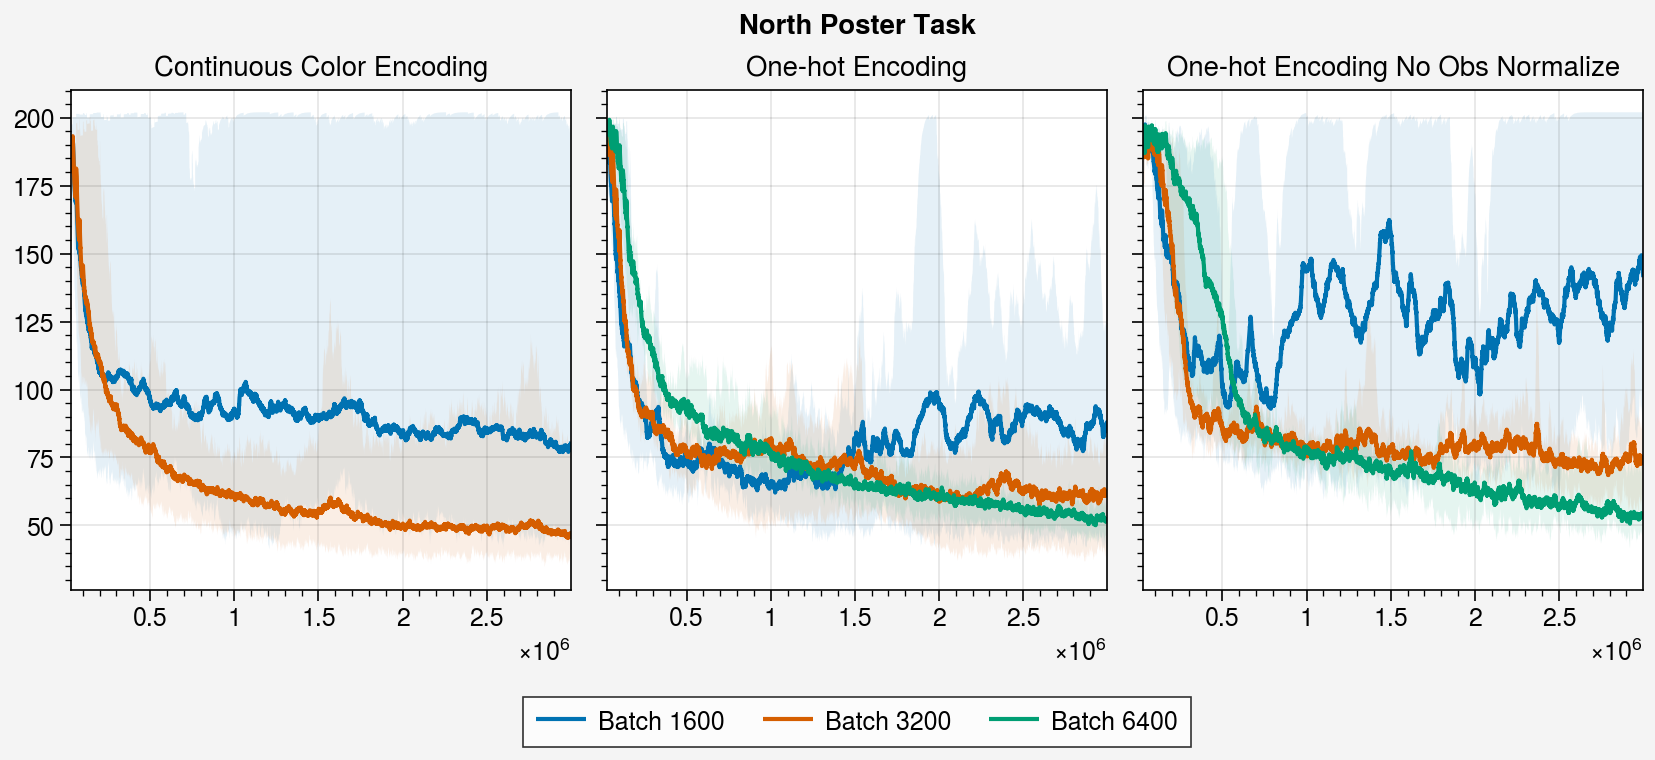

In [16]:
fig, ax = pplt.subplots(ncols=3)

batch_sizes = [16, 32, 64]
exps = ['nav_pnorth/nav_pdistal_batch{}auxnone', 'nav_pnorth/nav_pnorth_batch{}onehot',
        'nav_pnorth/nav_pnorth_batch{}onehotnovec']

for i, exp in enumerate(exps):
    lines = []
    for batch in batch_sizes:
        if i == 0 and batch == 64:
            continue
        lines.append(average_runs(exp.format(batch), 'length', ignore_first=100, ax=ax[i], label=f'Batch {batch*100}'))
        
ax.format(title=['Continuous Color Encoding', 'One-hot Encoding', 'One-hot Encoding No Obs Normalize'], suptitle='North Poster Task')
fig.legend(lines, loc='b')

# Explore tasks

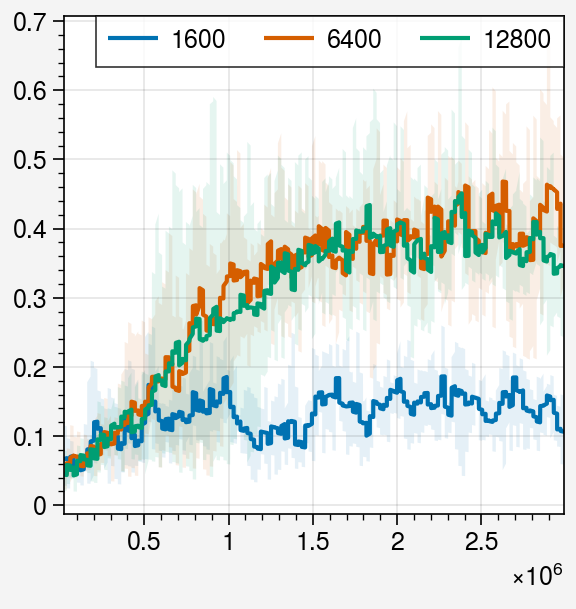

In [15]:
batch_sizes = [16, 64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}onehot', ax=ax, label=f'{batch*100}')
    
ax.legend()

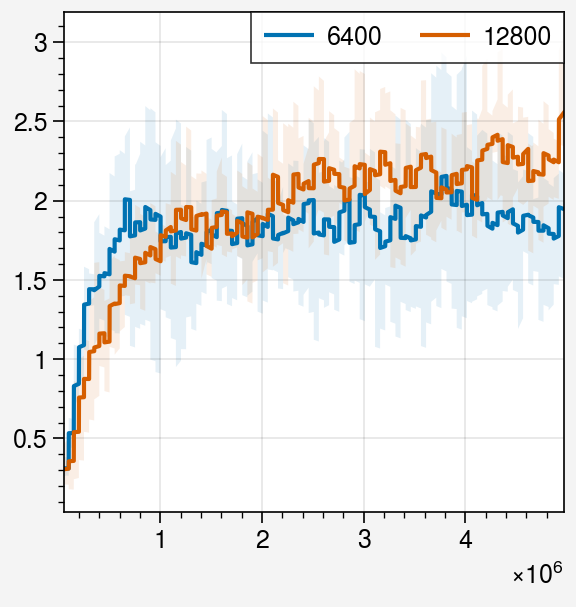

In [17]:
batch_sizes = [64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}faster', ax=ax, label=f'{batch*100}')
    
ax.legend()

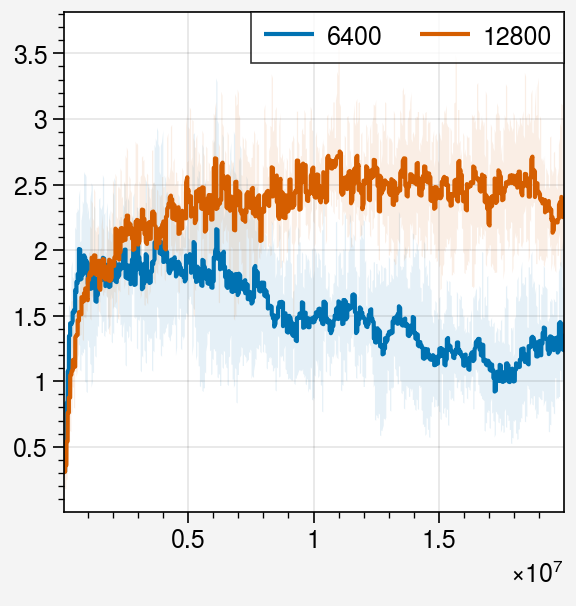

In [2]:
batch_sizes = [64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}faster20m', ax=ax, label=f'{batch*100}')
    
ax.legend()

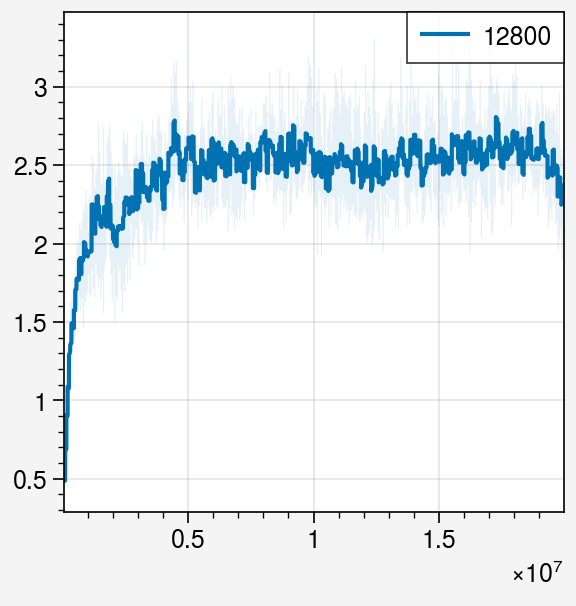

In [5]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128faster20mrewexplore', ax=ax, label=f'{batch*100}')
    
ax.legend()

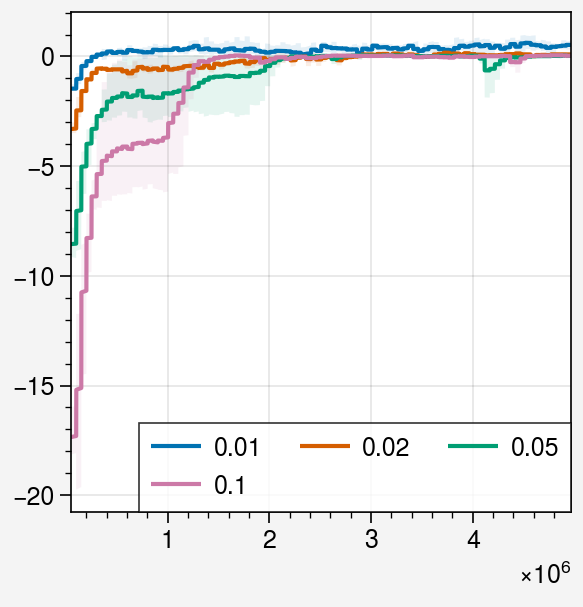

In [2]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128explorepunish', ax=ax, label='0.01')

punishment_sizes = [0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'nav_4we_aux/nav_4wallexplore_ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    

ax.legend()

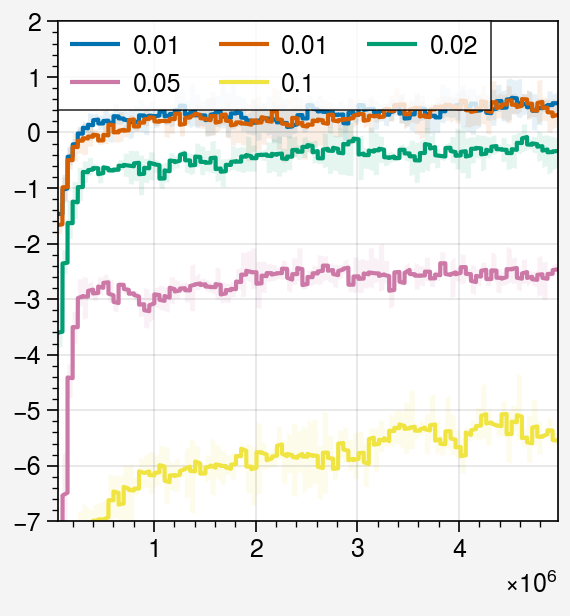

In [5]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128explorepunish', ax=ax, label='0.01')

punishment_sizes = [0.01, 0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'4we_punish/nav_4wallexplore_ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### Fixed punishment

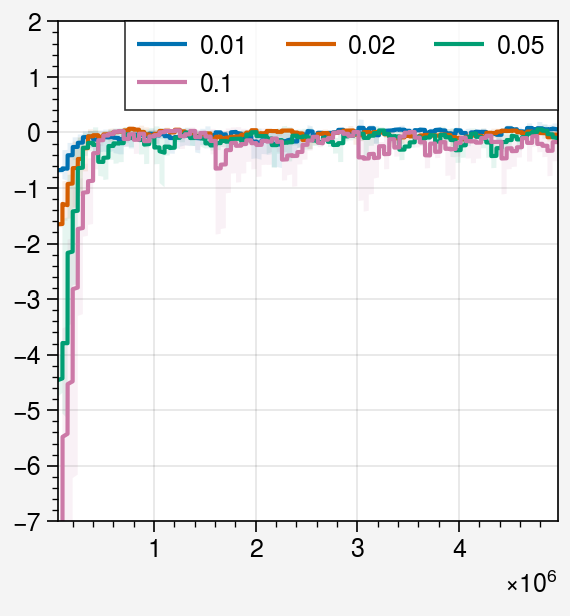

In [8]:
fig, ax = pplt.subplots()

punishment_sizes = [0.01, 0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'4we_punish/nav_4wallexplore_2ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### Fully connected before RNN and fixed punishment

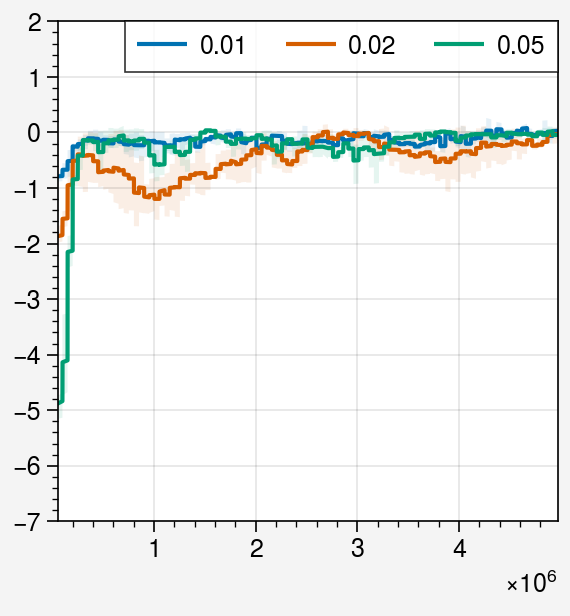

In [7]:
fig, ax = pplt.subplots()

punishment_sizes = [0.01, 0.02, 0.05]
for pun in punishment_sizes:
    exp_name = f'4wefc_punish/nav_4wefc_2ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### FC -> RNN and exponential punish + bonus

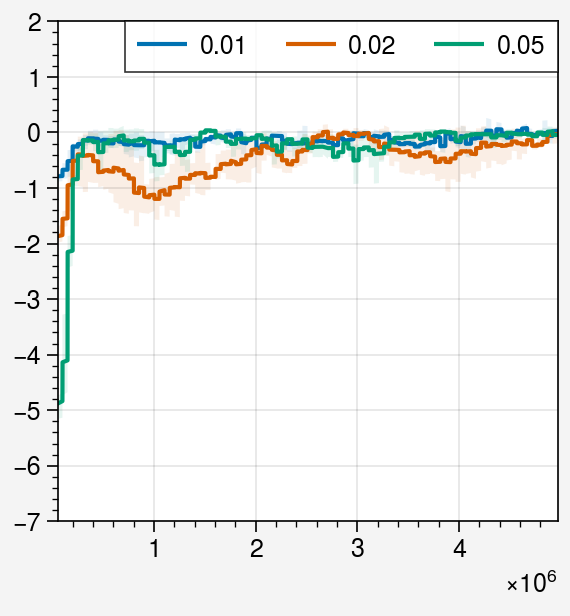

In [7]:
fig, ax = pplt.subplots()

sub_reward_sizes = [0.01, 0.02, 0.04]
punish_args = [3, 5, 7]
mults = [2, 5]


for punish_arg in punish_args:
    for mult in mults:        
        for sub_reward in sub_reward_sizes:
            exp_name = f'nav_4wefc_ep{sub_reward}mult{mult}arg{punish_arg}_t{i}'
            average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

# Explore env

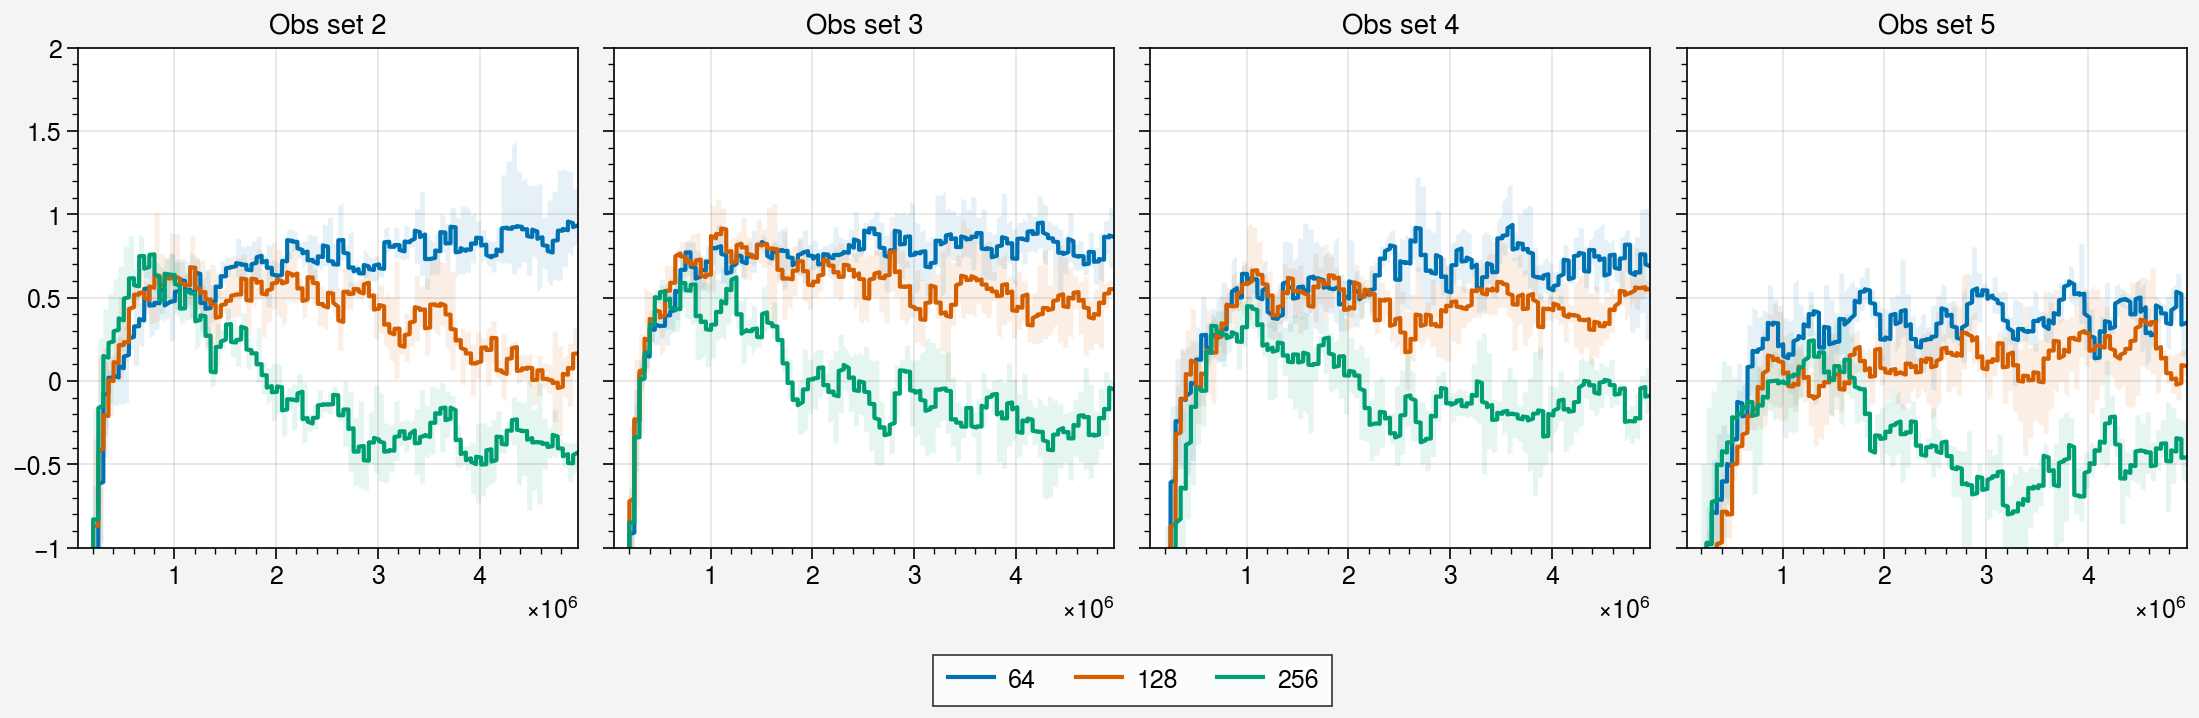

In [4]:
obs_sets = [2, 3, 4, 5]
network_sizes = [64, 128, 256]

fig, ax = pplt.subplots(ncols=4)

for i, obs in enumerate(obs_sets):
    lines = []
    for hidden in network_sizes:
        exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}'
        lines.append(average_runs(exp_name, ax=ax[i], label=str(hidden)))

ax.format(title=[f'Obs set {obs}' for obs in obs_sets], ylim=[-1, 2])
fig.legend(lines, loc='b')

In [14]:
df = load_exp_df('explorenav_pos/expl_goalpos_obs3hidden64punishlonger')

In [15]:
df['metric'].unique()

array(['charts/learning_rate', 'losses/value_loss', 'losses/policy_loss',
       'losses/auxiliary_loss', 'losses/entropy', 'losses/approx_kl',
       'losses/clipfrac', 'charts/SPS', 'charts/episodic_return',
       'charts/episodic_length', 'charts/episodic_bonus_rewards'],
      dtype=object)

## Larger batch, longer training

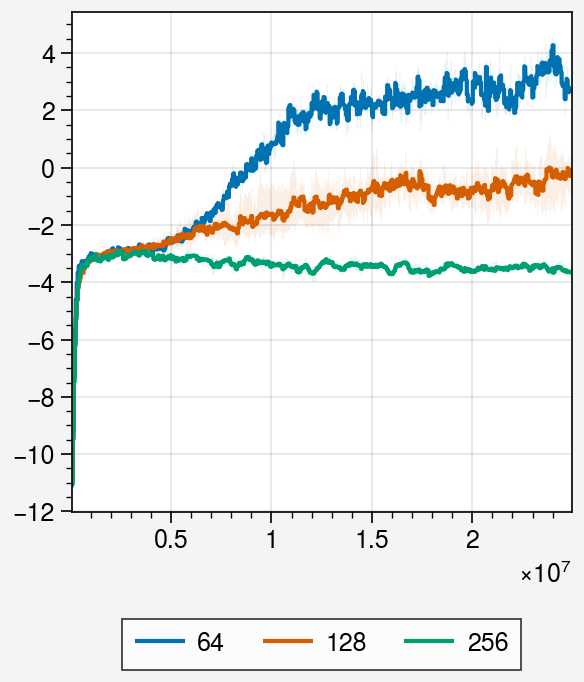

In [3]:
network_sizes = [64, 128, 256]

fig, ax = pplt.subplots()

lines = []
for hidden in network_sizes:
    exp_name = f'explorenav_pos/expl_goalpos_obs3hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(hidden)))

# ax.format(ylim=[-1, 2])
fig.legend(lines, loc='b')

### Shorter batch, longer training

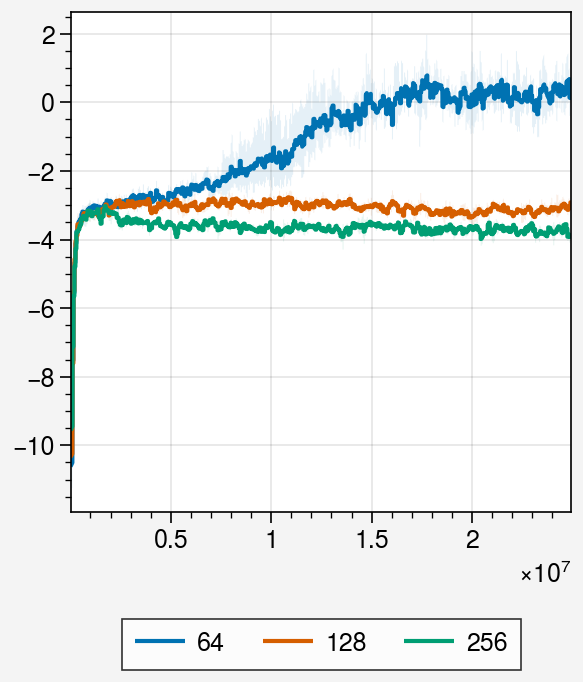

In [4]:
network_sizes = [64, 128, 256]

fig, ax = pplt.subplots()

lines = []
for hidden in network_sizes:
    exp_name = f'explorenav_pos/expl_goalpos_batch128obs3hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(hidden)))

# ax.format(ylim=[-1, 2])
fig.legend(lines, loc='b')

### Smaller network sizes

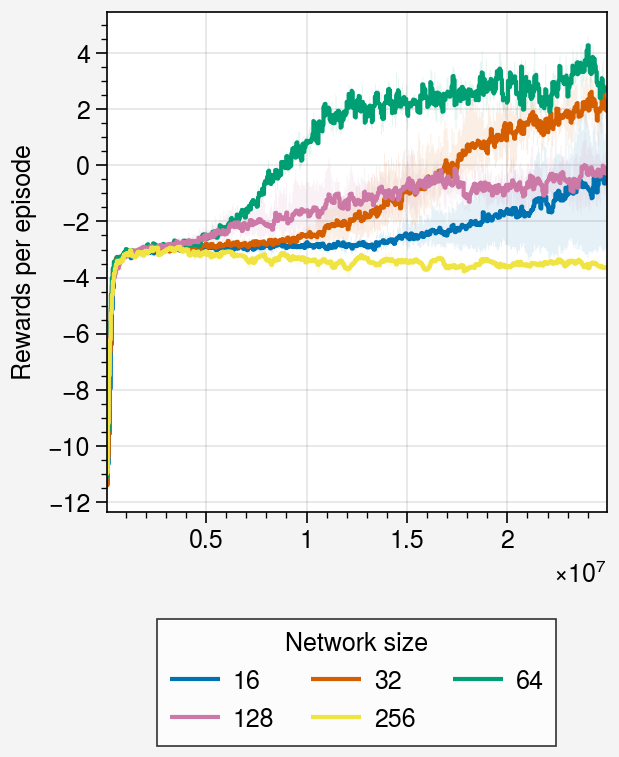

In [19]:
network_sizes = [16, 32, 64, 128, 256]

fig, ax = pplt.subplots()

lines = []
for hidden in network_sizes:
    exp_name = f'explorenav_pos/expl_goalpos_obs3hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(hidden)))

# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', label='Network size')

### Network 64, batch 256, longer training, obs sets 1/2/3

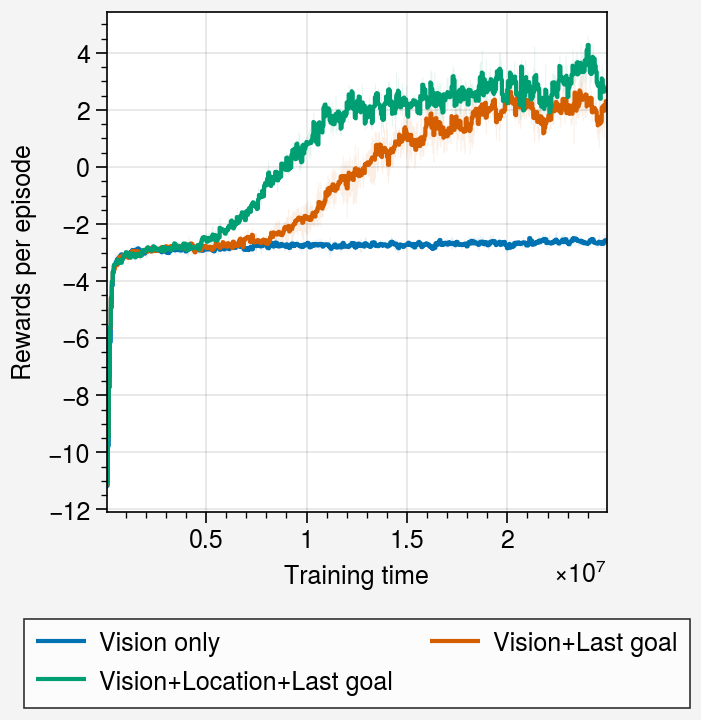

In [51]:
obs_sets = [1, 2, 3]
obs_labels = ['Vision only',  'Vision+Last goal', 'Vision+Location+Last goal']
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, obs in enumerate(obs_sets):
    exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(obs_labels[i])))

# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode', xlabel='Training time')
fig.legend(lines, loc='b', ncols=2)

### Self locomotion data

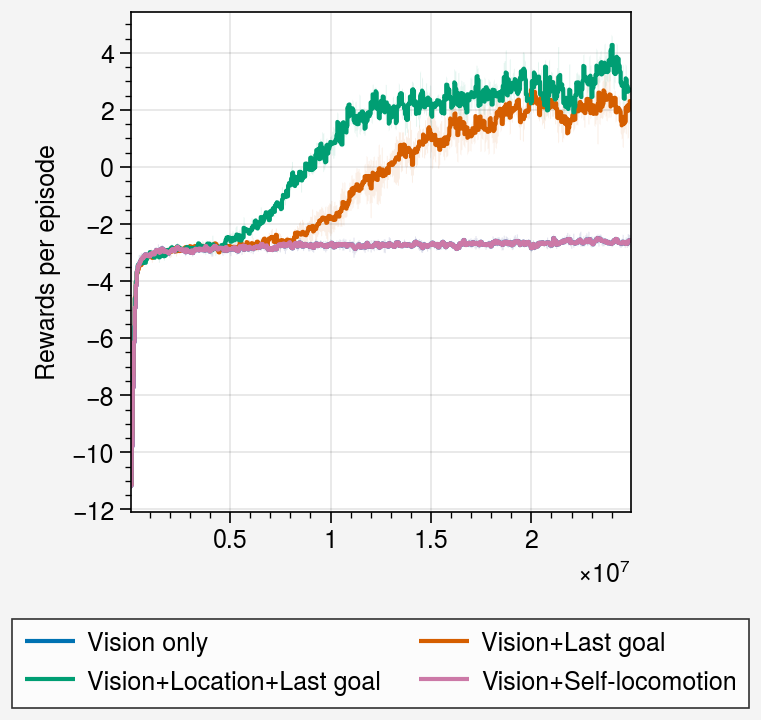

In [52]:
obs_sets = [1, 2, 3]
obs_labels = ['Vision only',  'Vision+Last goal', 'Vision+Location+Last goal']
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, obs in enumerate(obs_sets):
    exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(obs_labels[i])))
    
exp_name = f'explorenav_pos/expl_goalpos_lastacthidden{hidden}longer'
lines.append(average_runs(exp_name, ax=ax, label='Vision+Self-locomotion'))

# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2)

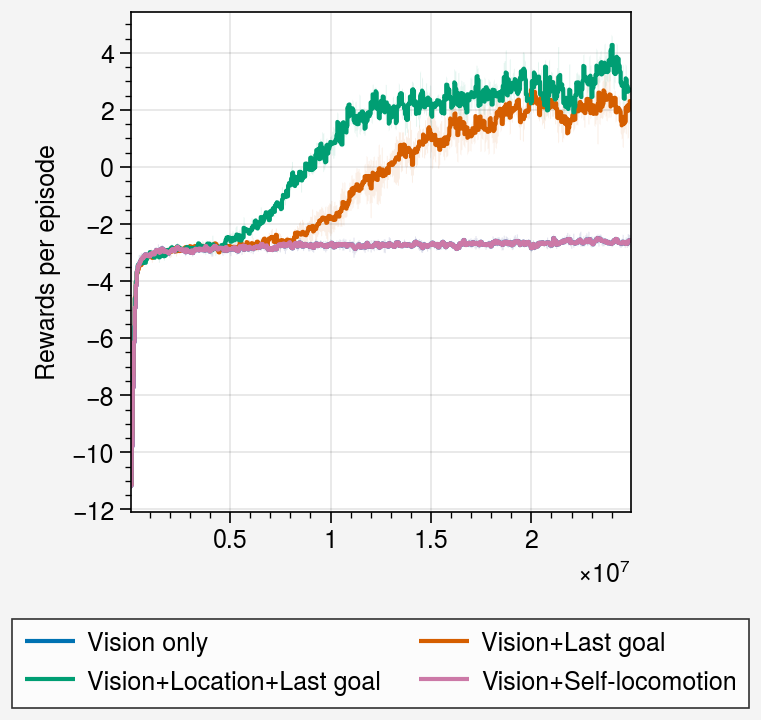

In [52]:
obs_sets = [1, 2, 3]
obs_labels = ['Vision only',  'Vision+Last goal', 'Vision+Location+Last goal']
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, obs in enumerate(obs_sets):
    exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(obs_labels[i])))
    
exp_name = f'explorenav_pos/expl_goalpos_lastacthidden{hidden}longer'
lines.append(average_runs(exp_name, ax=ax, label='Vision+Self-locomotion'))

# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2)

### Reward shaping with obs set 3

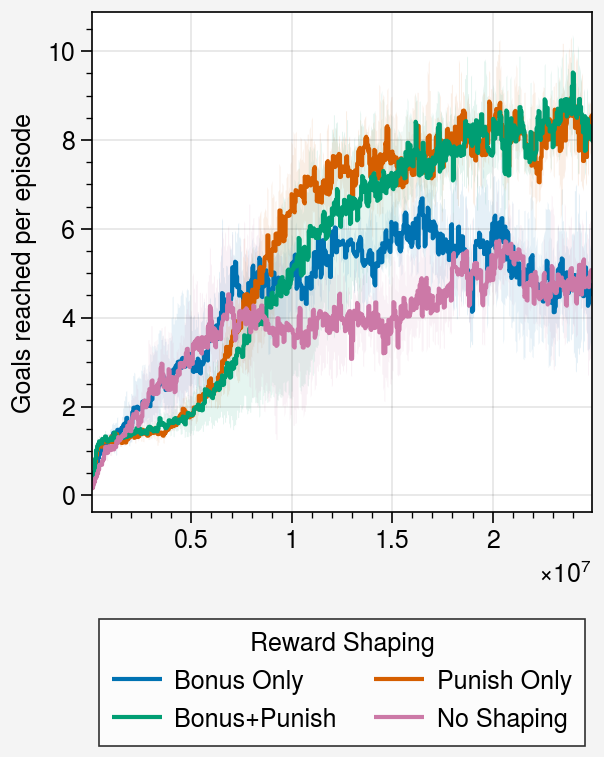

In [59]:
shaping_names = ['bonus', 'punish', 'bonuspunish', 'noshaping']
shaping_labels = ['Bonus Only', 'Punish Only', 'Bonus+Punish', 'No Shaping']

hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, shape in enumerate(shaping_names):
    exp_name = f'explorenav_pos/expl_goalpos_obs3hidden64{shape}longer'
    lines.append(average_runs(exp_name, metric='pure_goal', ax=ax, label=str(shaping_labels[i])))
    
ax.format(ylabel='Goals reached per episode')
fig.legend(lines, loc='b', ncols=2, label='Reward Shaping')

### Alternative obs sets 2b 2c

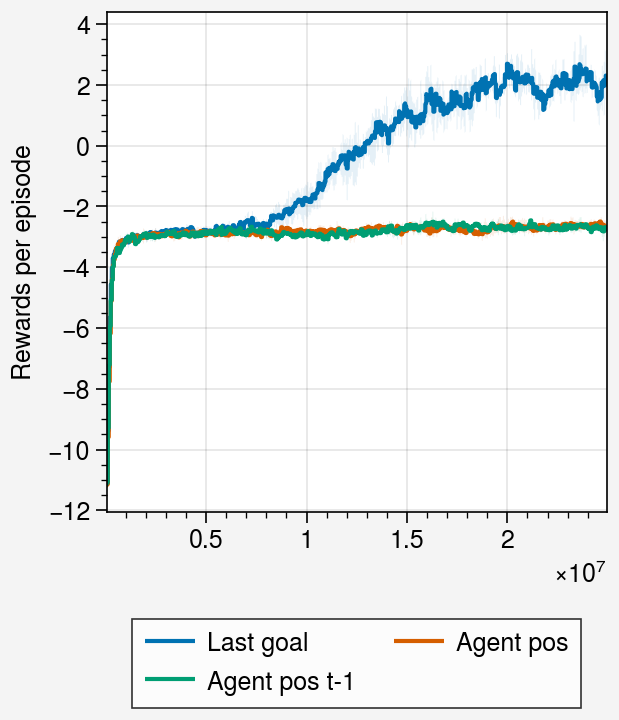

In [2]:
obs_sets = [2, '2b', '2c']
obs_labels = ['Last goal', 'Agent pos', 'Agent pos t-1']
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, obs in enumerate(obs_sets):
    exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(obs_labels[i])))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2)

### Give last goal pos for number of steps

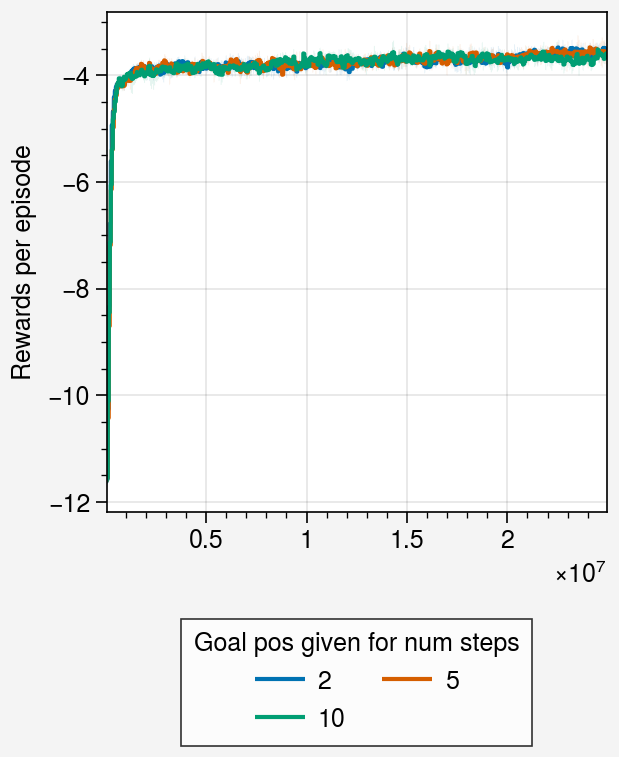

In [5]:
num_steps = [2, 5, 10]
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, num in enumerate(num_steps):
    exp_name = f'explorenav_pos/expl_givegoal_num{num}'
    lines.append(average_runs(exp_name, ax=ax, label=str(num)))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

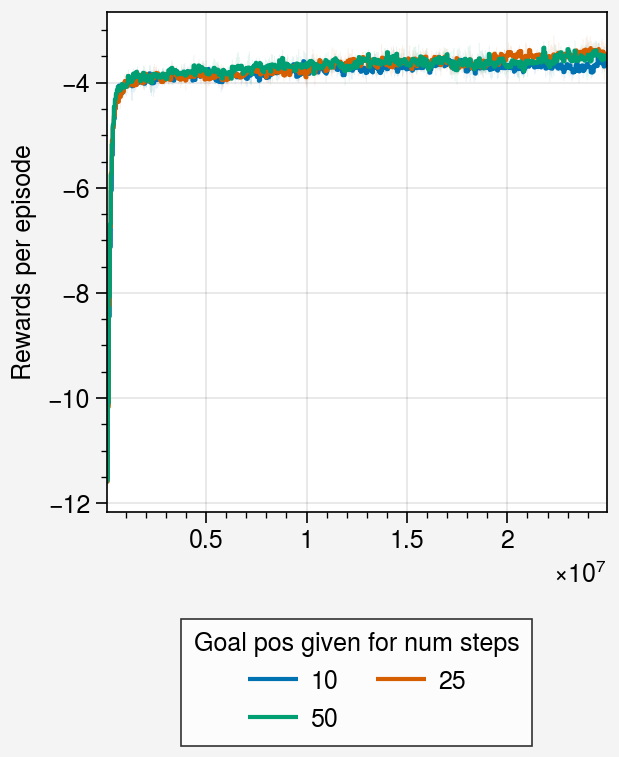

In [32]:
num_steps = [10, 25, 50]
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, num in enumerate(num_steps):
    exp_name = f'explorenav_pos/expl_givegoal_num{num}'
    lines.append(average_runs(exp_name, ax=ax, label=str(num)))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

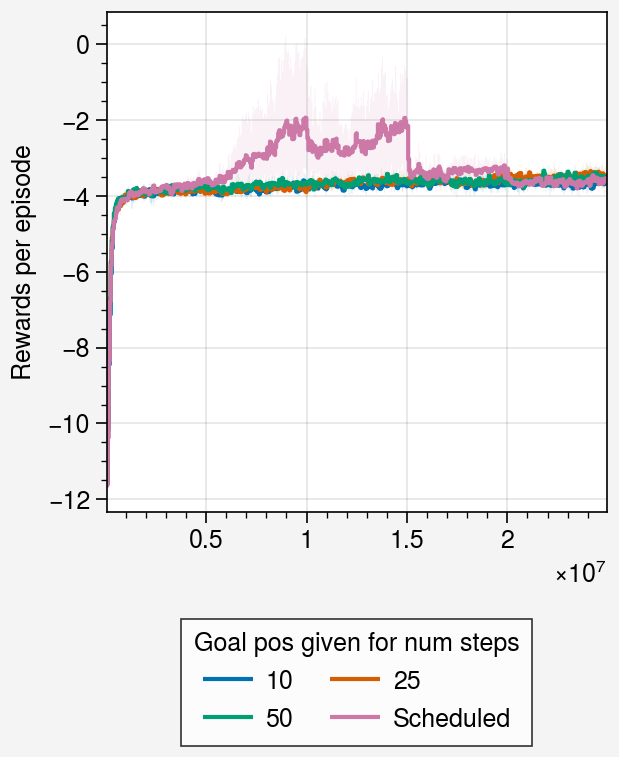

In [33]:
num_steps = [10, 25, 50]
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, num in enumerate(num_steps):
    exp_name = f'explorenav_pos/expl_givegoal_num{num}'
    lines.append(average_runs(exp_name, ax=ax, label=str(num)))
    
exp_name = f'explorenav_pos/expl_givegoal_sched1'
lines.append(average_runs(exp_name, ax=ax, label='Scheduled'))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

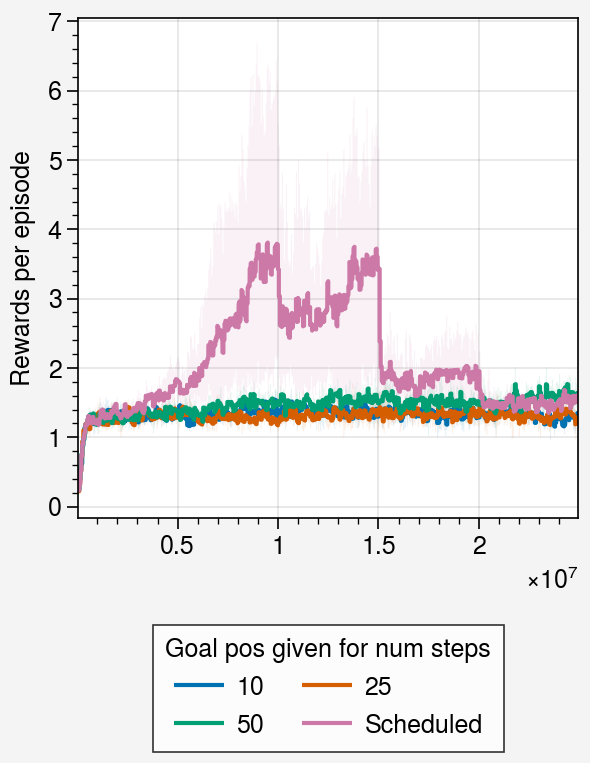

In [34]:
num_steps = [10, 25, 50]
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, num in enumerate(num_steps):
    exp_name = f'explorenav_pos/expl_givegoal_num{num}'
    lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label=str(num)))
    
exp_name = f'explorenav_pos/expl_givegoal_sched1'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

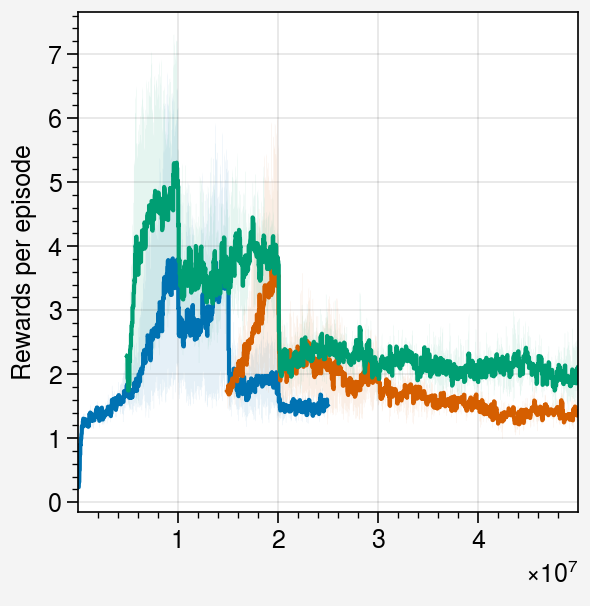

In [4]:
hidden = 64

fig, ax = pplt.subplots()

lines = []
    
exp_name = f'explorenav_pos/expl_givegoal_sched1'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
exp_name = f'explorenav_pos/expl_givegoal_sched2cont'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
exp_name = f'explorenav_pos/expl_givegoal_sched2bcont'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
# fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

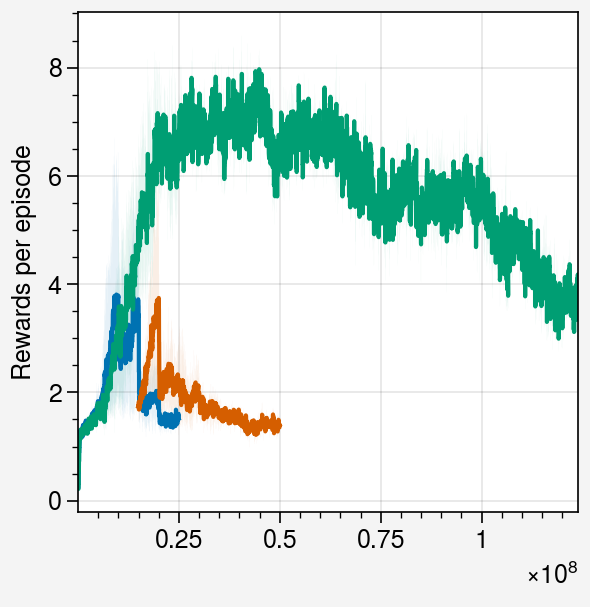

In [5]:
hidden = 64

fig, ax = pplt.subplots()

lines = []
    
exp_name = f'explorenav_pos/expl_givegoal_sched1'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
exp_name = f'explorenav_pos/expl_givegoal_sched2cont'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
exp_name = f'explorenav_pos/expl_givegoal_sched3'
lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled'))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
# fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

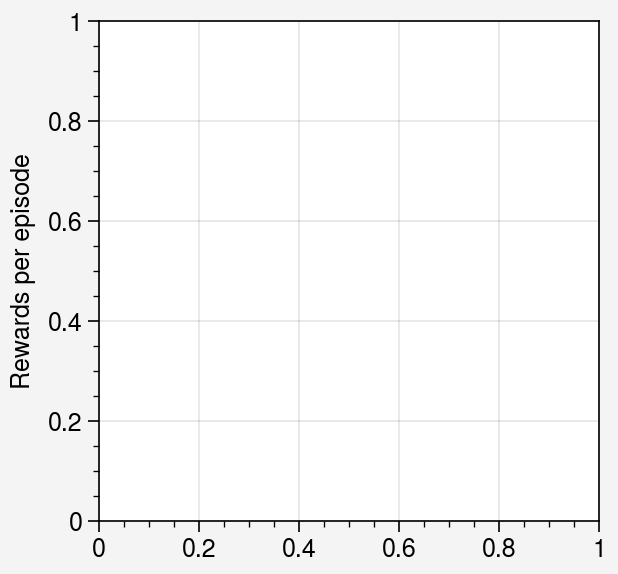

In [3]:
hidden = 64

fig, ax = pplt.subplots()

lines = []
    
exp_name = f'explorenav_pos/expl_givegoal_sched3'
xs, ys, min_x, max_x = average_runs(exp_name, 'pure_goal', ax=ax, label='Scheduled', ret=True)

# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
# fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

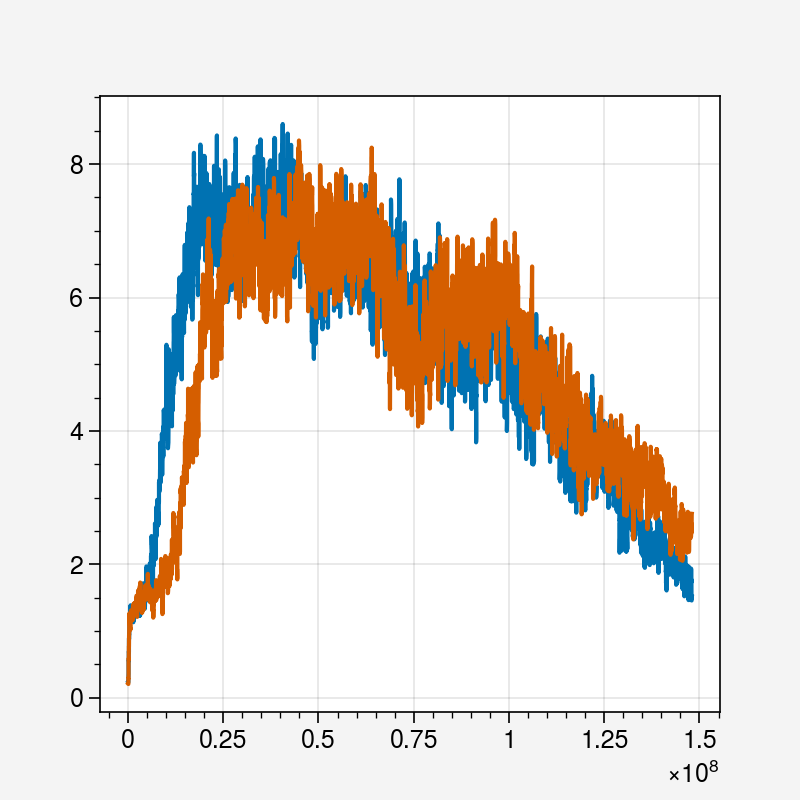

In [6]:
plt.plot(xs, ys[0])
plt.plot(xs, ys[1])

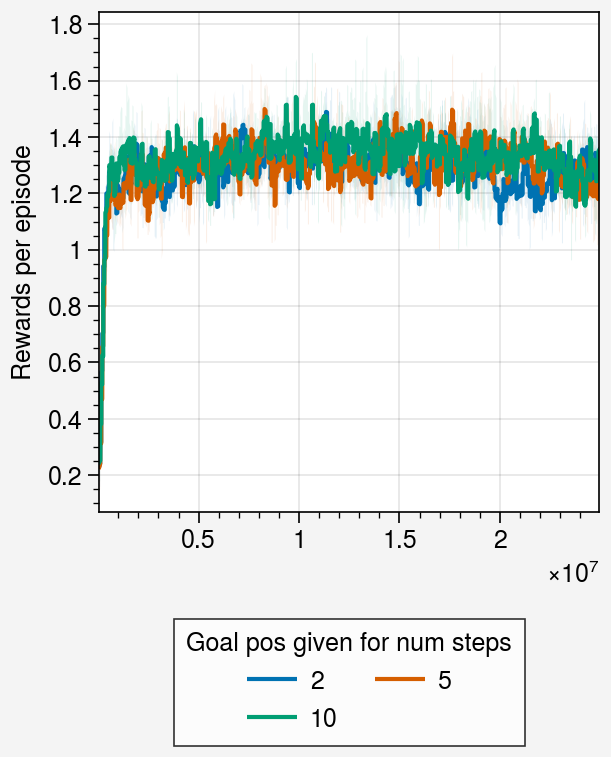

In [6]:
num_steps = [2, 5, 10]
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, num in enumerate(num_steps):
    exp_name = f'explorenav_pos/expl_givegoal_num{num}'
    lines.append(average_runs(exp_name, 'pure_goal', ax=ax, label=str(num)))
    
# ax.format(ylim=[-1, 2])
ax.format(ylabel='Rewards per episode')
fig.legend(lines, loc='b', ncols=2, label='Goal pos given for num steps')

# Shortcut environment

* Once agents successfully reach the platform, they almost immediately have a fixed policy to get to the goal with 100% success rate
    * Might need to increase the randomness of starting position to prevent how much memorization occurs

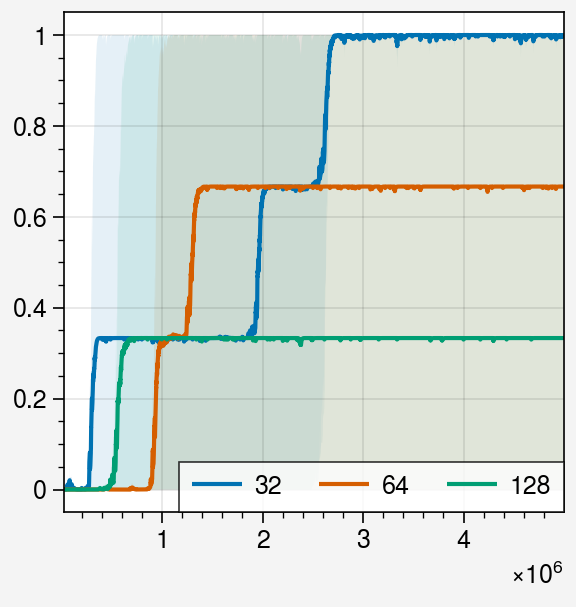

In [3]:
fig, ax = pplt.subplots()

batch_sizes = [32, 64, 128]
for batch in batch_sizes:
    exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
    average_runs(exp_name, ax=ax, label=str(batch))

ax.legend()

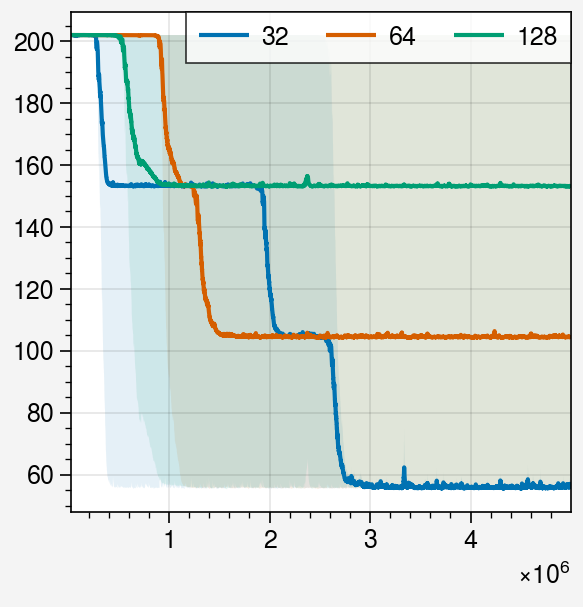

In [4]:
fig, ax = pplt.subplots()

batch_sizes = [32, 64, 128]
for batch in batch_sizes:
    exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
    average_runs(exp_name, 'length', ax=ax, label=str(batch))

ax.legend()

In [5]:
batch = 32
exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, label=str(batch), ret=True)

<a list of 1 Line2D objects>

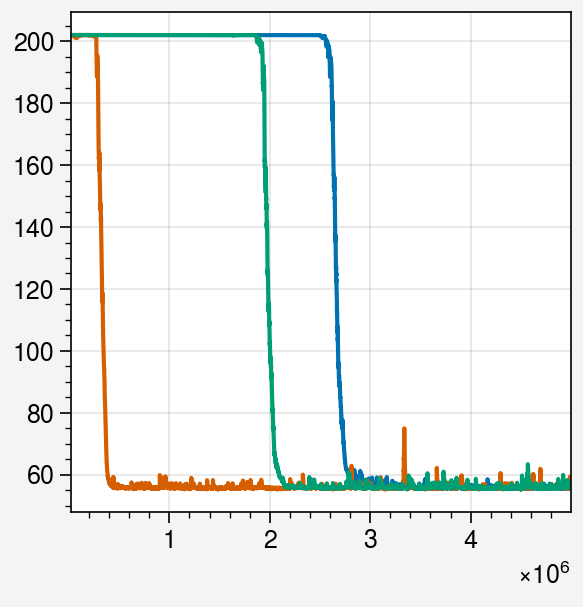

In [11]:
fig, ax = pplt.subplots()
ax.plot(xs, ys[0])
ax.plot(xs, ys[1])
ax.plot(xs, ys[2])

In [10]:
print_runs('../runs/shortcut_resets')

shortcut_resets
├── EXP shortcutnav_fcp0.1reset1batch32: 3
├── EXP shortcutnav_fcp0.1reset1batch64: 3
├── EXP shortcutnav_fcp0.1reset2batch32: 3
├── EXP shortcutnav_fcp0.1reset2batch64: 3
├── EXP shortcutnav_fcp0.1reset3batch32: 3
├── EXP shortcutnav_fcp0.1reset3batch64: 3
├── EXP shortcutnav_fcp0.2reset1batch32: 3
├── EXP shortcutnav_fcp0.2reset1batch64: 3
├── EXP shortcutnav_fcp0.2reset2batch32: 3
├── EXP shortcutnav_fcp0.2reset2batch64: 3
├── EXP shortcutnav_fcp0.2reset3batch32: 3
├── EXP shortcutnav_fcp0.2reset3batch64: 3
├── EXP shortcutnav_fcp0.4reset1batch32: 3
├── EXP shortcutnav_fcp0.4reset1batch64: 3
├── EXP shortcutnav_fcp0.4reset2batch32: 3
├── EXP shortcutnav_fcp0.4reset2batch64: 3
├── EXP shortcutnav_fcp0.4reset3batch32longer: 3
├── EXP shortcutnav_fcp0.4reset3batch32: 3
├── EXP shortcutnav_fcp0.4reset3batch64longer: 3
├── EXP shortcutnav_fcp0.4reset3batch64: 3
├── EXP shortcutnav_p0.1reset1batch32: 3
├── EXP shortcutnav_p0.1reset1batch64: 3
├── EXP shortcutnav_p0.1reset2

In [11]:
batch = 64
exp_name = f'shortcut_resets/shortcutnav_fcp0.4reset3batch64'
xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, label=str(batch), ret=True)

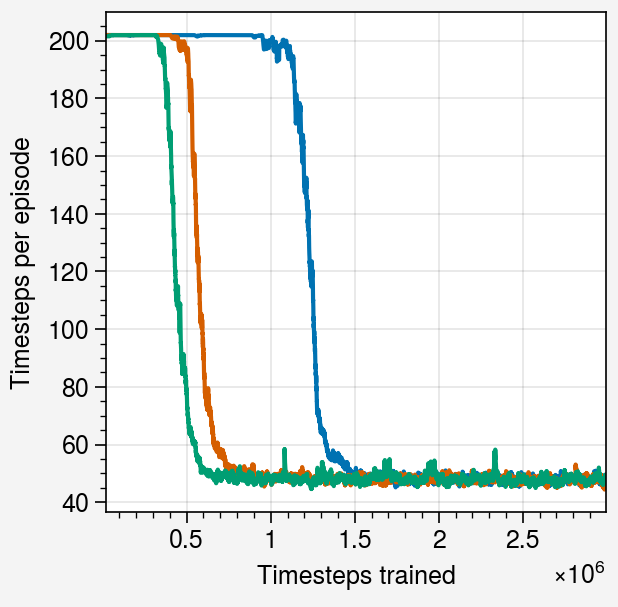

In [13]:
fig, ax = pplt.subplots()
ax.plot(xs, ys[0])
ax.plot(xs, ys[1])
ax.plot(xs, ys[2])

ax.format(xlabel='Timesteps trained', ylabel='Timesteps per episode')

## Shortcut probabilities

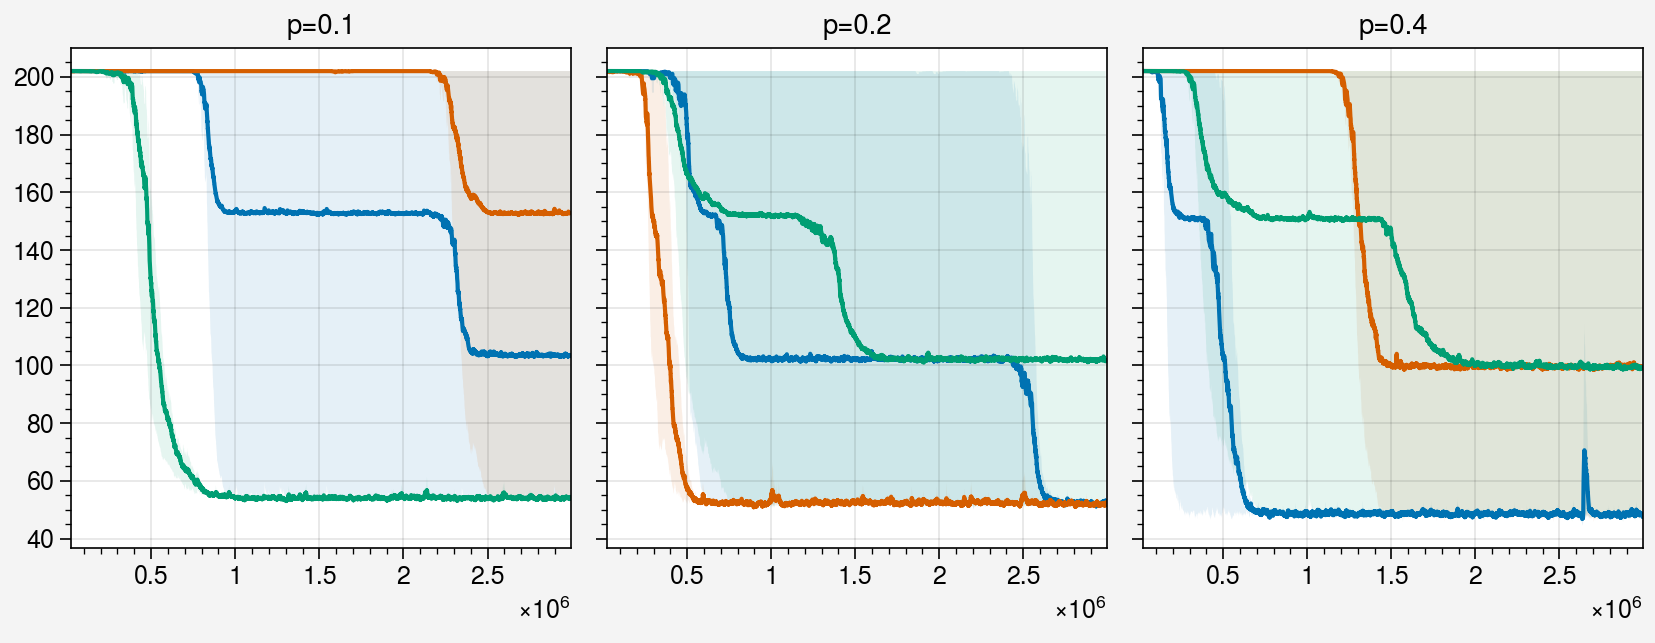

In [2]:
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64, 128]
fig, ax = pplt.subplots(ncols=3)
for i, prob in enumerate(probs):
    lines = []
    for batch in batch_sizes:
        exp_name = f'shortcuts/shortcutnav_shortcutprob{prob}batch{batch}'
        lines.append(average_runs(exp_name, 'length', ax=ax[i], label=f'{batch}'))

ax.format(title=[f'p={prob}' for prob in probs])

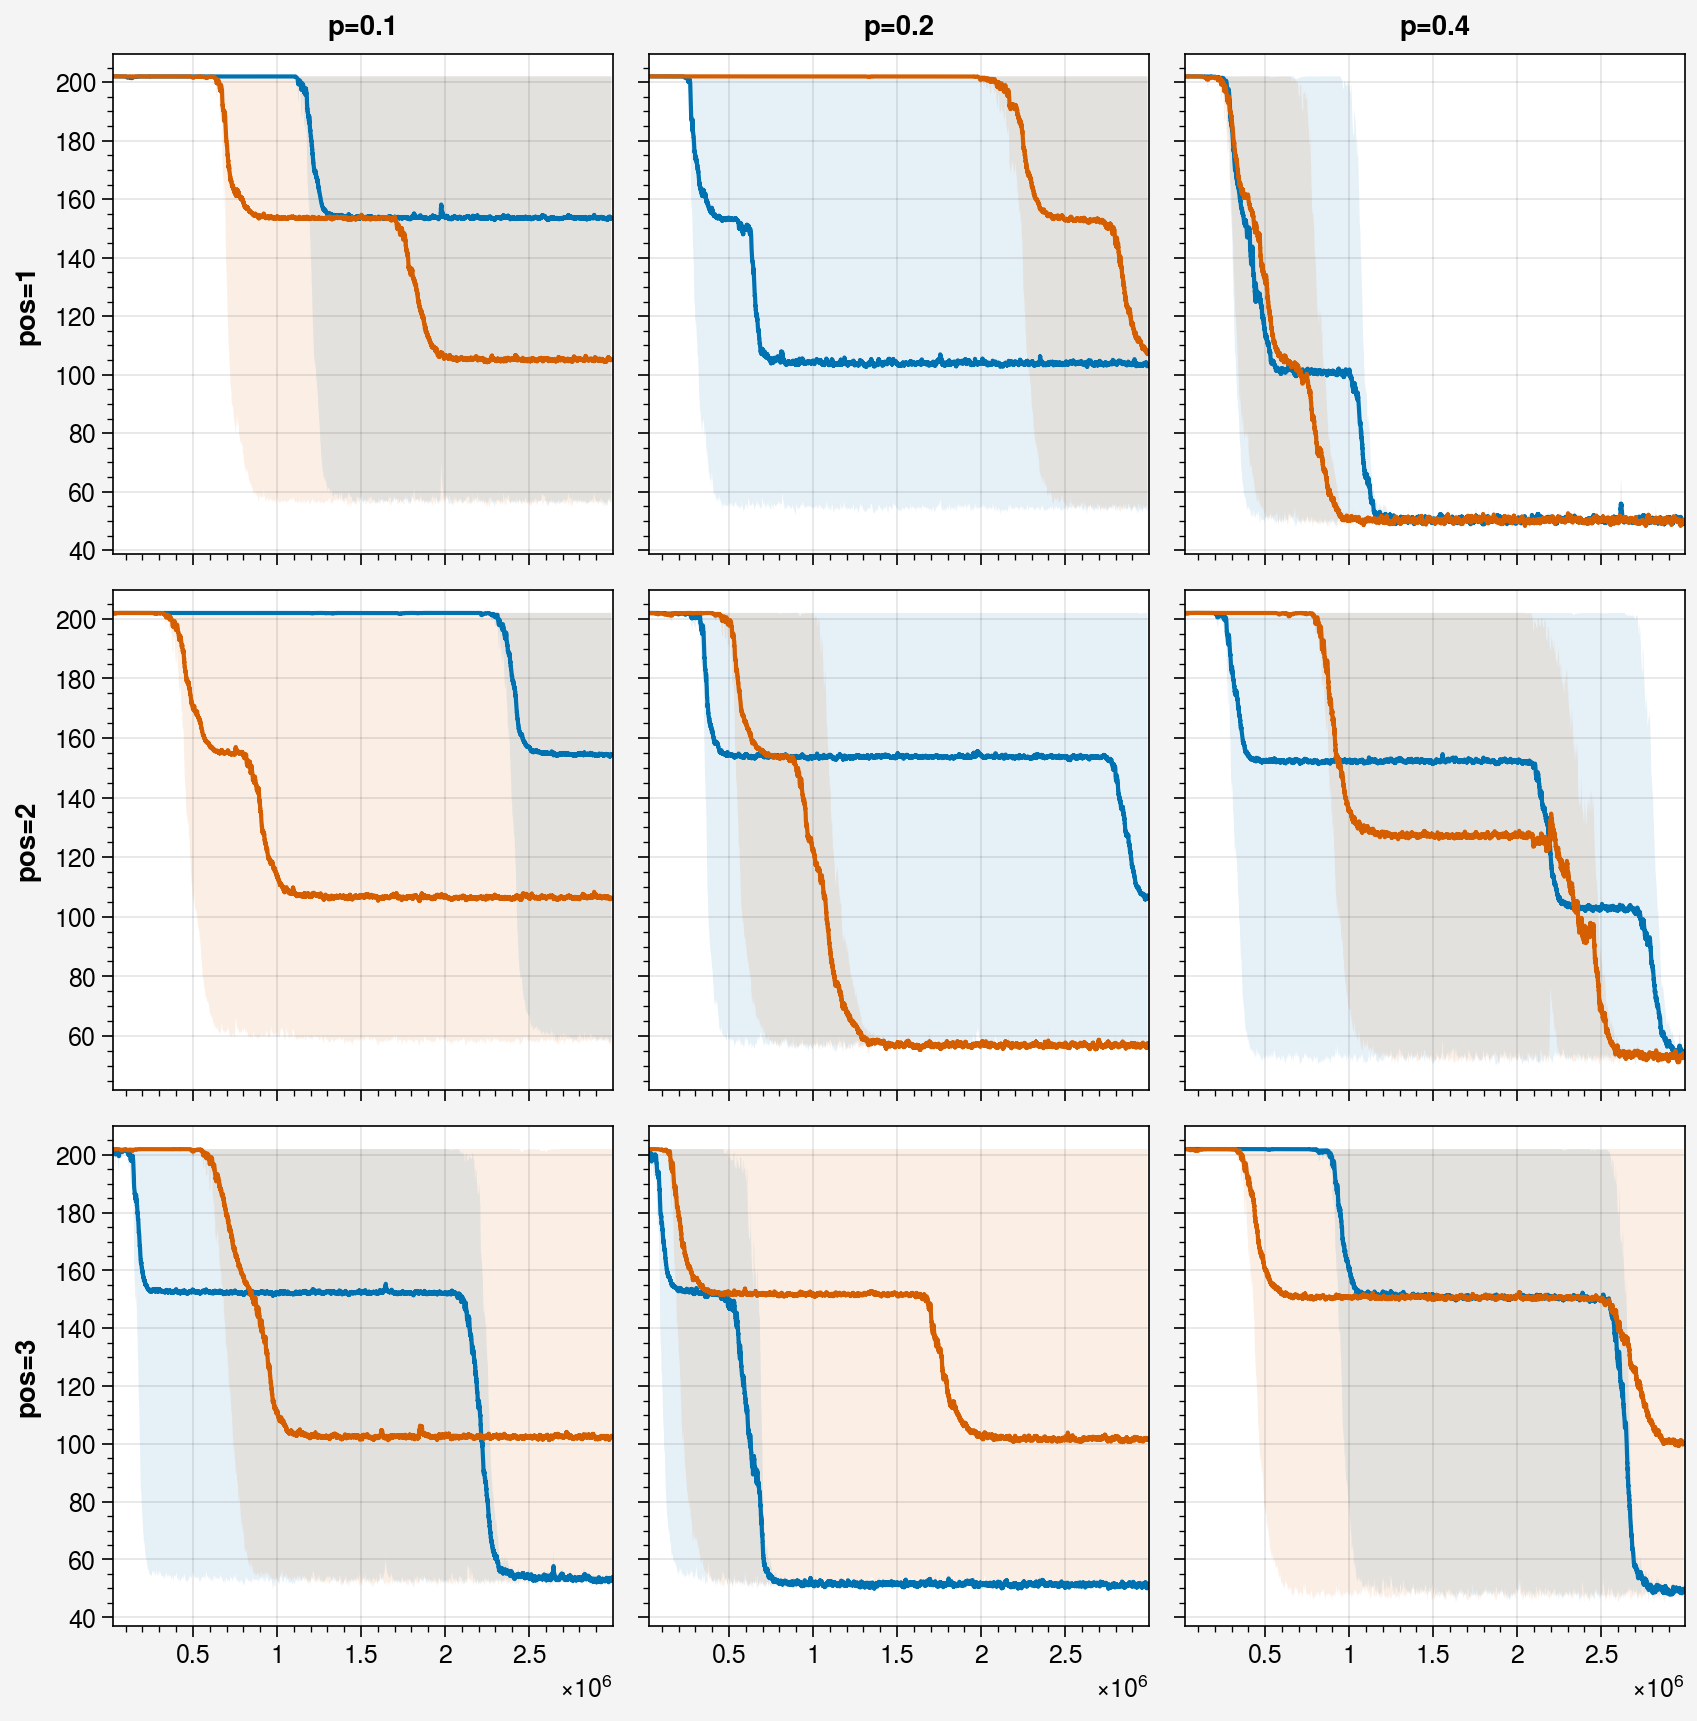

In [4]:
probs = [0.1, 0.2, 0.4]
character_reset_poss = [1, 2, 3]
batch_sizes = [32, 64]

fig, ax = pplt.subplots(ncols=len(probs), nrows=3)
for i, pos in enumerate(character_reset_poss):
    for j, prob in enumerate(probs):
        lines = []
        for batch in batch_sizes:
            # exp_name = f'shortcuts/shortcutnav_shortcutprob{prob}batch{batch}'
            exp_name = f'shortcut_resets/shortcutnav_p{prob}reset{pos}batch{batch}'
            lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label=f'{batch}'))

ax.format(toplabels=[f'p={prob}' for prob in probs],
         leftlabels=[f'pos={pos}' for pos in character_reset_poss])

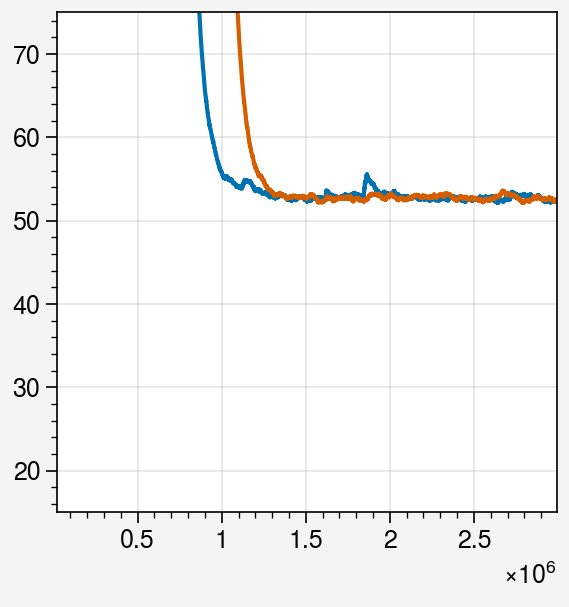

In [11]:
batch = 64
prob = 0.1
pos = 3
exp_name = f'shortcut_resets/shortcutnav_p{prob}reset{pos}batch{batch}'
xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, label=str(batch), ret=True,
                                   ewm=0.001)

fig, ax = pplt.subplots()
ax.plot(xs, ys[0])
ax.plot(xs, ys[1])
ax.plot(xs, ys[2])
ax.format(ylim=[15, 75])

## Wall colors

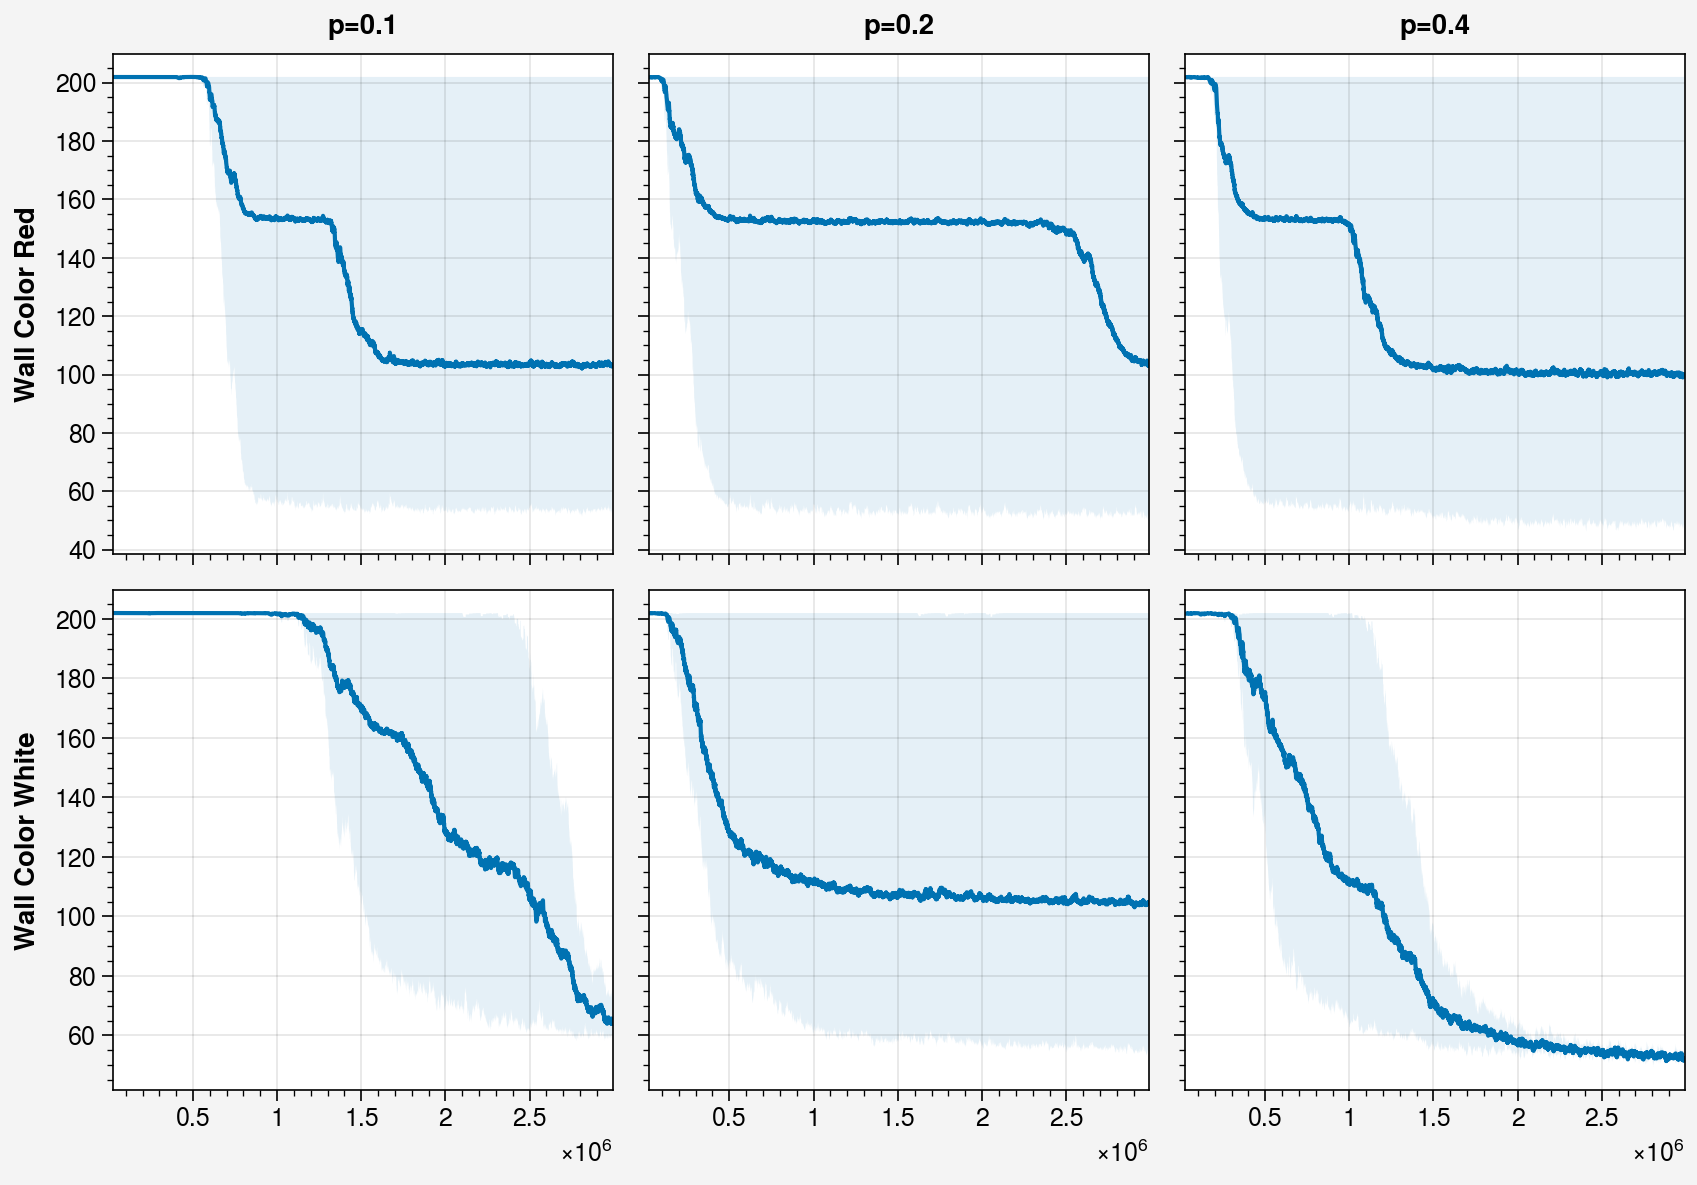

In [15]:
shortcut_probs = [0.1, 0.2, 0.4]
wall_colors = [1, 1.5]
wall_color_labels = ['Red', 'White']
fig, ax = pplt.subplots(nrows=2, ncols=3)

for i, wc in enumerate(wall_colors):
    for j, p in enumerate(shortcut_probs):
        exp_name = f'shortcut_wc/shortcut_wc{wc}p{p}'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label=f'{batch}'))

ax.format(leftlabels=[f'Wall Color {wc}' for wc in wall_color_labels],
          toplabels=[f'p={p}' for p in shortcut_probs])

### No normalized envs

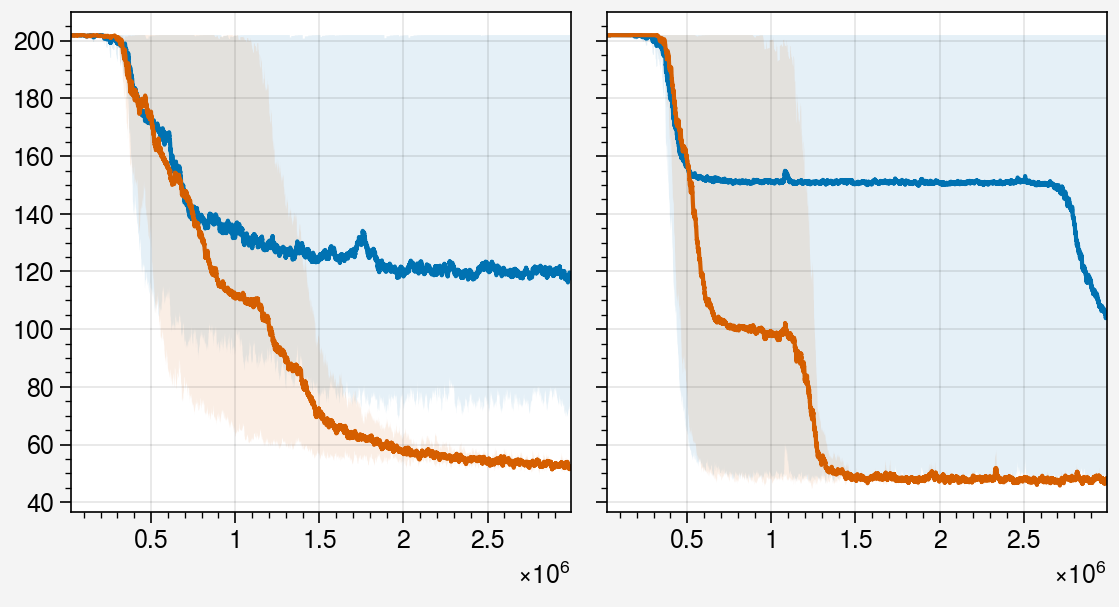

In [6]:
wall_colors = [1.5, 4]
fig, ax = pplt.subplots(ncols=2)
for i, wc in enumerate(wall_colors):
    exp_name = f'shortcut_wc/shortcut_nonorm_wc{wc}p0.4'
    average_runs(exp_name, 'length', ax=ax[i])
    
    if wc == 4:
        exp_name = f'shortcut_resets/shortcutnav_fcp0.4reset3batch64'
    else:
        exp_name = f'shortcut_wc/shortcut_wc{wc}p0.4'
    average_runs(exp_name, 'length', ax=ax[i])


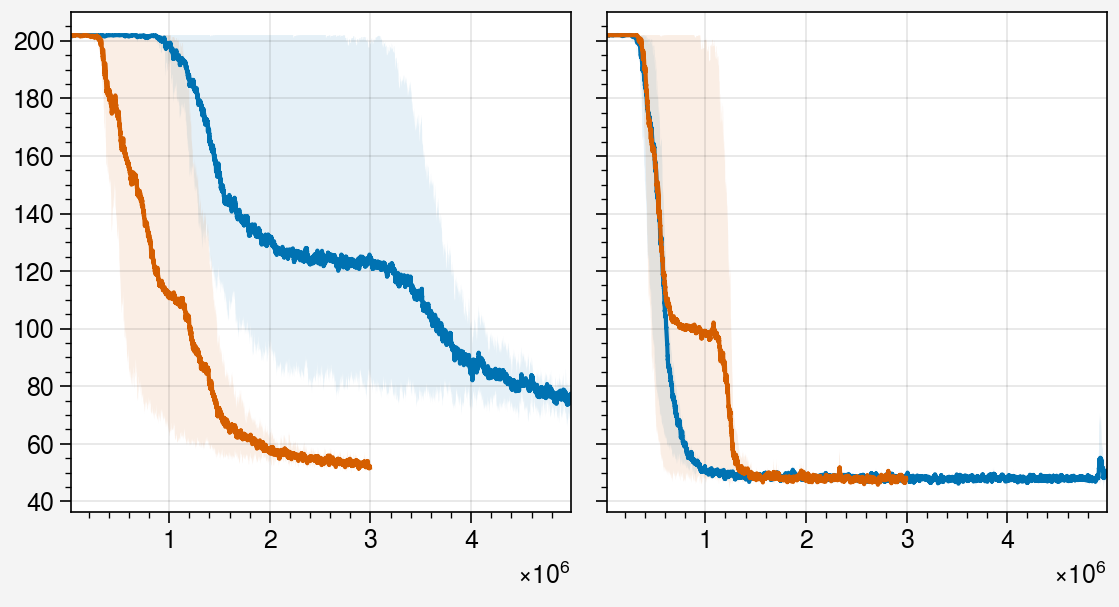

In [2]:
wall_colors = [1.5, 4]
fig, ax = pplt.subplots(ncols=2)
for i, wc in enumerate(wall_colors):
    exp_name = f'shortcut_wc/shortcut_nonorm_wc{wc}p0.4batch256'
    average_runs(exp_name, 'length', ax=ax[i])
    
    if wc == 4:
        exp_name = f'shortcut_resets/shortcutnav_fcp0.4reset3batch64'
    else:
        exp_name = f'shortcut_wc/shortcut_wc{wc}p0.4'
    average_runs(exp_name, 'length', ax=ax[i])


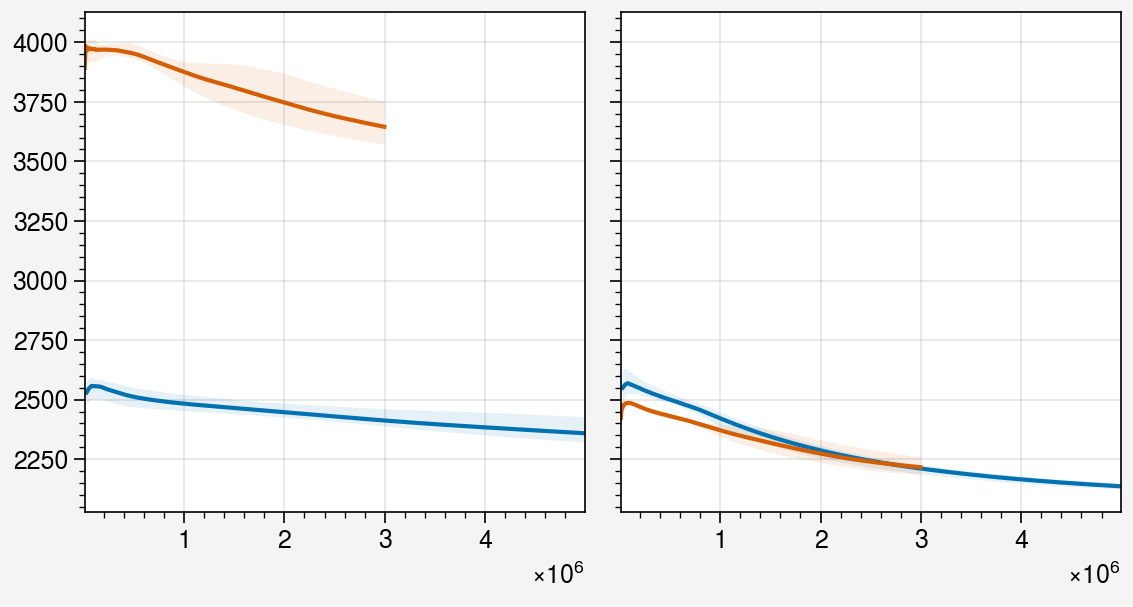

In [7]:
wall_colors = [1.5, 4]
fig, ax = pplt.subplots(ncols=2)
for i, wc in enumerate(wall_colors):
    exp_name = f'shortcut_wc/shortcut_nonorm_wc{wc}p0.4batch256'
    average_runs(exp_name, 'charts/SPS', ax=ax[i])
    
    if wc == 4:
        exp_name = f'shortcut_resets/shortcutnav_fcp0.4reset3batch64'
    else:
        exp_name = f'shortcut_wc/shortcut_wc{wc}p0.4'
    average_runs(exp_name, 'charts/SPS', ax=ax[i])


### Cloning experiments

**Allowing envs obs_rms to change**

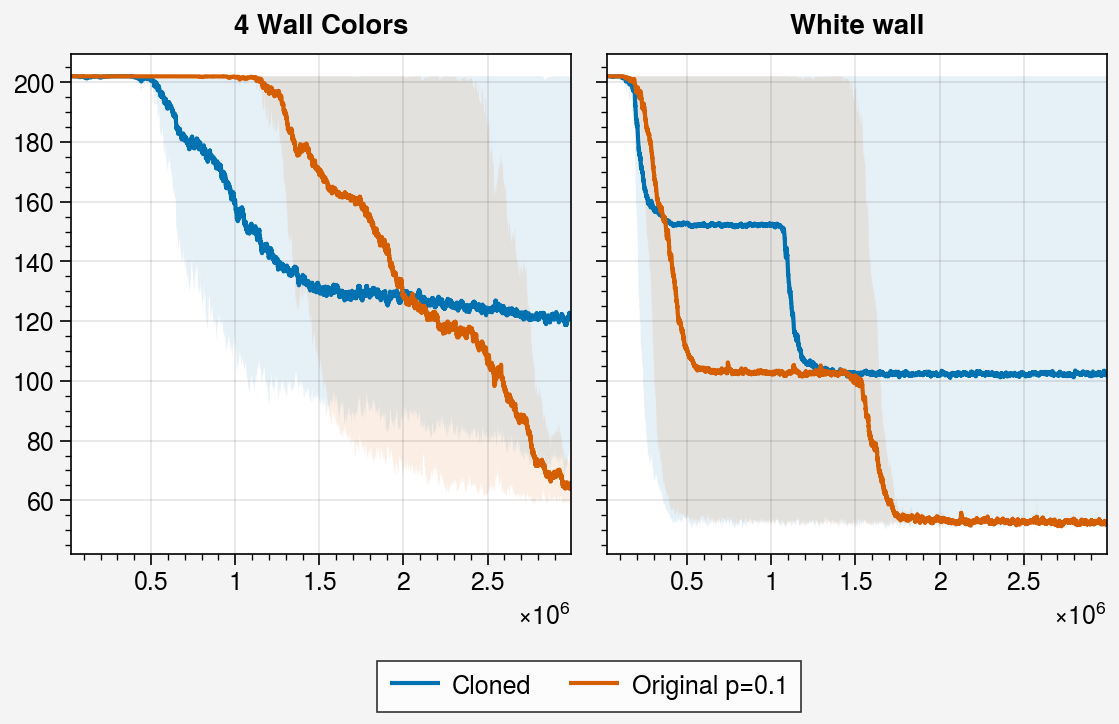

In [6]:
clone_labels = ['clone_and_freeze'] #'clone'
wall_colors = [1.5, 4]

fig, ax = pplt.subplots(nrows=1, ncols=2)
for i, clone in enumerate(clone_labels):
    for j, wc in enumerate(wall_colors):
        lines = []
        exp_name = f'shortcut_clonewc/shortcut_wc{wc}p0.1{clone}_flexobs'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Cloned'))
        if wc == 4:
            exp_name = f'shortcut_resets/shortcutnav_fcp0.1reset3batch64'
        else:
            exp_name = f'shortcut_wc/shortcut_wc{wc}p0.1'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Original p=0.1'))
fig.legend(lines, loc='b')
ax.format(toplabels=['4 Wall Colors', 'White wall'])

**Fixing obs_rms**

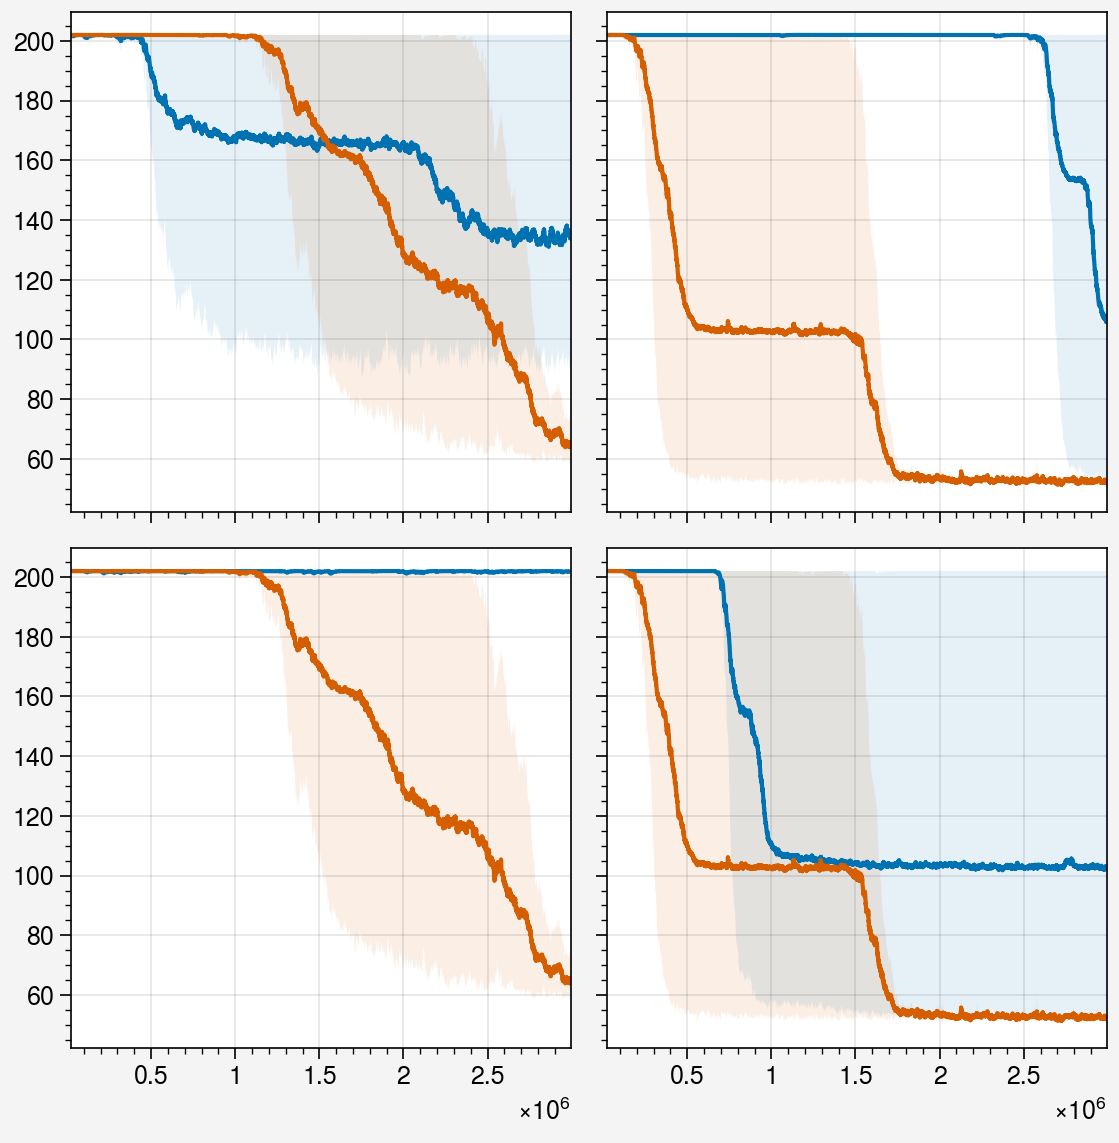

In [5]:
clone_labels = ['clone_and_freeze', 'clone']
wall_colors = [1.5, 4]

fig, ax = pplt.subplots(nrows=2, ncols=2)
for i, clone in enumerate(clone_labels):
    for j, wc in enumerate(wall_colors):
        exp_name = f'shortcut_clonewc/shortcut_wc{wc}p0.1{clone}'
        average_runs(exp_name, 'length', ax=ax[i, j])
        if wc == 4:
            exp_name = f'shortcut_resets/shortcutnav_fcp0.1reset3batch64'
        else:
            exp_name = f'shortcut_wc/shortcut_wc{wc}p0.1'
        average_runs(exp_name, 'length', ax=ax[i, j])


### No env normalization cloning

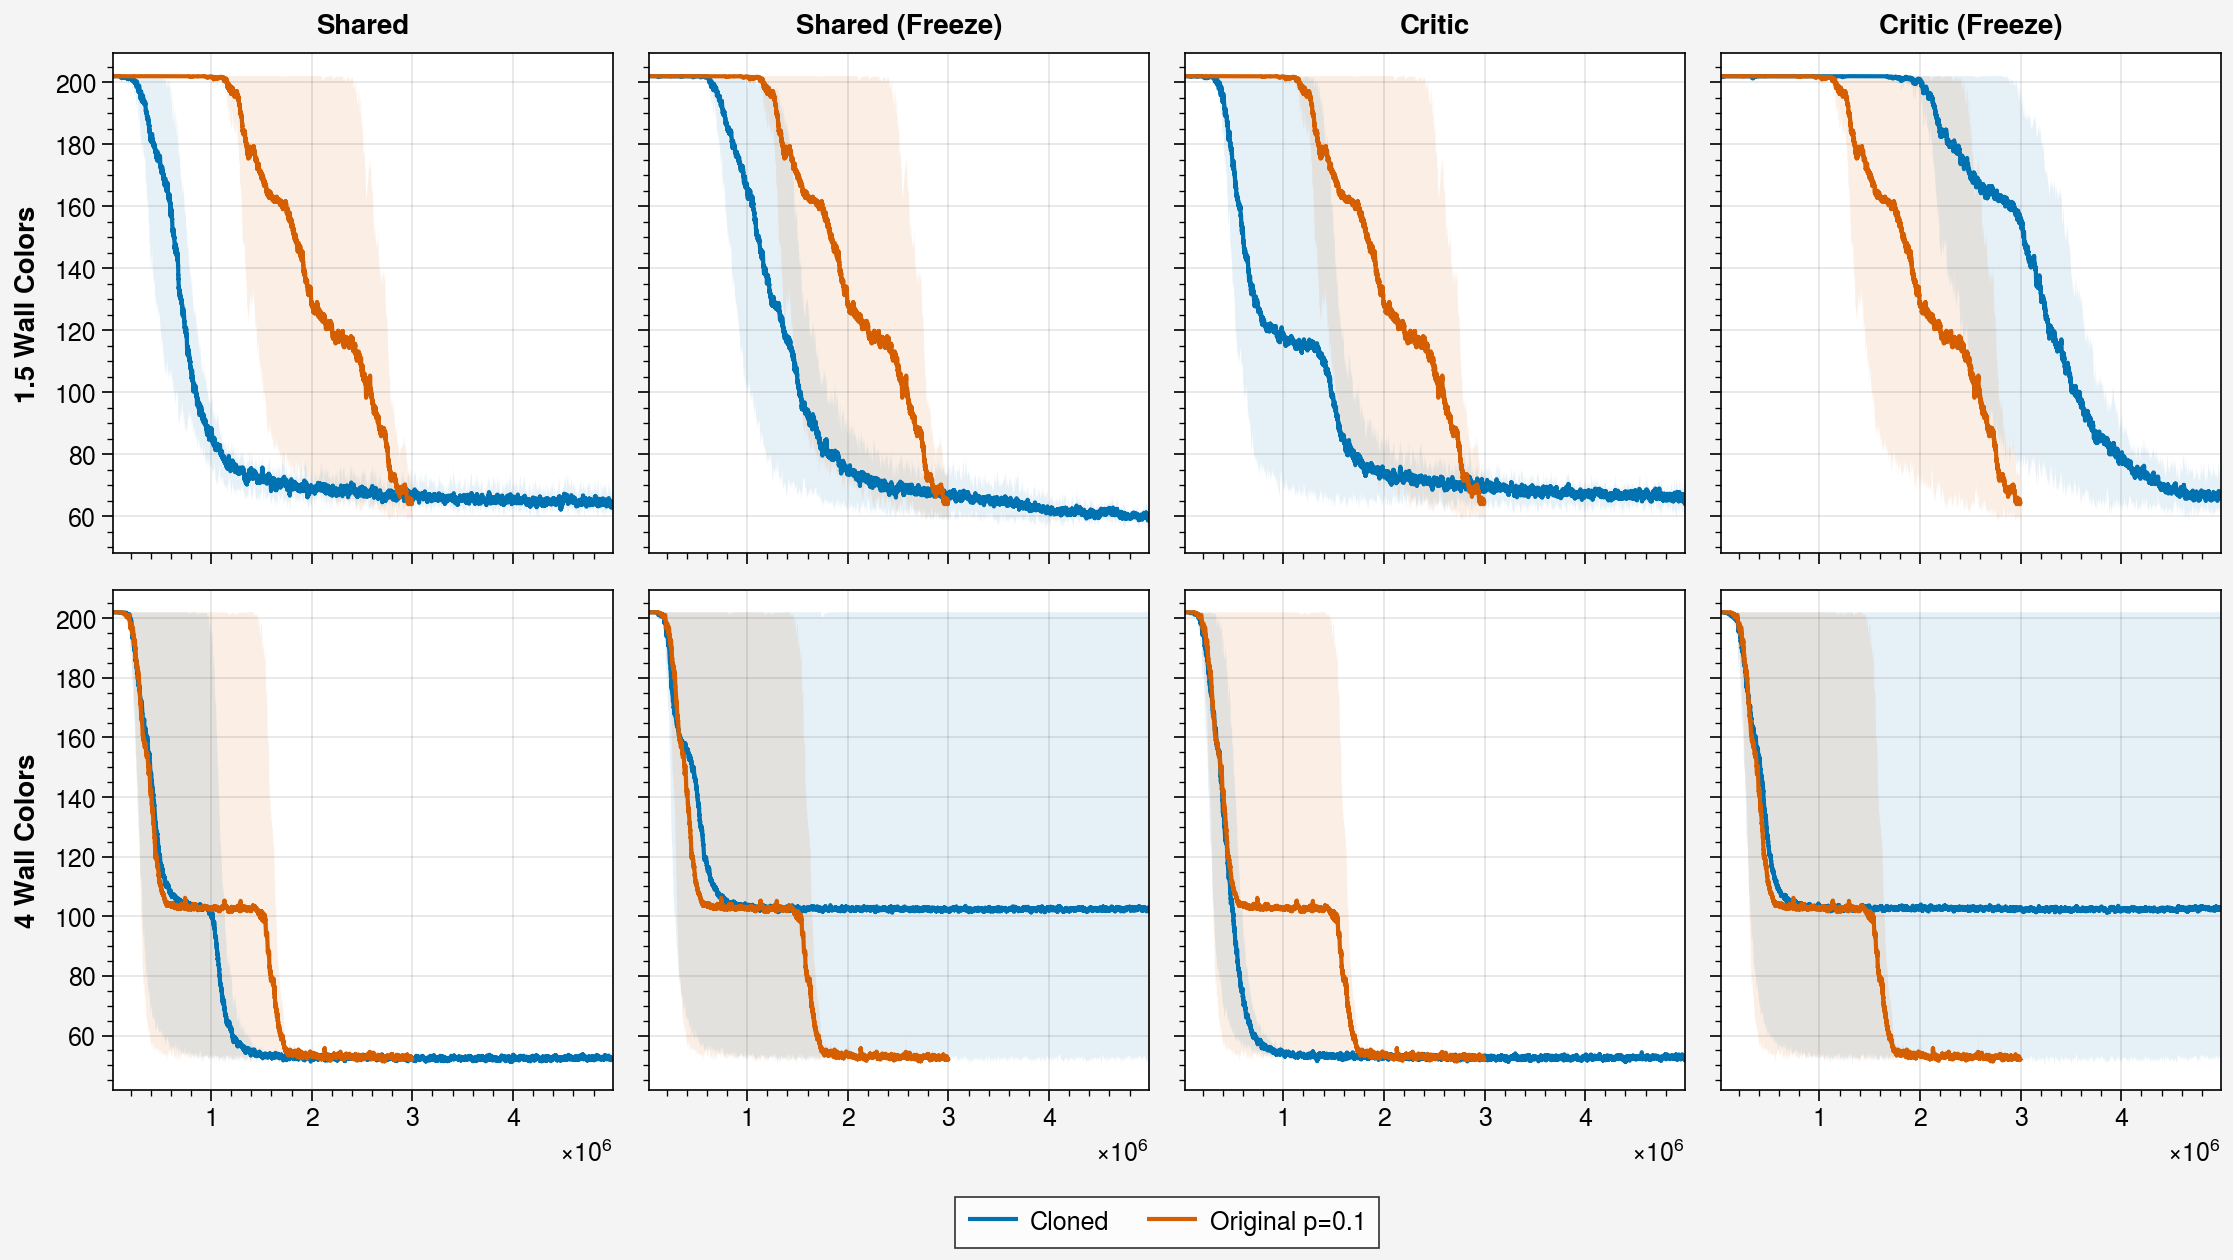

In [16]:
num_trials = 3
p = 0.1
wall_colors = [1.5, 4]
rows = []
batch = 256

clone_sets = ['closhared', 'clofrshared',  'clocritic', 'clofrcritic']
clone_labels = ['Shared', 'Shared (Freeze)', 'Critic', 'Critic (Freeze)']
fig, ax = pplt.subplots(nrows=2, ncols=4)

for i, wc in enumerate(wall_colors):
    for j, clone in enumerate(clone_sets):
        lines = []

        exp_name = f'shortcut_clonewc/shortcut_nonorm{clone}_wc{wc}p0.1batch256'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Cloned'))
        
        if wc == 4:
            exp_name = f'shortcut_resets/shortcutnav_fcp0.1reset3batch64'
        else:
            exp_name = f'shortcut_wc/shortcut_wc{wc}p0.1'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Original p=0.1'))

        
ax.format(leftlabels=[f'{wc} Wall Colors' for wc in wall_colors],
          toplabels=clone_labels)
fig.legend(lines, loc='b')

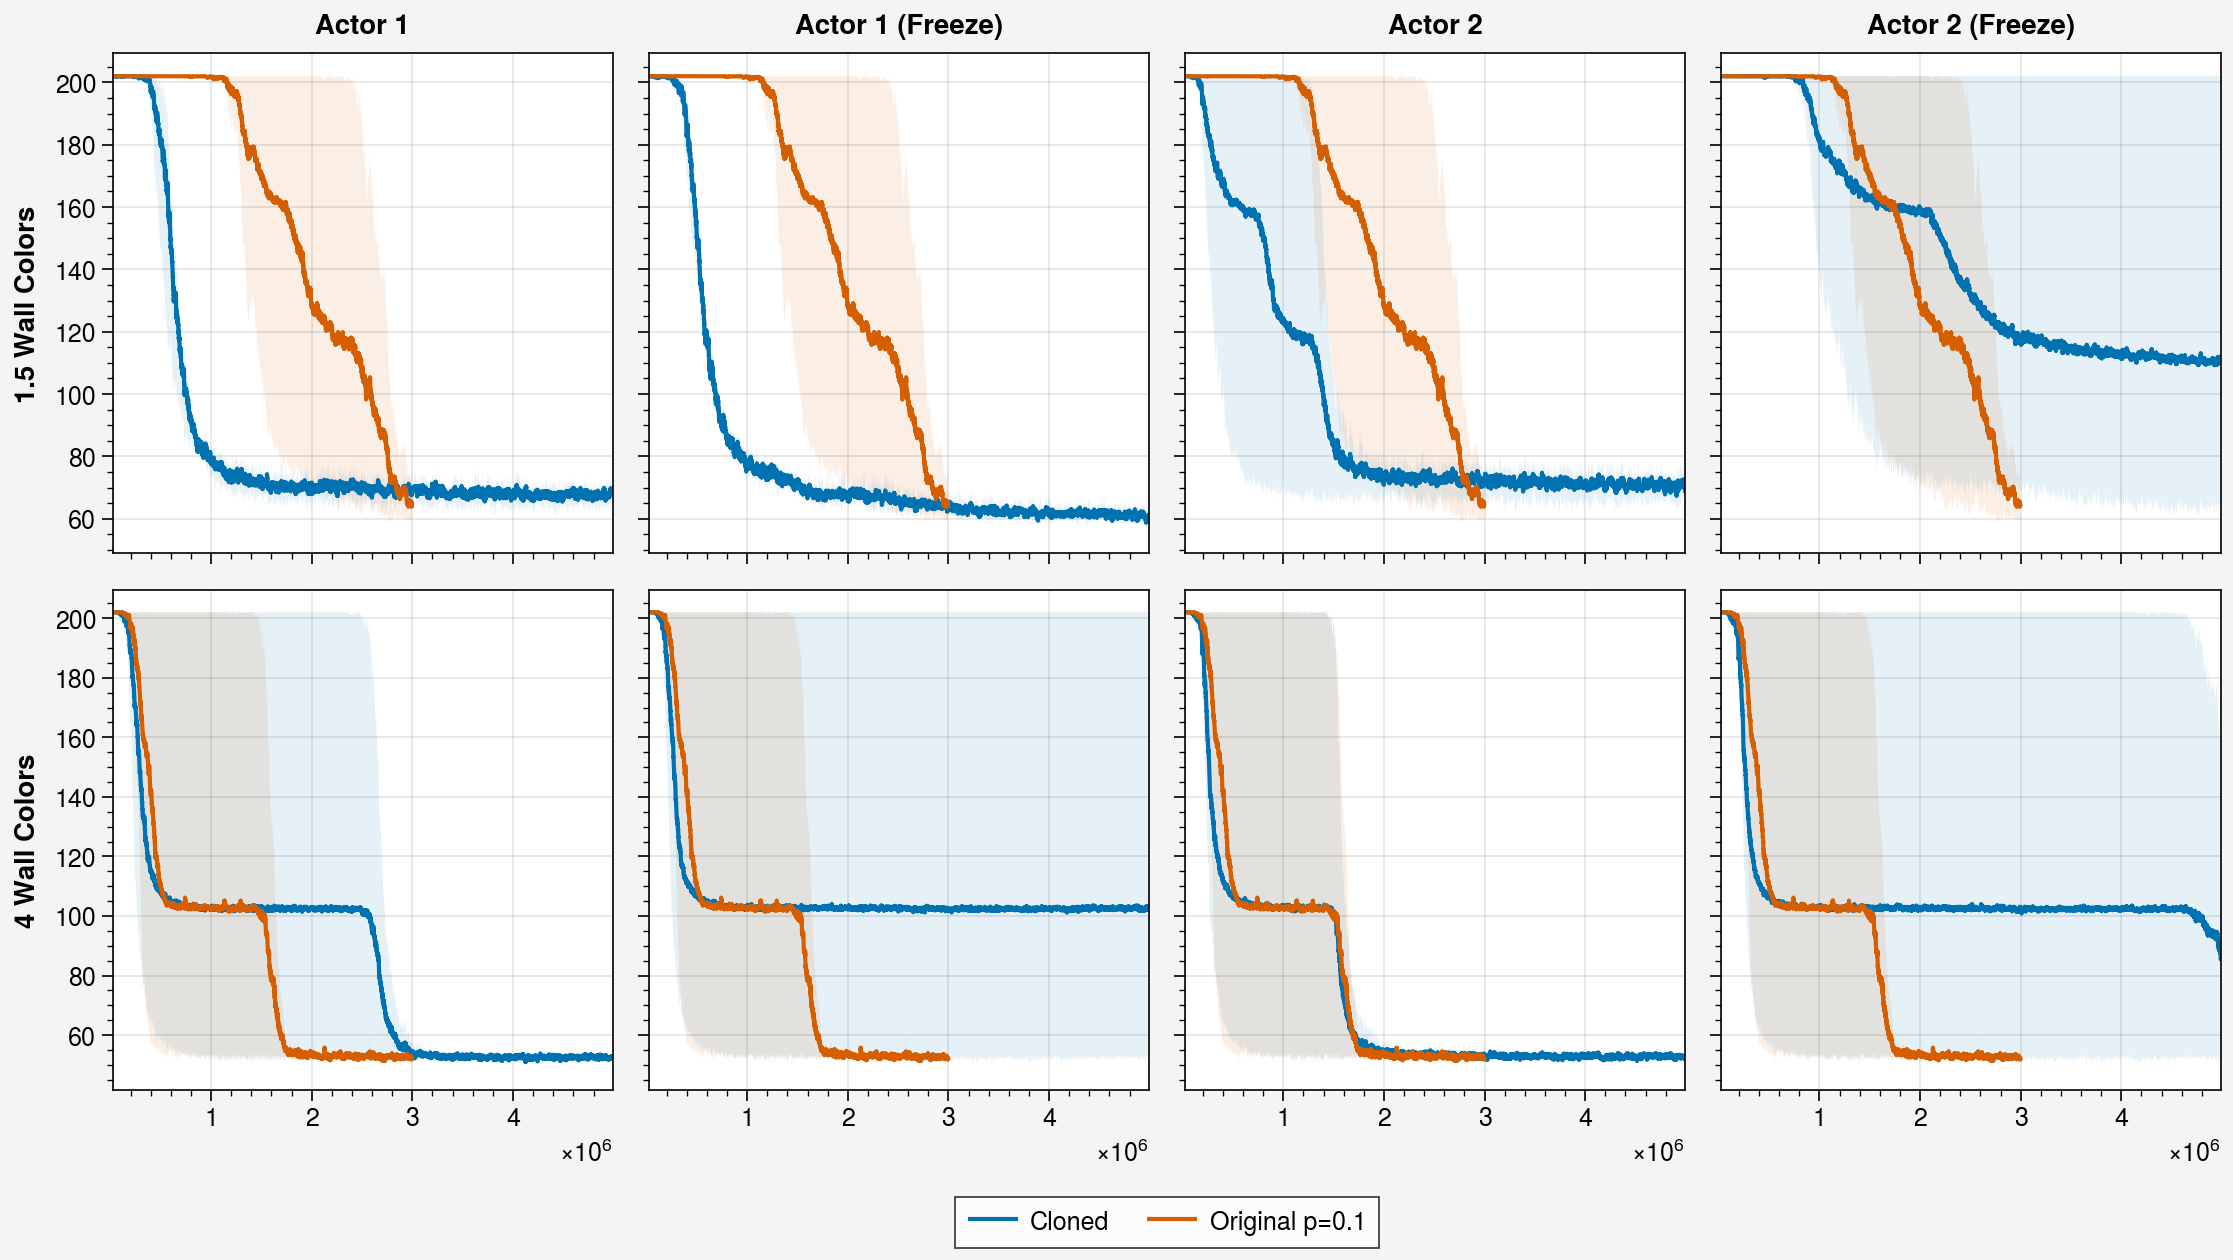

In [2]:
num_trials = 3
p = 0.1
wall_colors = [1.5, 4]
rows = []
batch = 256

clone_sets = ['cloactor0', 'clofractor0',  'cloactor1', 'clofractor1']
clone_labels = ['Actor 1', 'Actor 1 (Freeze)', 'Actor 2', 'Actor 2 (Freeze)']
fig, ax = pplt.subplots(nrows=2, ncols=4)

for i, wc in enumerate(wall_colors):
    for j, clone in enumerate(clone_sets):
        lines = []

        exp_name = f'shortcut_clonewc/shortcut_nonorm{clone}_wc{wc}p0.1batch256'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Cloned'))
        
        if wc == 4:
            exp_name = f'shortcut_resets/shortcutnav_fcp0.1reset3batch64'
        else:
            exp_name = f'shortcut_wc/shortcut_wc{wc}p0.1'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Original p=0.1'))

        
ax.format(leftlabels=[f'{wc} Wall Colors' for wc in wall_colors],
          toplabels=clone_labels)
fig.legend(lines, loc='b')

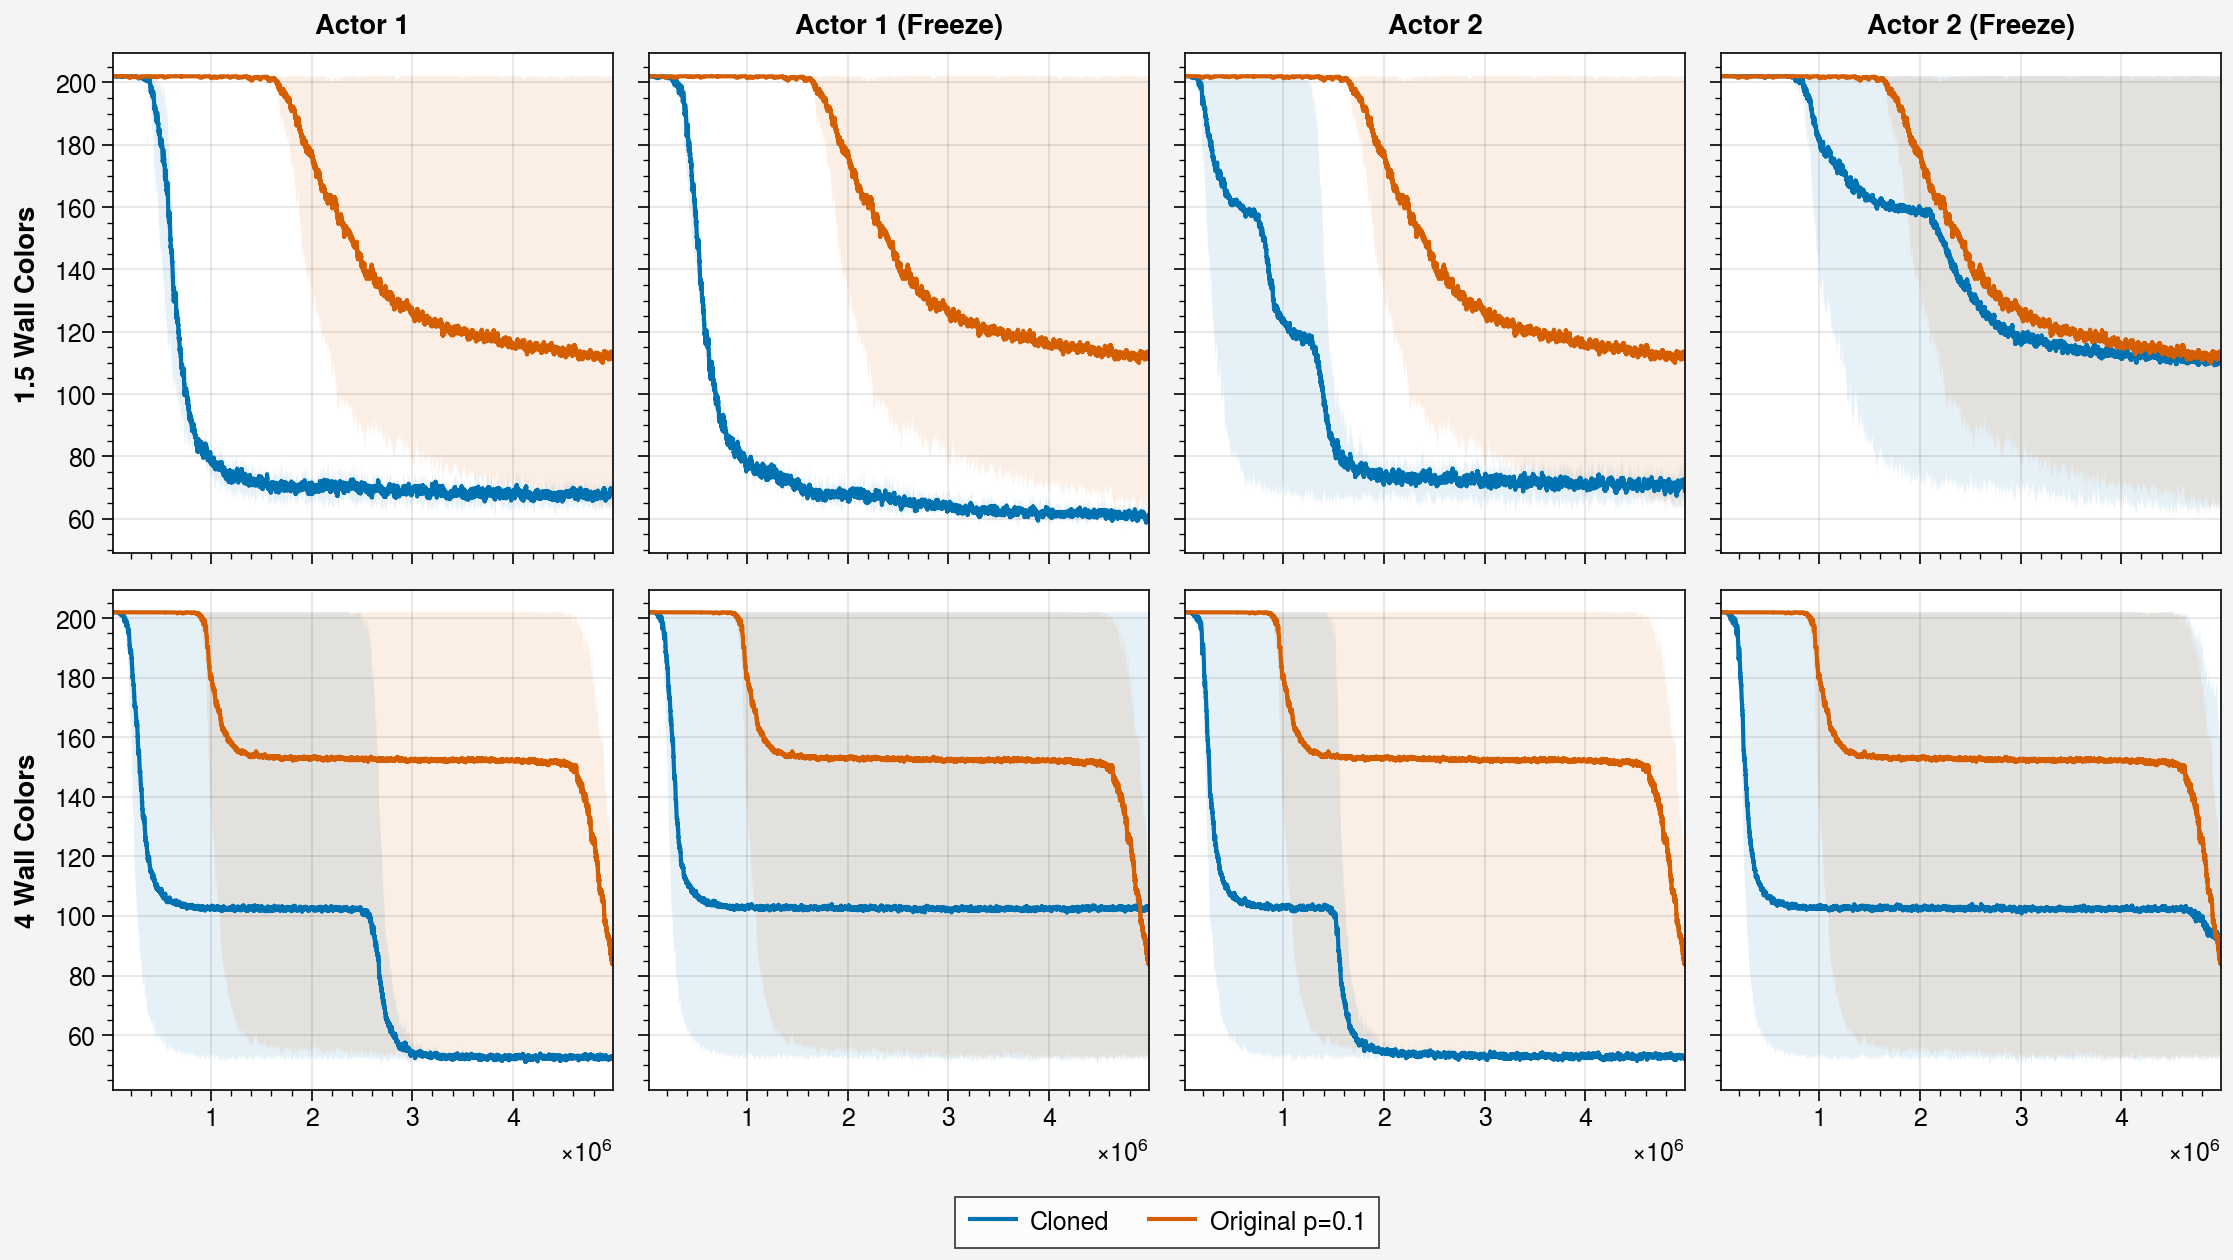

In [3]:
num_trials = 3
p = 0.1
wall_colors = [1.5, 4]
rows = []
batch = 256

clone_sets = ['cloactor0', 'clofractor0',  'cloactor1', 'clofractor1']
clone_labels = ['Actor 1', 'Actor 1 (Freeze)', 'Actor 2', 'Actor 2 (Freeze)']
fig, ax = pplt.subplots(nrows=2, ncols=4)

for i, wc in enumerate(wall_colors):
    for j, clone in enumerate(clone_sets):
        lines = []

        exp_name = f'shortcut_clonewc/shortcut_nonorm{clone}_wc{wc}p0.1batch256'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Cloned'))

        #Comparison to batch 256 p=0.1
        exp_name = f'shortcut_wc/shortcut_nonorm_wc{wc}p0.1batch256'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label='Original p=0.1'))

        
ax.format(leftlabels=[f'{wc} Wall Colors' for wc in wall_colors],
          toplabels=clone_labels)
fig.legend(lines, loc='b')

## Longer training with different seeds. p=0.1, 0.4, wc=1.5, 4, with and without env norms

In [5]:
ax

CartesianAxesSubplot(index=(0, 0), number=1)

shortcut_wc2/shortcut_wc1.5p0.1
shortcut_wc2/shortcut_wc4p0.1
shortcut_wc2/shortcut_wc1.5p0.4
shortcut_wc2/shortcut_wc4p0.4
shortcut_clonewc2/shortcut_nonorm_wc1.5p0.1batch256
shortcut_clonewc2/shortcut_nonorm_wc4p0.1batch256
shortcut_clonewc2/shortcut_nonorm_wc1.5p0.4batch256
shortcut_clonewc2/shortcut_nonorm_wc4p0.4batch256


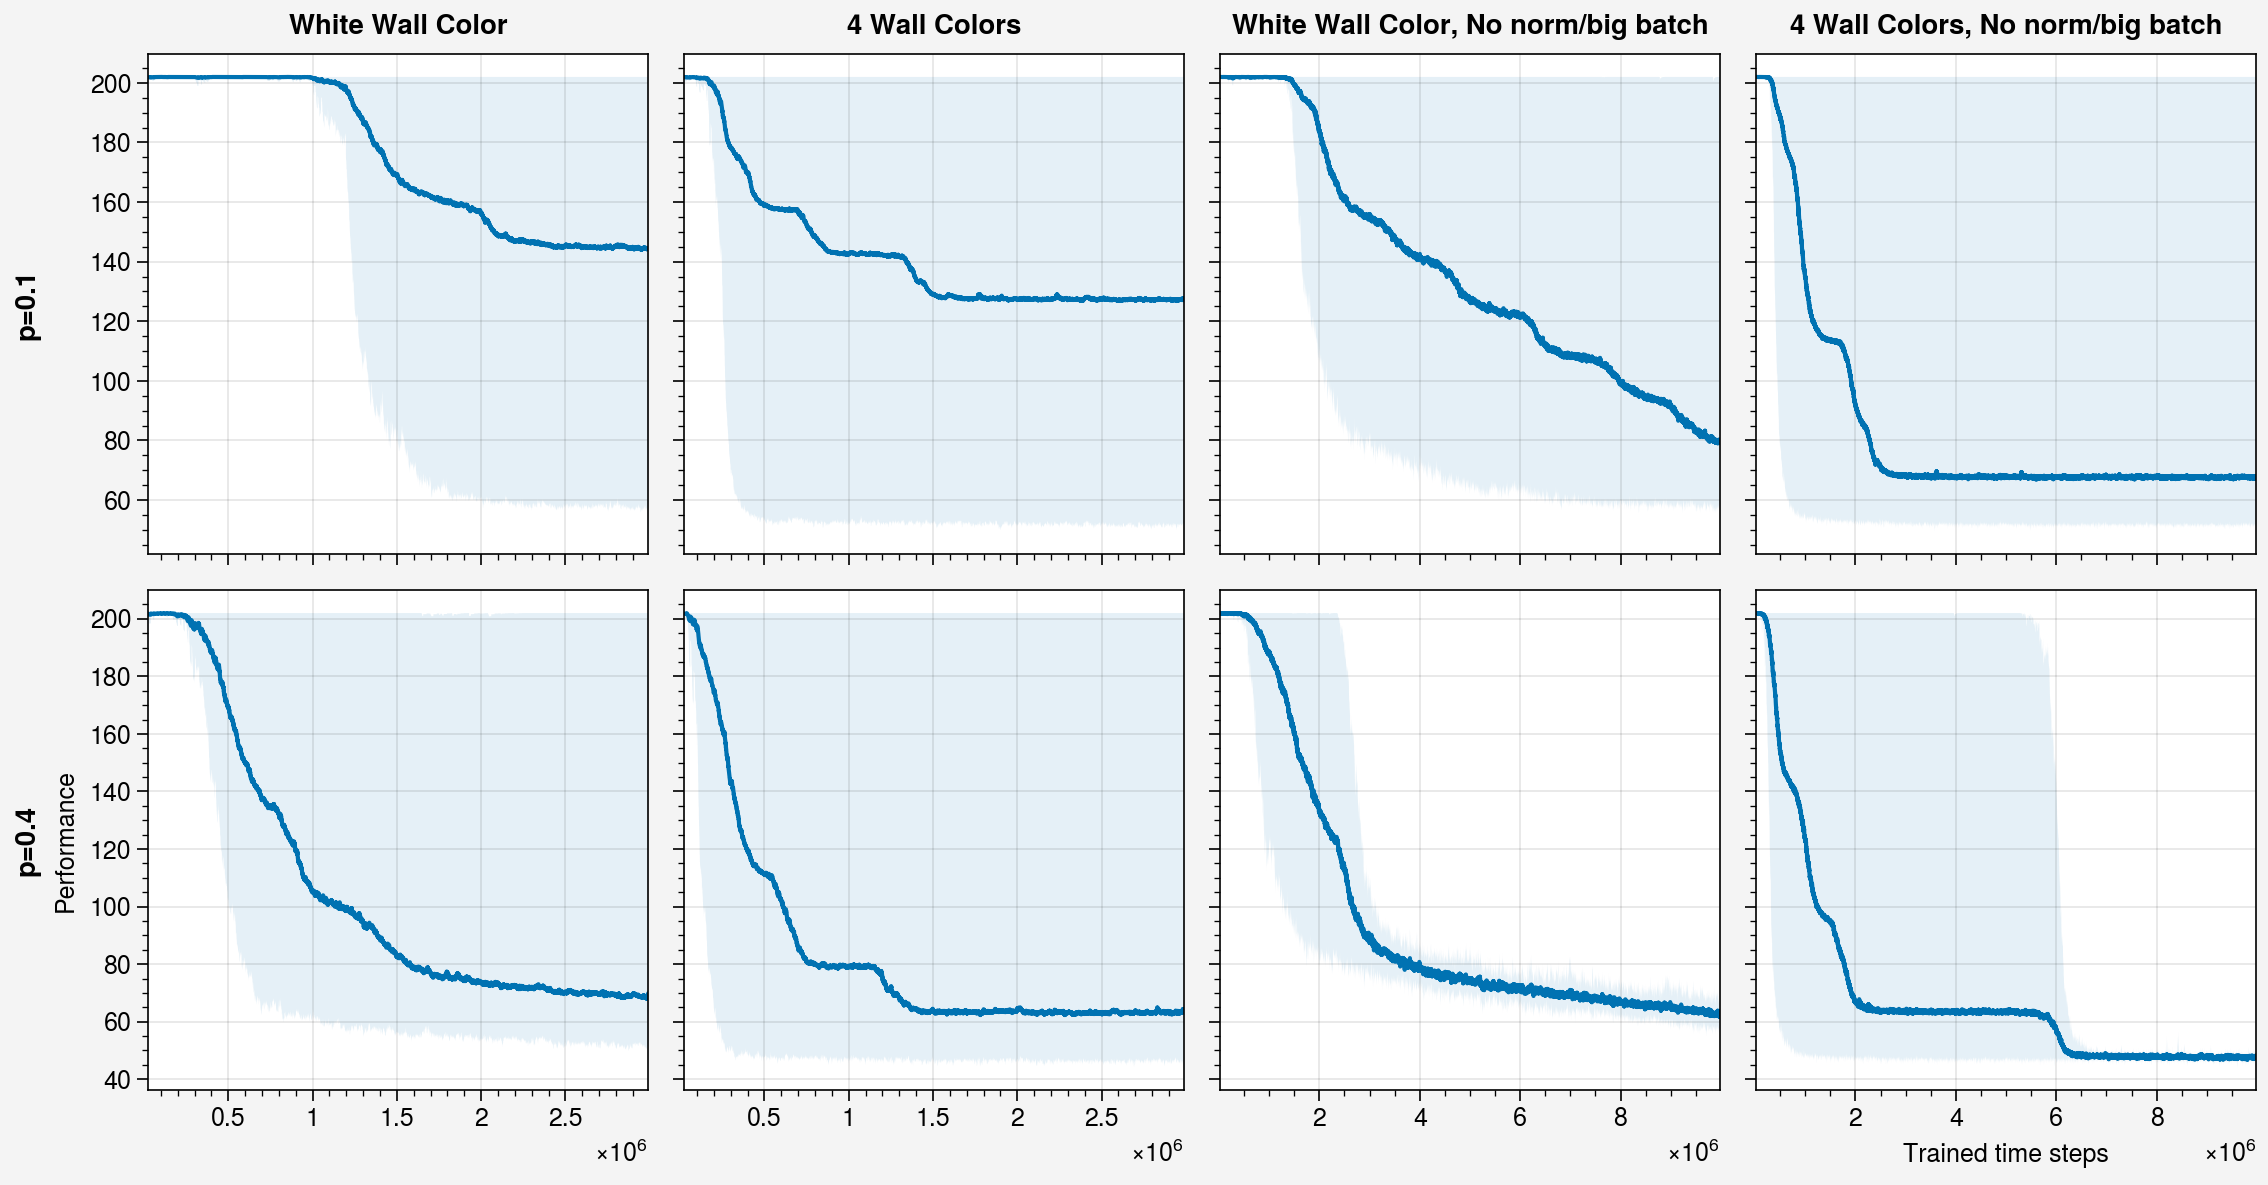

In [8]:
fig, axs = pplt.subplots(nrows=2, ncols=4)

probs = [0.1, 0.4]
wcs = [1.5, 4]
norms = ['', 'nonorm_']
suffixes = ['', 'batch256']
folders = ['shortcut_wc2', 'shortcut_clonewc2']

for i in range(len(norms)):
    norm = norms[i]
    suffix = suffixes[i]
    folder = folders[i]
    
    for n, p in enumerate(probs):
        for m, wc in enumerate(wcs):
            ax = axs[n, i*2+m]
            exp_name = f'{folder}/shortcut_{norm}wc{wc}p{p}{suffix}'
            # print(exp_name)
            average_runs(exp_name, 'length', ax=ax)
            
ax.format(xlabel='Trained time steps', ylabel='Performance',
          leftlabels=[f'p={p}' for p in probs],
          toplabels=['White Wall Color', '4 Wall Colors', 'White Wall Color, No norm/big batch', '4 Wall Colors, No norm/big batch'])
            

### Cloned actor 1 layer

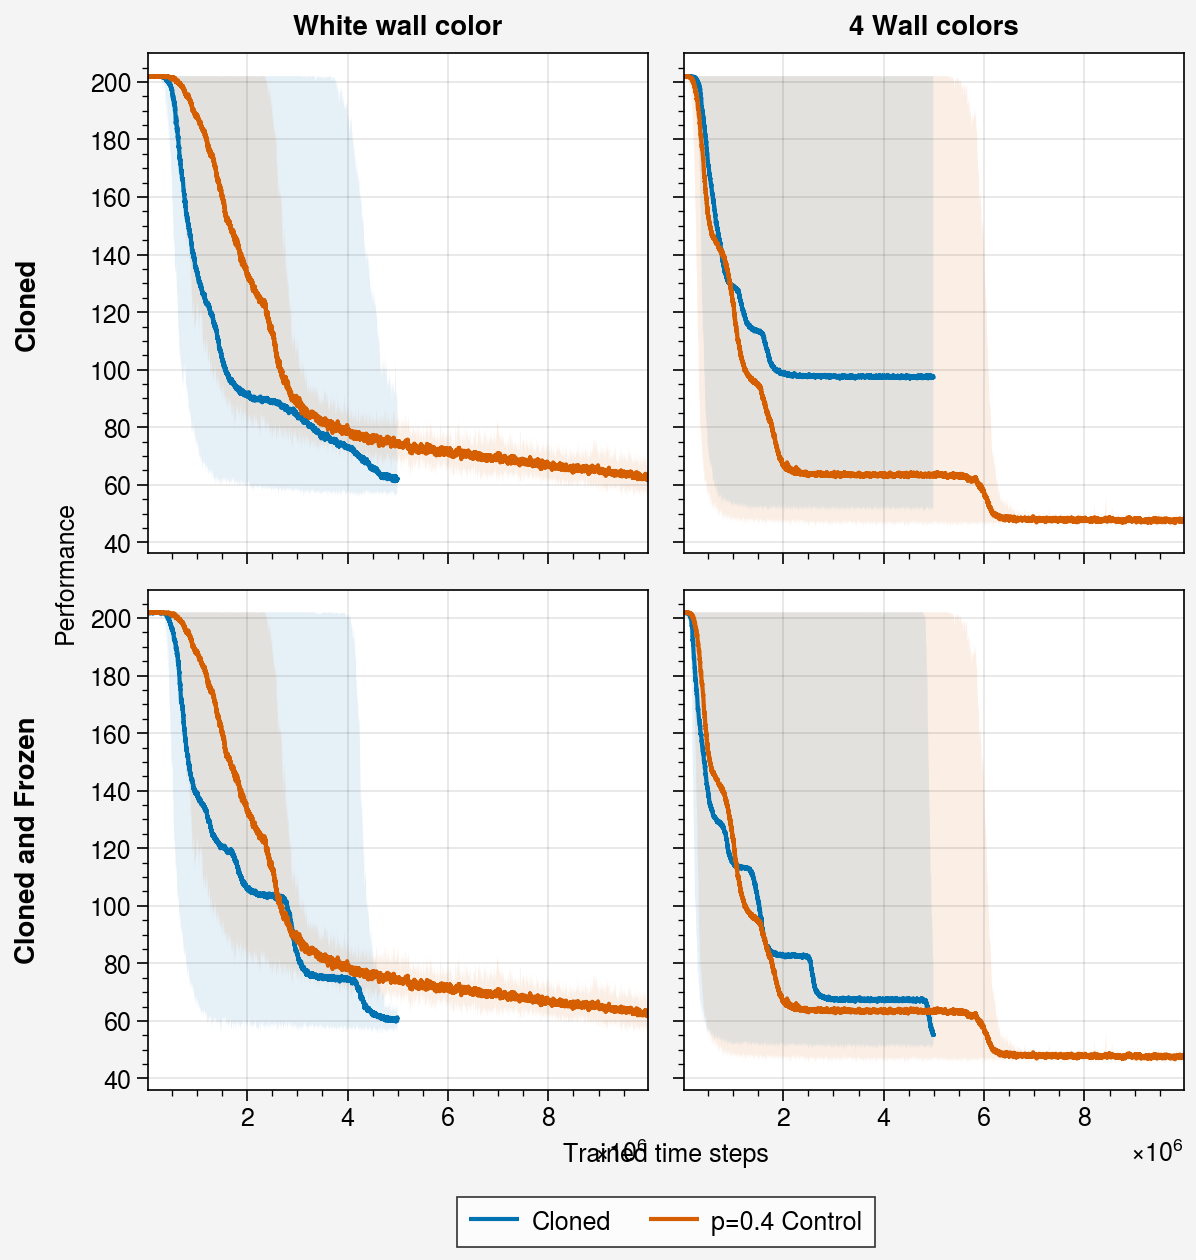

In [4]:
fig, axs = pplt.subplots(nrows=2, ncols=2)

clones = ['cloactor0', 'clofractor0']
wcs = [1.5, 4]

for n, clone in enumerate(clones):
    for m, wc in enumerate(wcs):
        lines = []
        
        ax = axs[n, m]
        exp_name = f'shortcut_clonewc2/shortcut_nonorm{clone}_wc{wc}p0.1batch256'
        lines.append(average_runs(exp_name, 'length', ax=ax, label='Cloned'))
        
        # Control - p=0.4 no clone
        exp_name = f'shortcut_clonewc2/shortcut_nonorm_wc{wc}p0.4batch256'
        lines.append(average_runs(exp_name, 'length', ax=ax, label='p=0.4 Control'))
            
axs.format(xlabel='Trained time steps', ylabel='Performance',
          toplabels=['White wall color', '4 Wall colors'],
          leftlabels=['Cloned', 'Cloned and Frozen'])
fig.legend(lines, loc='b')
            

## 2nd Corridor

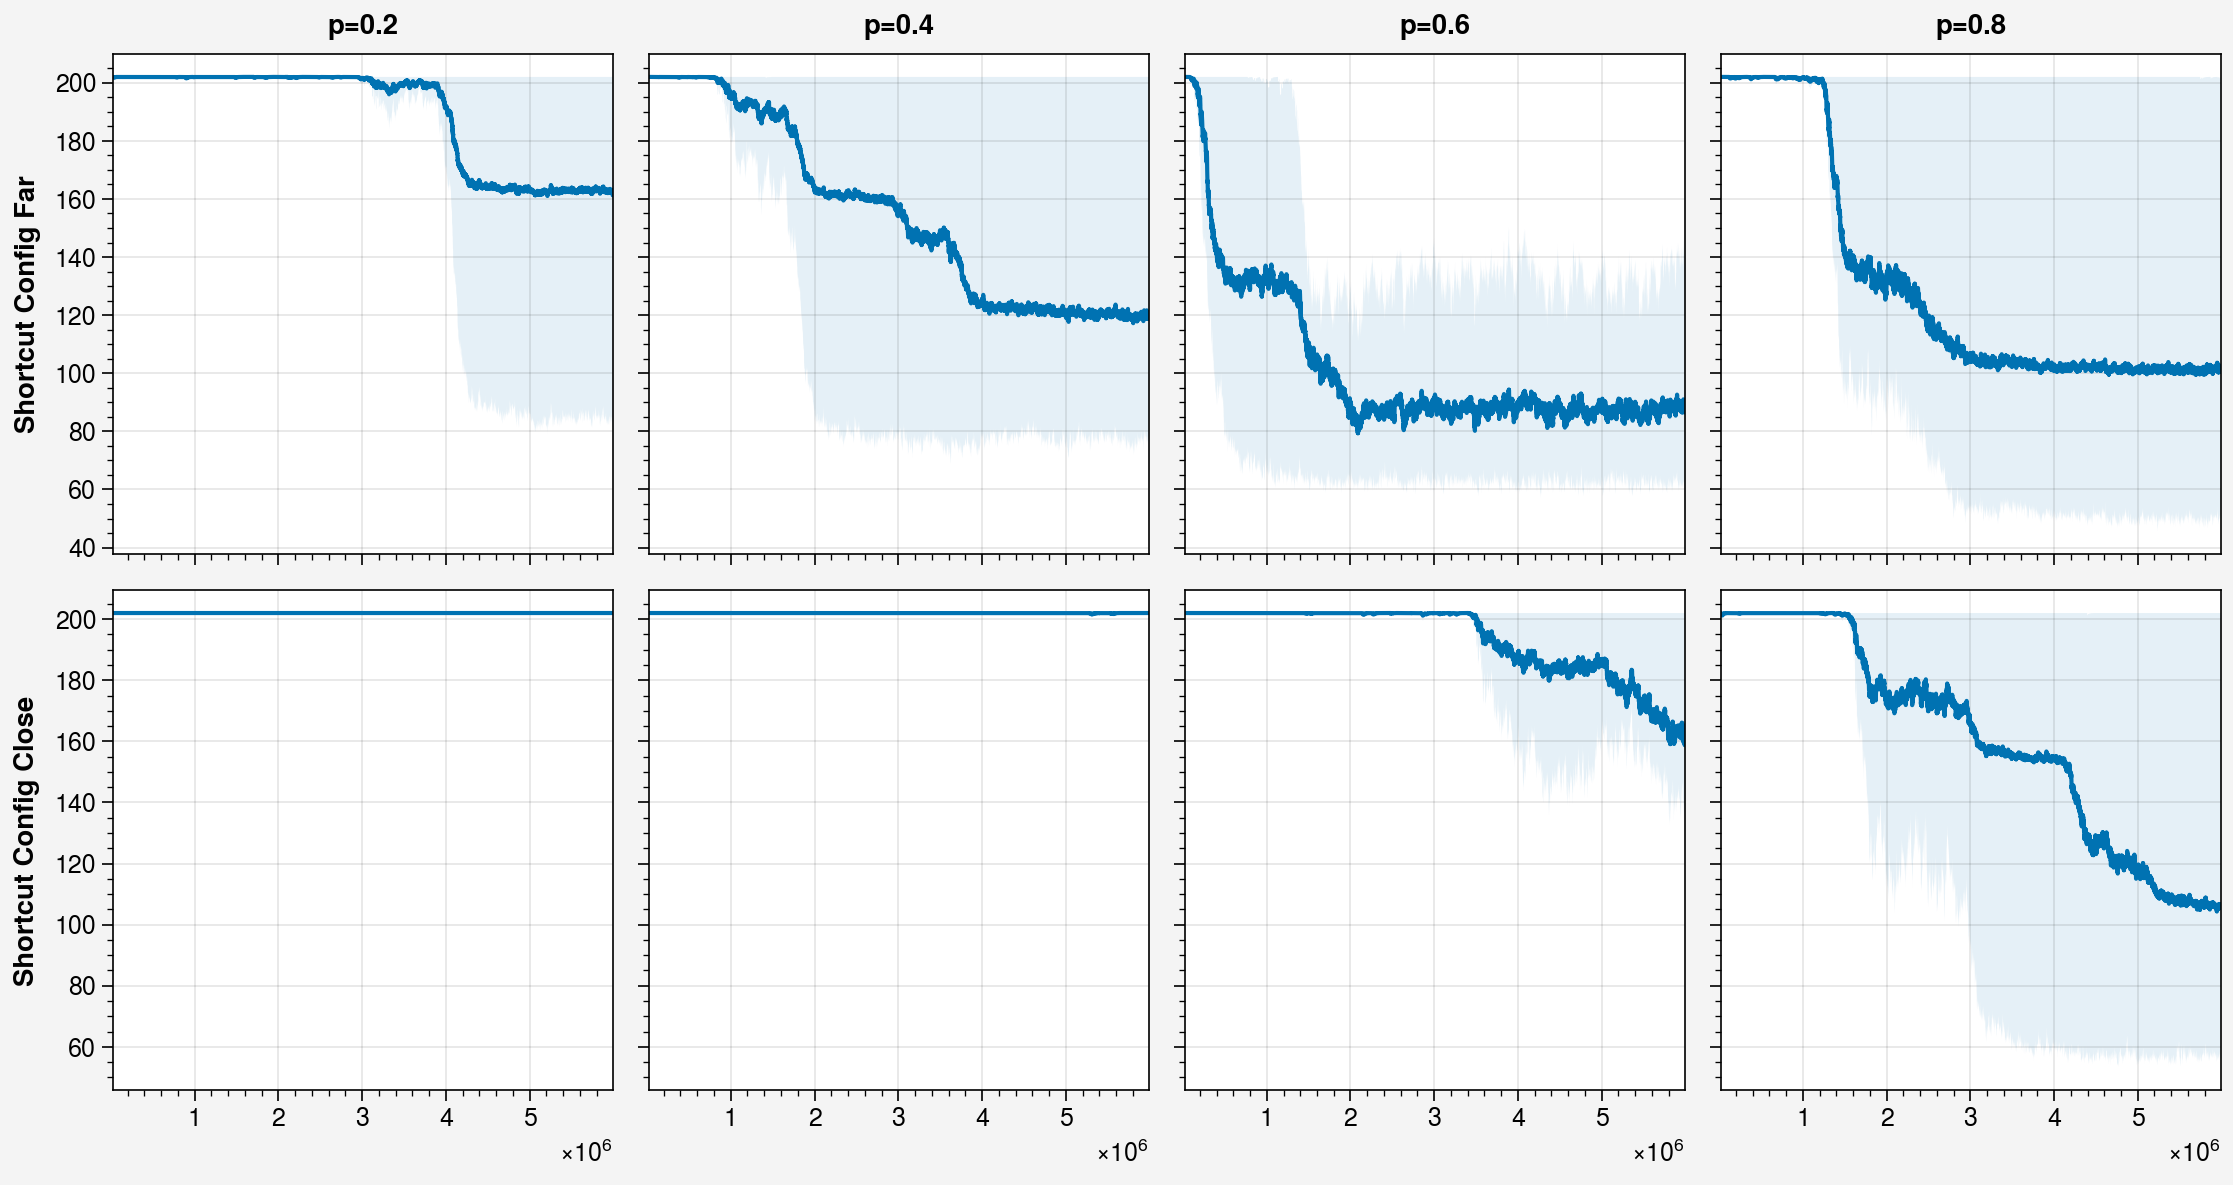

In [17]:
shortcut_probs = [0.2, 0.4, 0.6, 0.8]
shortcut_configs = [2, 2.5]
shortcut_config_labels = ['Far', 'Close']

fig, ax = pplt.subplots(nrows=2, ncols=4)

for i, sc in enumerate(shortcut_configs):
    for j, p in enumerate(shortcut_probs):
        exp_name = f'shortcut_sc/shortcut_sc{sc}p{p}'
        lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label=f'{batch}'))

ax.format(leftlabels=[f'Shortcut Config {sc}' for sc in shortcut_config_labels],
          toplabels=[f'p={p}' for p in shortcut_probs])

### Longer training

In [ ]:
fig, ax = pplt.subplots()


Next
~~* Get some extra poster plots ready on phone~~

~~* Check performance of explore punish variations~~
~~* Change shortcut opening probability~~
~~* Add subfolder saving for runs especially since we're starting to run multiple types of experiments~~
~~* Look at performance of shortcut environment agents - why is there step performance? Maybe need to look at individual experiments~~
* Begin set up of balloon game environment?
~~* Check on differences between PPO return computation and R2D2 and maybe need to allow return computations to simply be as long as the sequences we pull from batch~~
* Later on maybe need to make some test environments and steps to manually compute returns and gradients with to make sure things are working correctly
* Set up functions for collecting activations during policy
* Set up functions to better quantify explorepunish agent performance
    * Later want to have functions that quantify exploration efficiency and memory of goal position
* Observe whether we can see representations of goal position versus self position in RNN
* Test networks with RNN after a first FC layer instead of RNN being first layer
* Better quantify shortcut performance, analyze behavior
    * Looks pretty good - would like way to quantify learning to use shortcut during training too

In [9]:
import pickle

In [21]:
all_shortcut_results = pickle.load(open('data/shortcut/reset_performances', 'rb'))

exp_name = 'shortcutnav_p0.1reset1batch32'

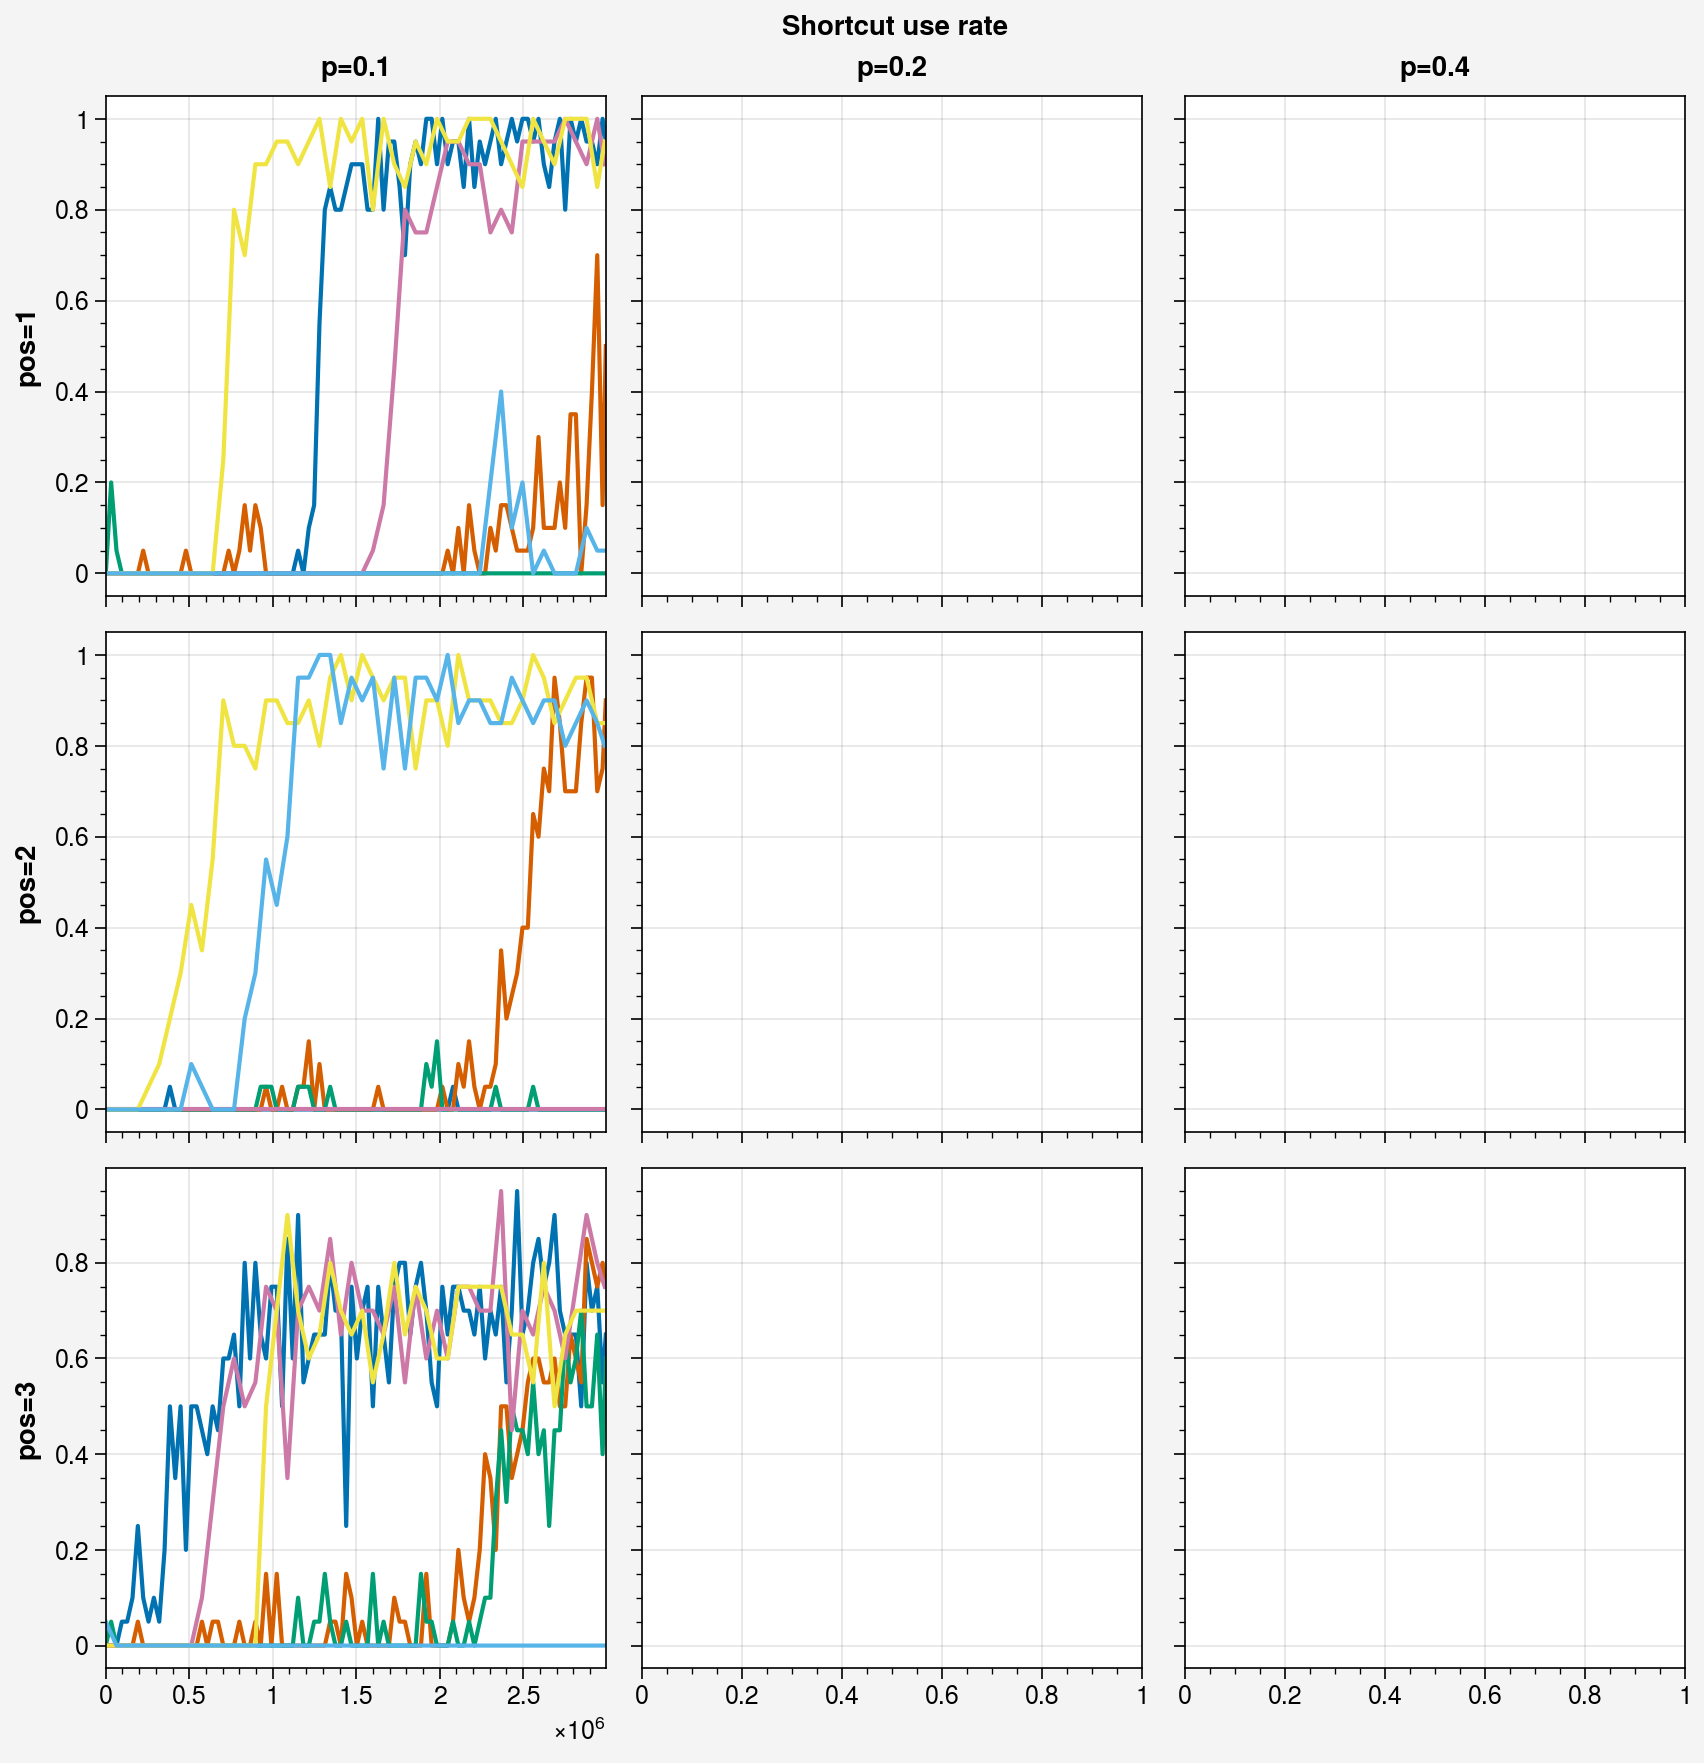

In [10]:
probs = [0.1, 0.2, 0.4]
character_reset_poss = [1, 2, 3]
batch_sizes = [32, 64]
trials = range(3)

all_shortcut_results = pickle.load(open('data/shortcut/reset_performances', 'rb'))

fig, ax = pplt.subplots(ncols=3, nrows=3)
for i, pos in enumerate(character_reset_poss):
    for j, prob in enumerate(probs):
        lines = []
        for batch in batch_sizes:
            exp_name = f'shortcutnav_p{prob}reset{pos}batch{batch}'
            if exp_name not in all_shortcut_results:
                continue
            
            ys = []
            xs = []
            for trial in trials:
                if trial not in all_shortcut_results[exp_name]:
                    continue
                
                chks = all_shortcut_results[exp_name][trial].keys()
                y = []
                x = []
                for chk in chks:
                    res = all_shortcut_results[exp_name][trial][chk]
                    y.append(res['shortcut_use_rate'])
                    x.append(chk*batch*100)
                ys.append(y)
                xs.append(x)
                
                # lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label=f'{batch}'))
            
            for trial in range(len(ys)):
                ax[i, j].plot(xs[trial], ys[trial])

ax.format(toplabels=[f'p={prob}' for prob in probs],
         leftlabels=[f'pos={pos}' for pos in character_reset_poss],
         suptitle='Shortcut use rate')

# Shortcut pt2

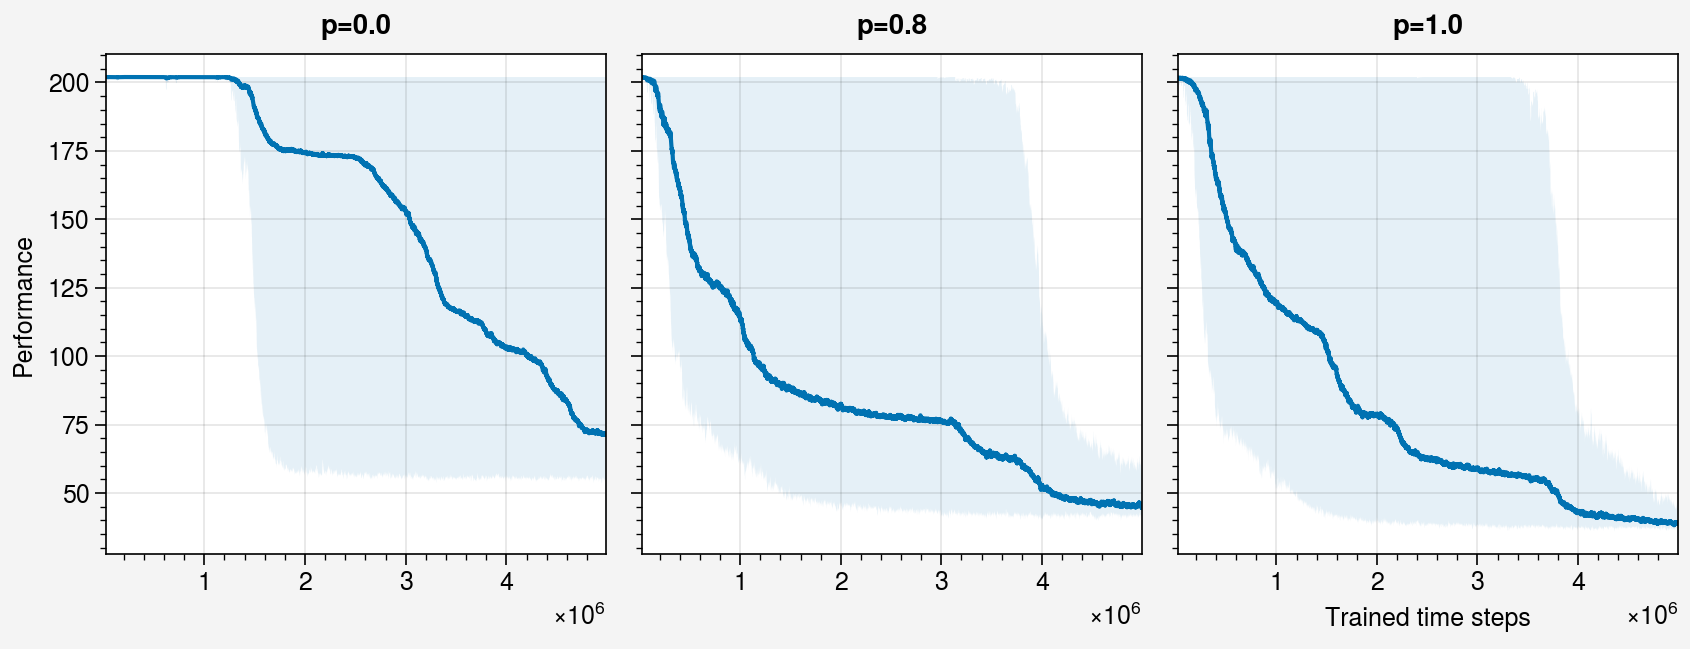

In [16]:
fig, axs = pplt.subplots(ncols=3)

probs = [0.0, 0.8, 1.0]

for n, p in enumerate(probs):
    ax = axs[n]
    exp_name = f'shortcut_wc2/shortcut_wc1.5p{p}'
    average_runs(exp_name, 'length', ax=ax)

ax.format(xlabel='Trained time steps', ylabel='Performance',
      toplabels=[f'p={p}' for p in probs])

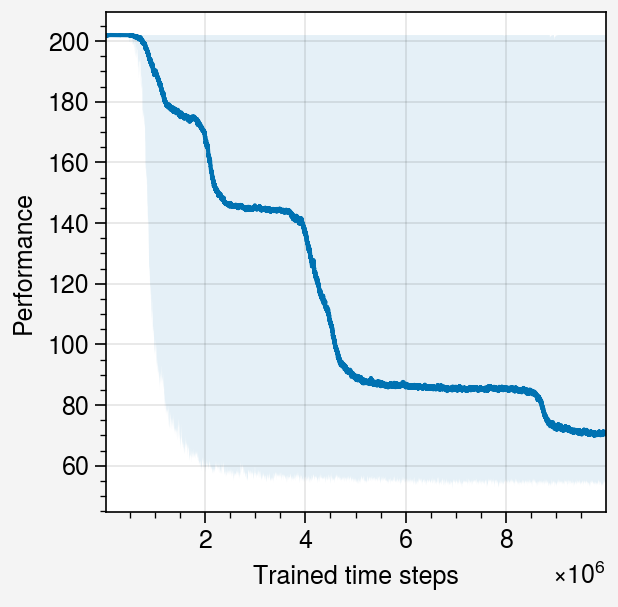

In [7]:
fig, ax = pplt.subplots()
p = 0.1
exp_name = f'shortcut_wc2/shortcut_wc1.5p{p}longer'
ys = average_runs(exp_name, 'length', ax=ax)

ax.format(xlabel='Trained time steps', ylabel='Performance')

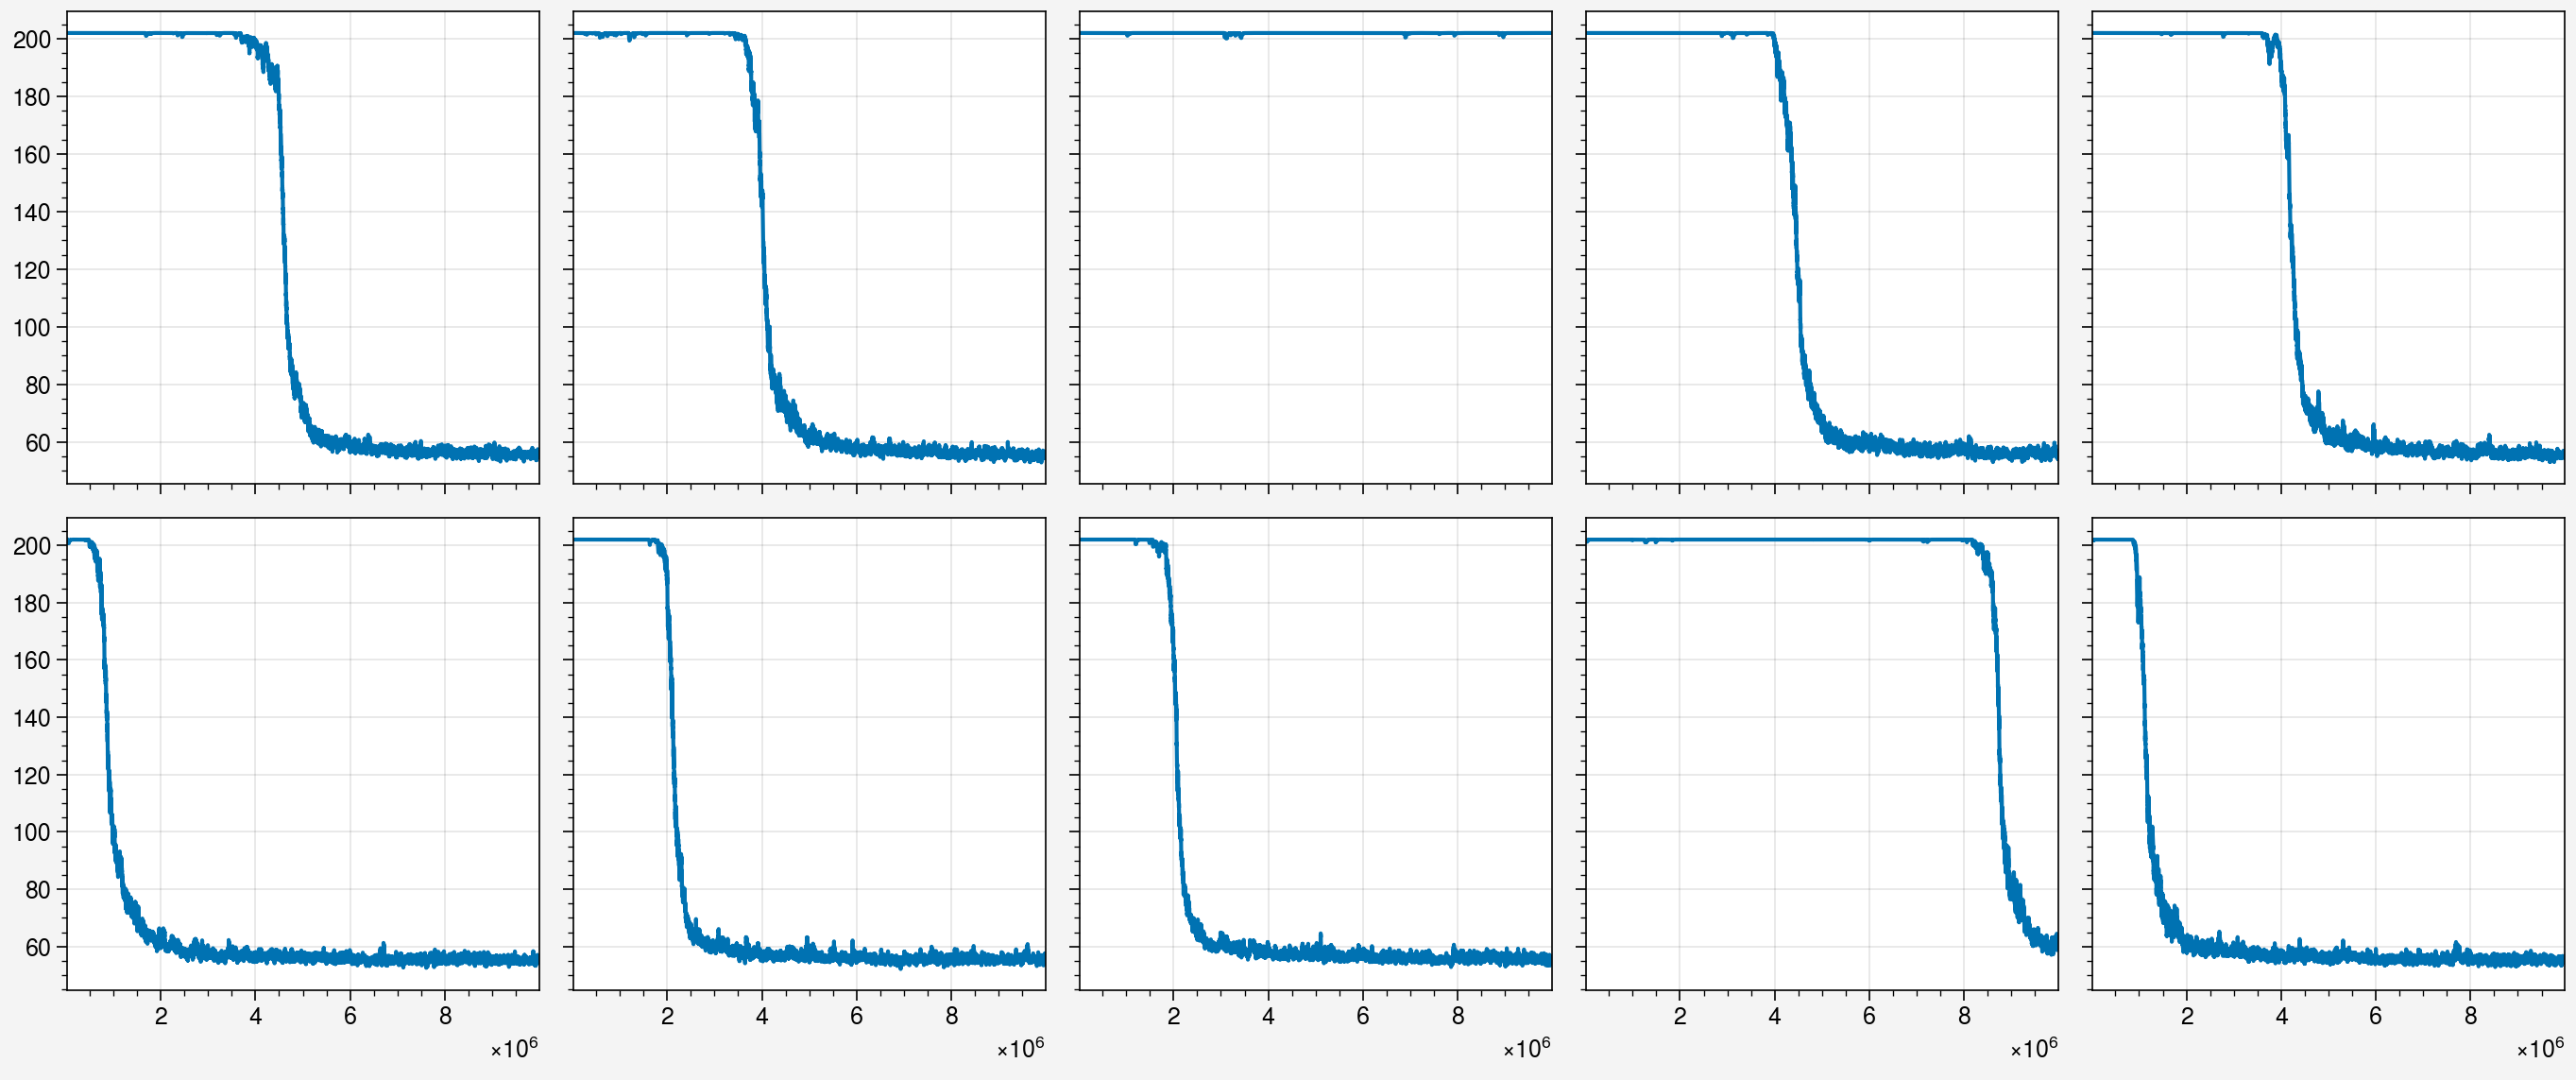

In [12]:
fig, ax = pplt.subplots(nrows=2,  ncols=5)
p = 0.1
exp_name = f'shortcut_wc2/shortcut_wc1.5p{p}longer'
ys = average_runs(exp_name, 'length', ax=ax, ret=True)

for i in range(10):
    ax[i].plot(ys[0], ys[1][i])

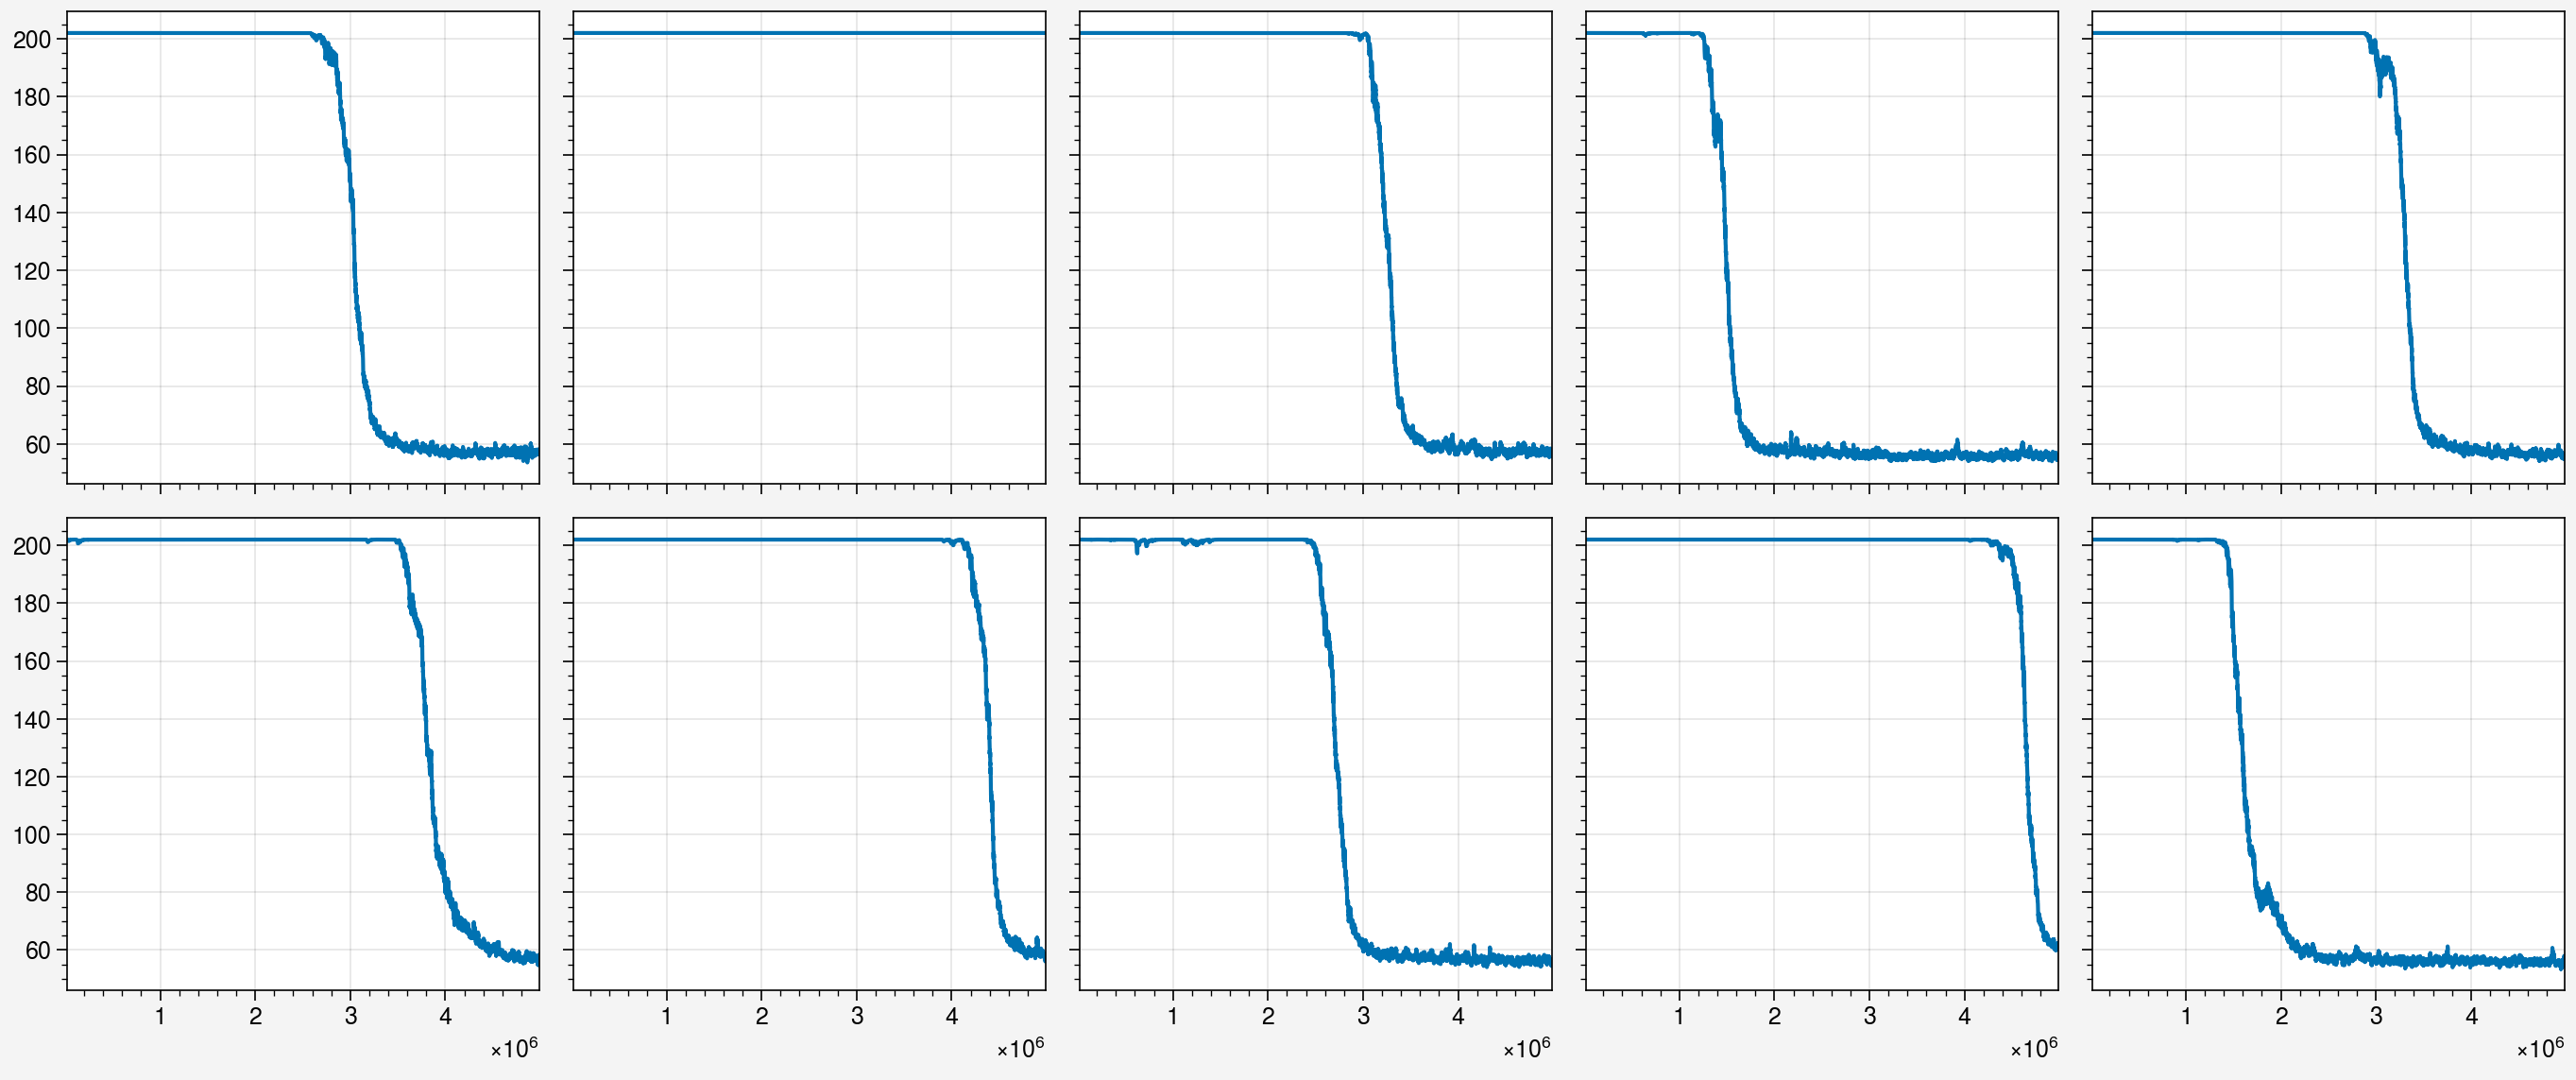

In [13]:
fig, ax = pplt.subplots(nrows=2,  ncols=5)
p = 0.1
exp_name = f'shortcut_wc2/shortcut_wc1.5p0.0'
ys = average_runs(exp_name, 'length', ax=ax, ret=True)

for i in range(10):
    ax[i].plot(ys[0], ys[1][i])

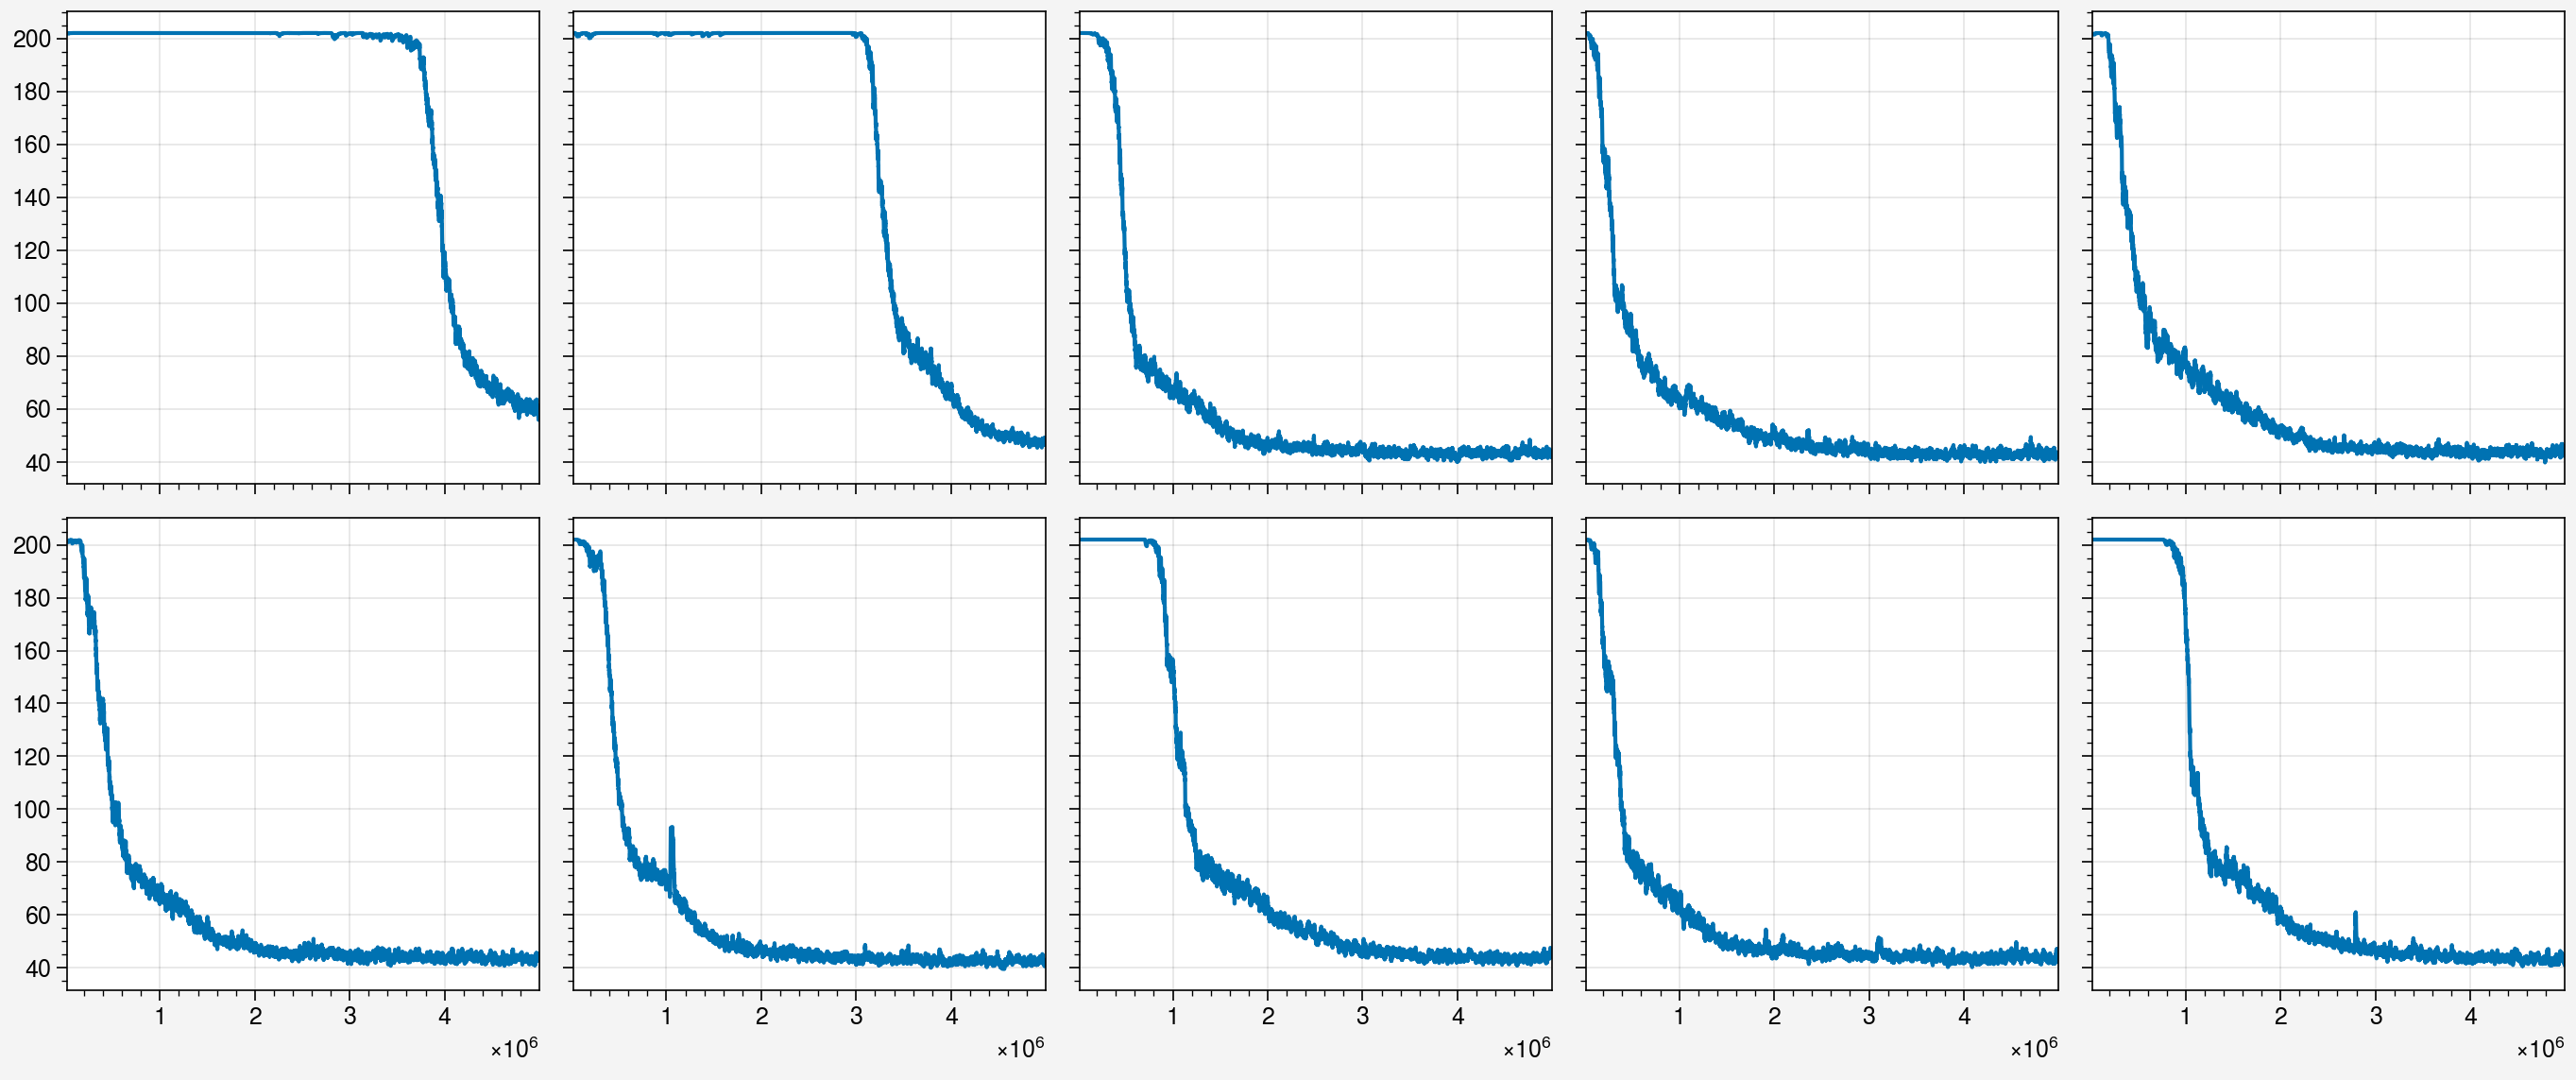

In [14]:
fig, ax = pplt.subplots(nrows=2,  ncols=5)
p = 0.1
exp_name = f'shortcut_wc2/shortcut_wc1.5p0.8'
ys = average_runs(exp_name, 'length', ax=ax, ret=True)

for i in range(10):
    ax[i].plot(ys[0], ys[1][i])

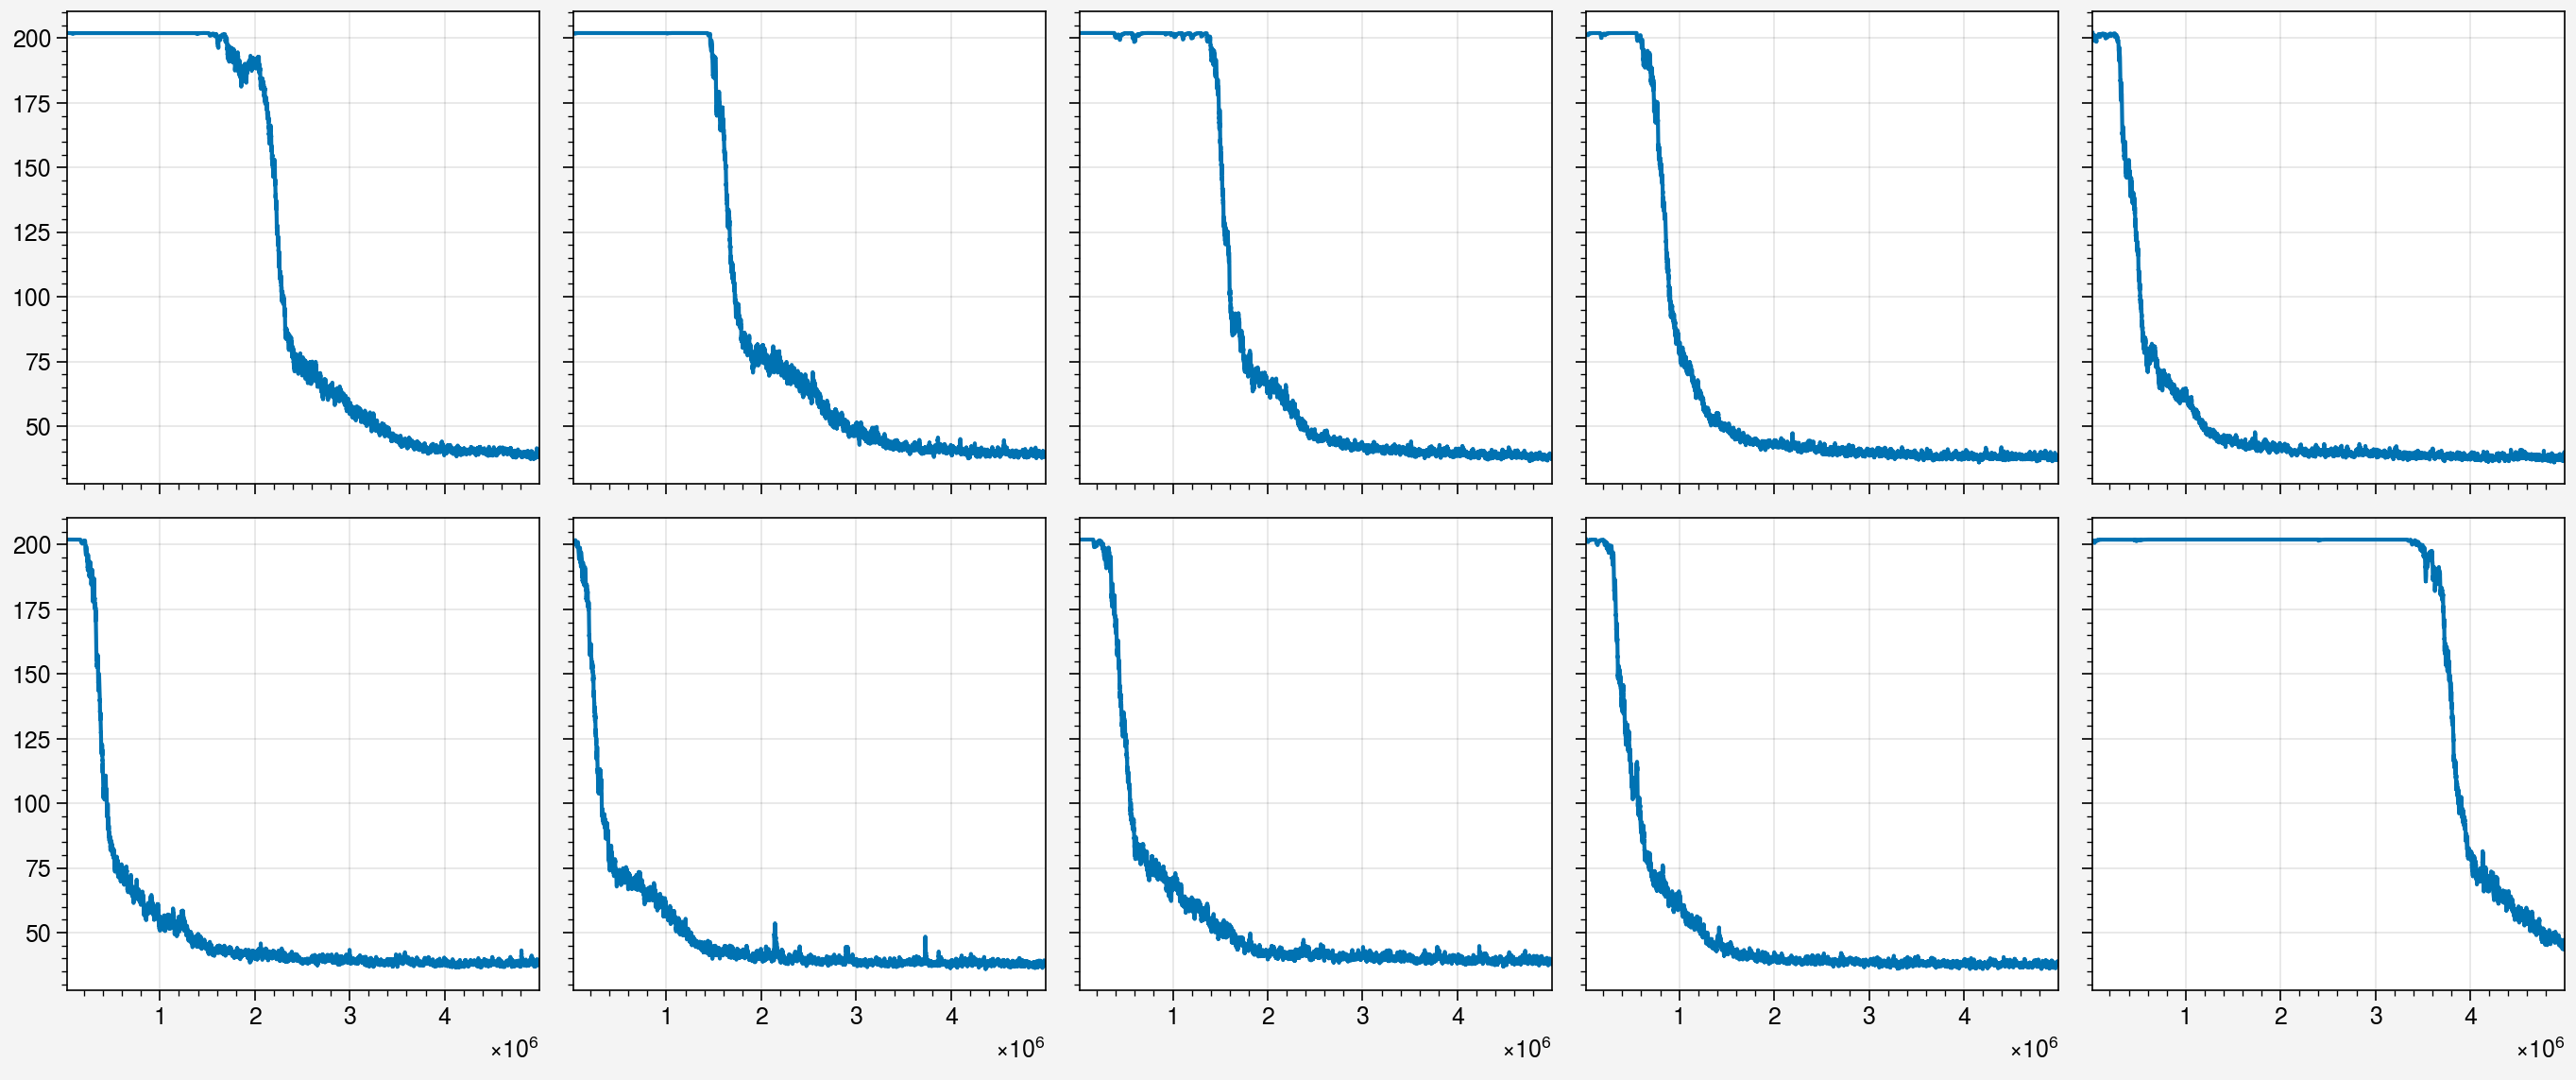

In [17]:
fig, ax = pplt.subplots(nrows=2,  ncols=5)
exp_name = f'shortcut_wc2/shortcut_wc1.5p1.0'
ys = average_runs(exp_name, 'length', ax=ax, ret=True)

for i in range(10):
    ax[i].plot(ys[0], ys[1][i])

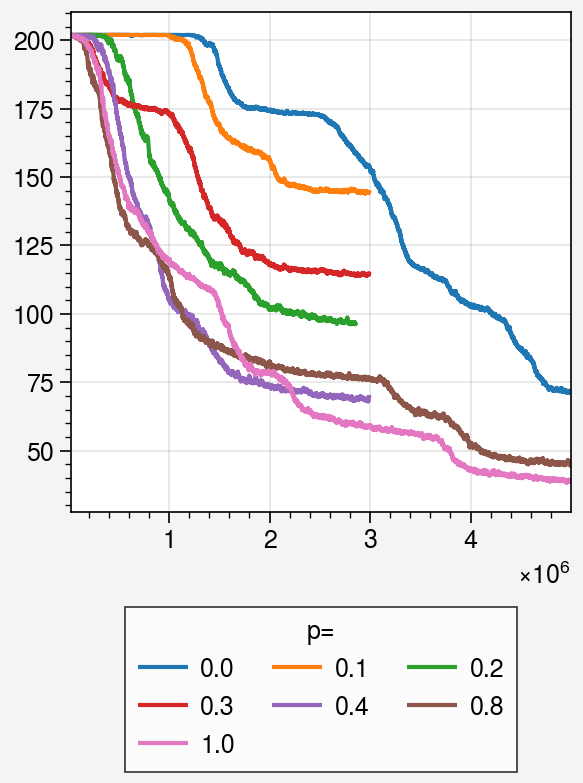

In [15]:
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.8, 1.0]

fig, ax = pplt.subplots()
for n, p in enumerate(probs):
    exp_name = f'shortcut_wc2/shortcut_wc1.5p{p}'
    average_runs(exp_name, 'length', ax=ax, cloud_alpha=0, label=f'{p}', color=rgb_colors[n])

ax.legend(title='p=', loc='b')

C:\Users\14and\AppData\Local\Temp\ipykernel_36008\29970961.py:10: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.legend(title='p=', loc='b')


(<matplotlib.legend.Legend at 0x29448a49a00>,
 <matplotlib.legend.Legend at 0x294491da5b0>)

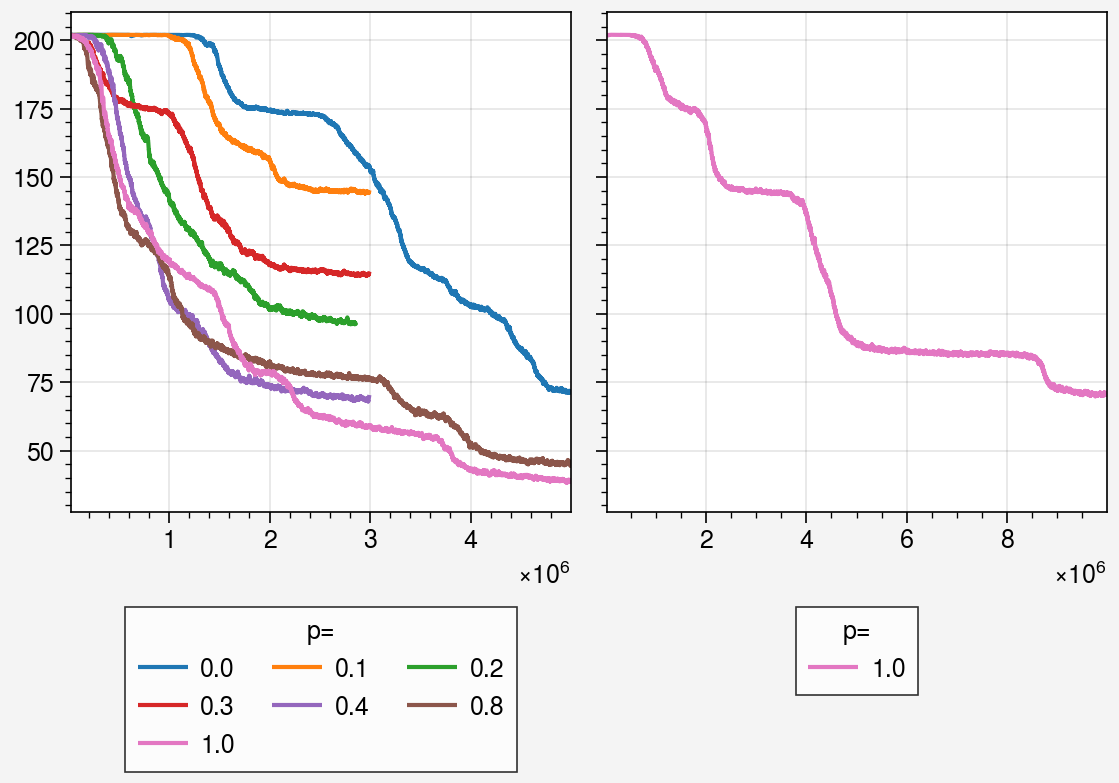

In [16]:
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.8, 1.0]

fig, ax = pplt.subplots(ncols=2)
for n, p in enumerate(probs):
    exp_name = f'shortcut_wc2/shortcut_wc1.5p{p}'
    average_runs(exp_name, 'length', ax=ax[0], cloud_alpha=0, label=f'{p}', color=rgb_colors[n])

average_runs('shortcut_wc2/shortcut_wc1.5p0.1longer', 'length', ax=ax[1], cloud_alpha=0, label=f'{p}', color=rgb_colors[n])

ax.legend(title='p=', loc='b')

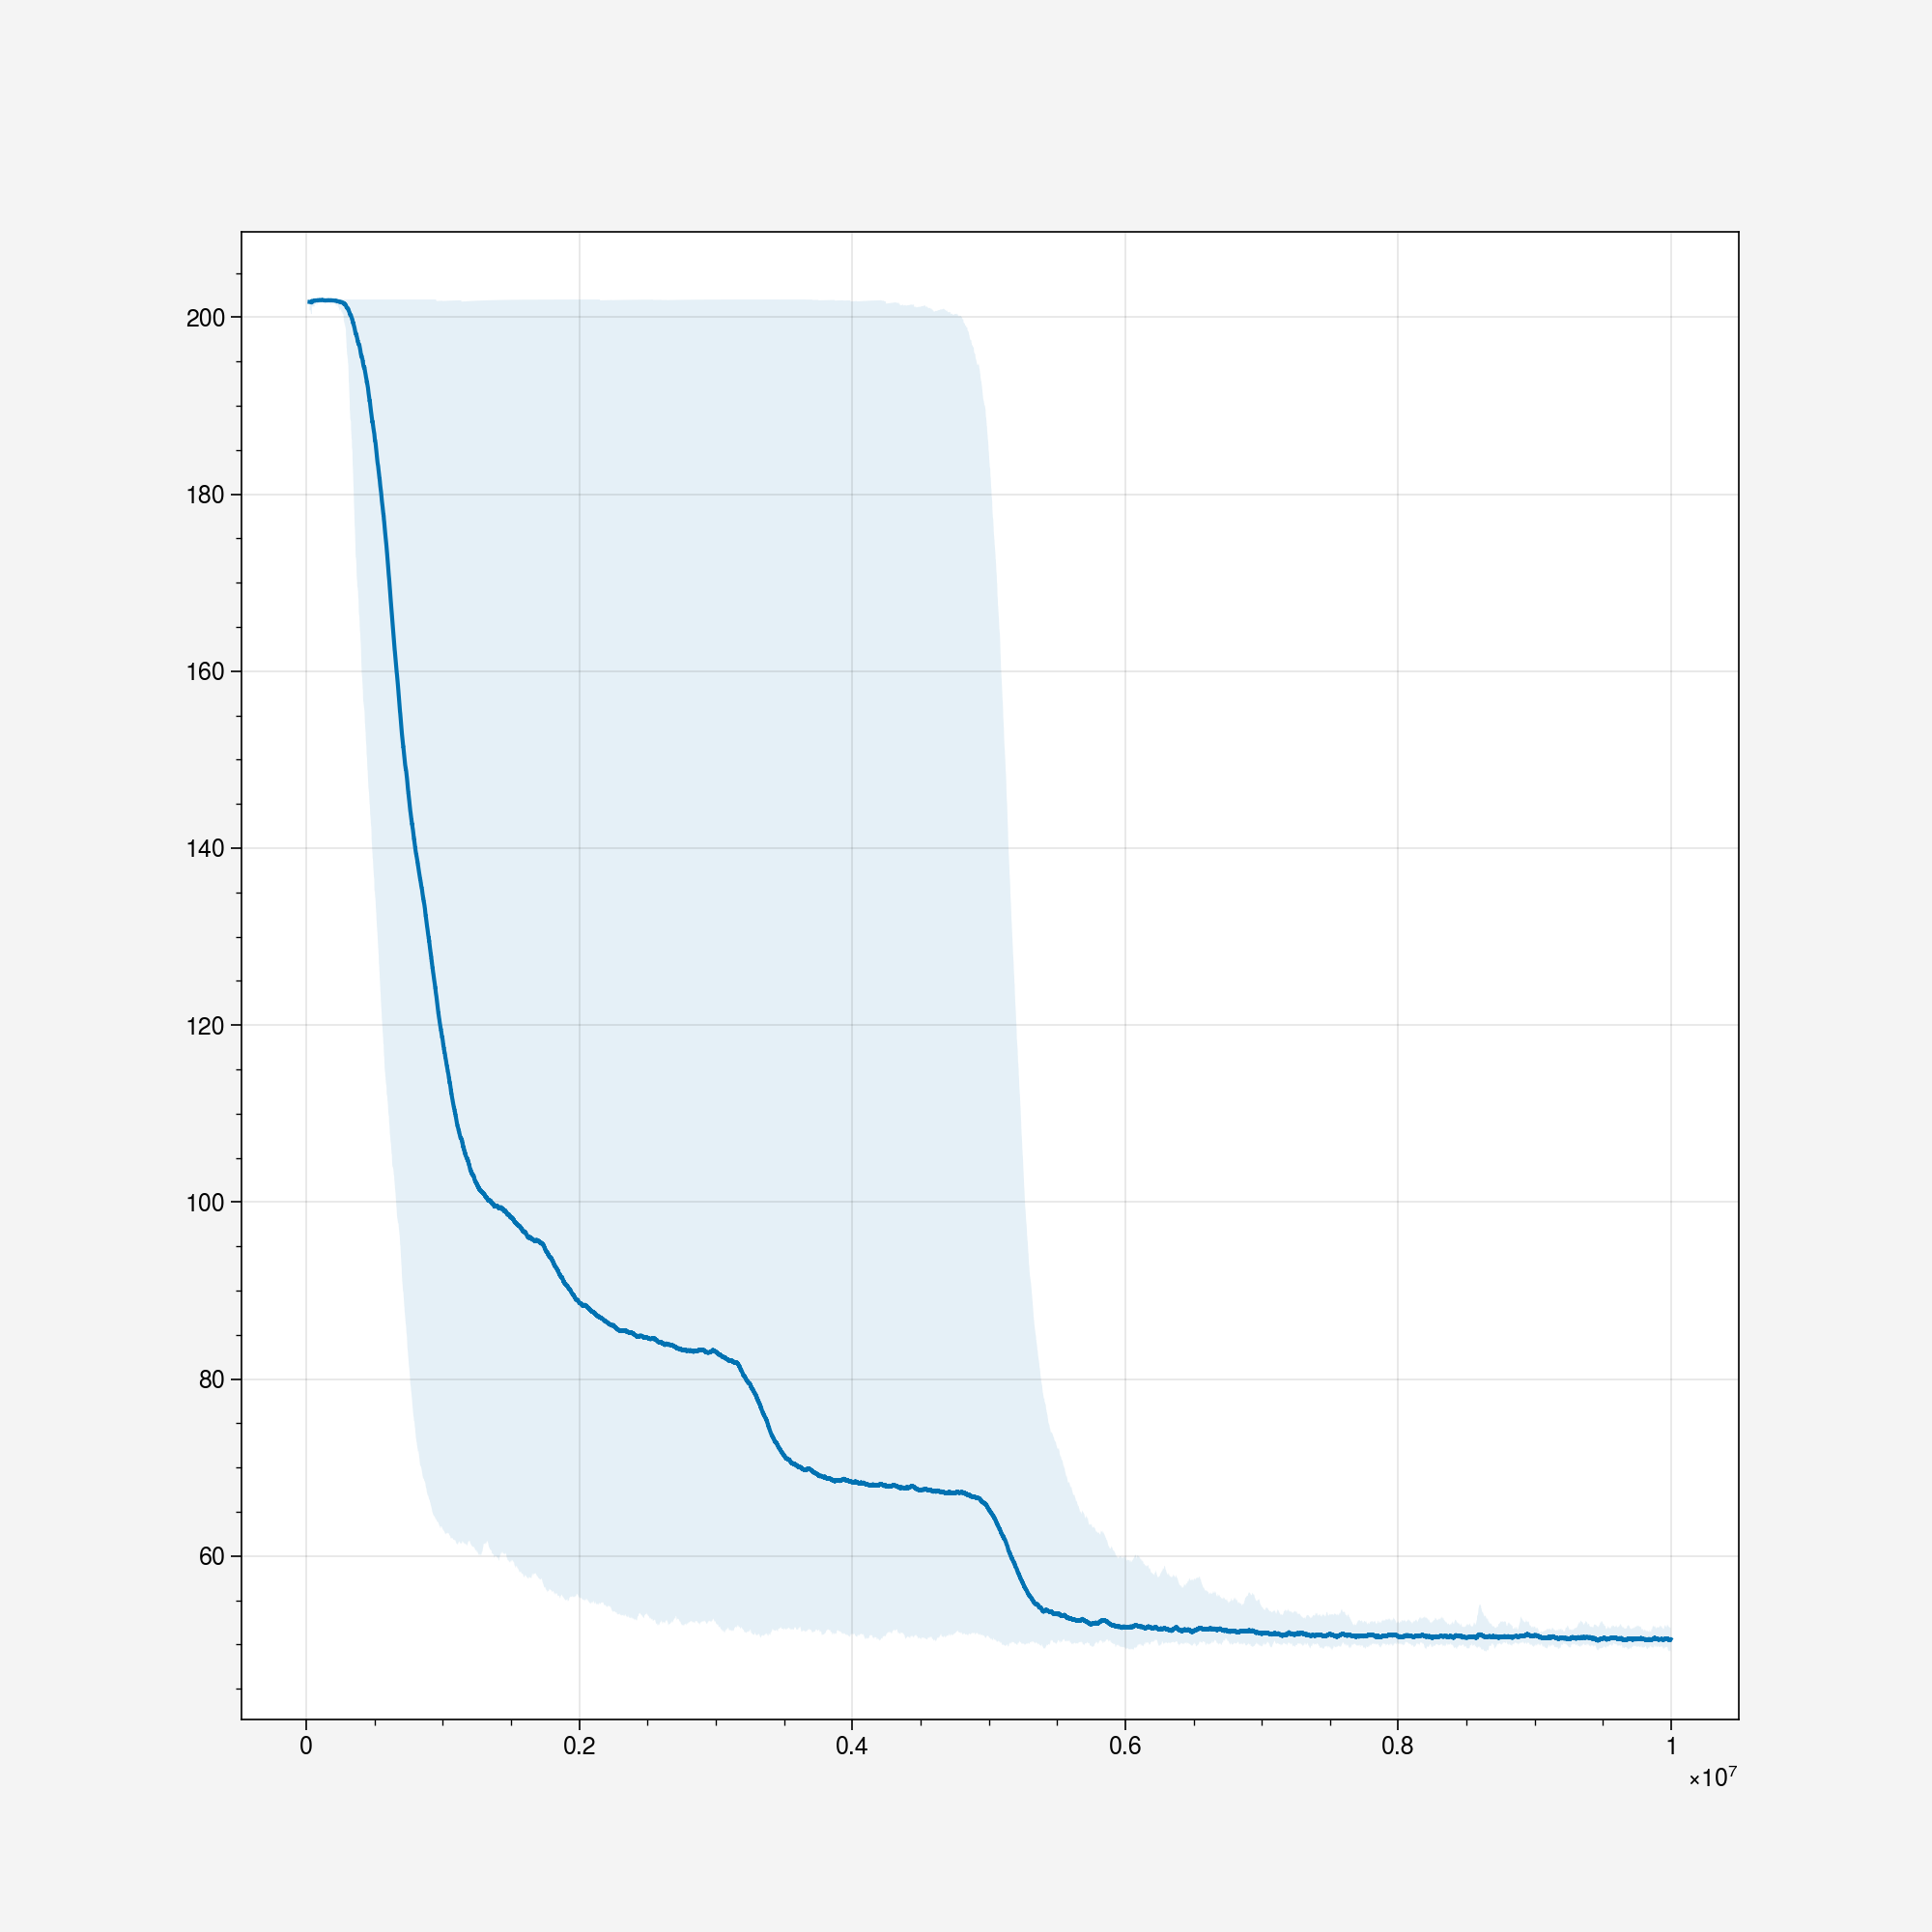

In [24]:
average_runs('shortcut_wc2/shortcut_wc1.5p0.4longer', 'length', ewm=0.001)

In [ ]:
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.8, 1.0]

fig, ax = pplt.subplots(ref)
for p in probs:
    exp_name = f'shortcut_wc2/shortcut_wc1.5p{p}'
    average_runs(exp_name, 'length', ax=ax, cloud_alpha=0, label=f'{p}')

ax.legend(title='p=', loc='b')

## Check step differences

Same seed and setup, just different number of trining time steps - looks fine

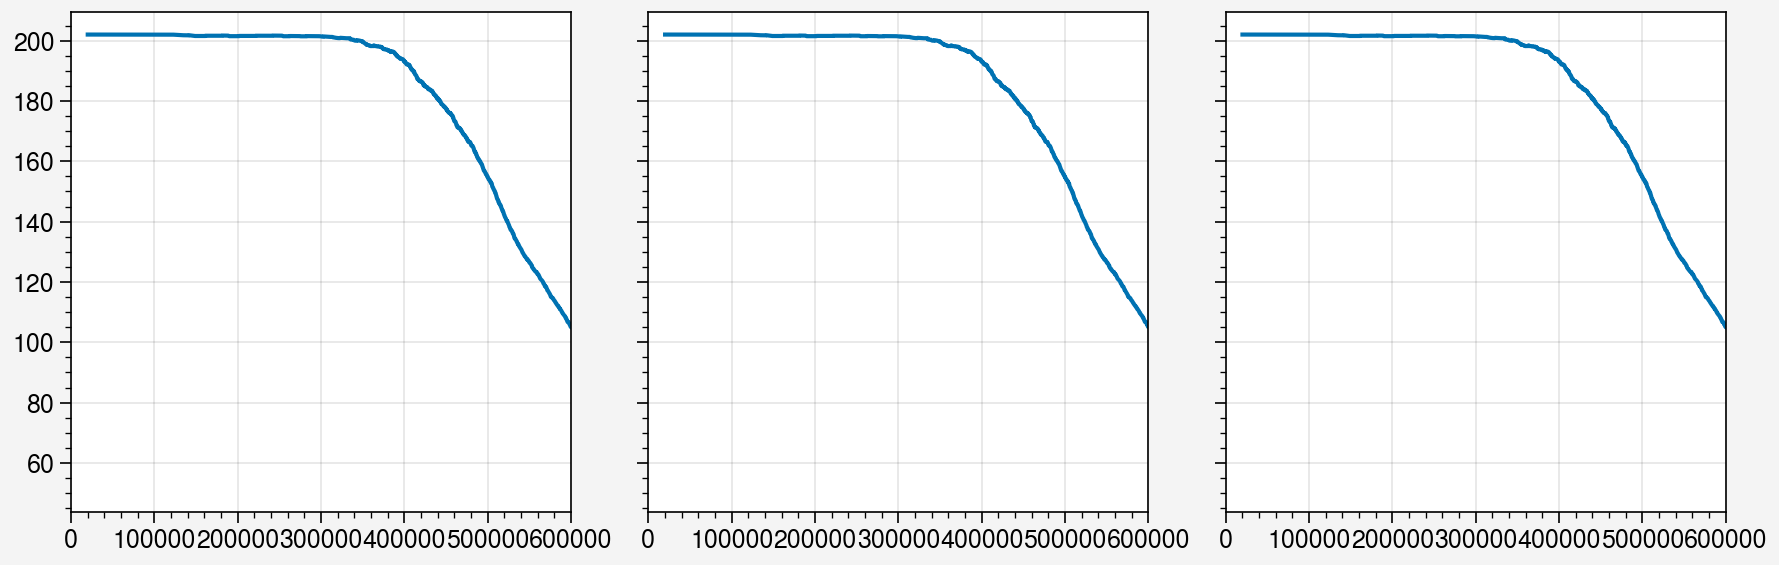

In [23]:
paths = ['../runs/teststep/teststep_step1000000__1700023503',
         '../runs/teststep/teststep_step3000000__1700023999',
         '../runs/teststep/teststep_step5000000__1700025581']

fig, ax = pplt.subplots(ncols=3)
for i, path in enumerate(paths):
    df = load_exp_df(path=path)
    
    df = df[df['metric'] == 'charts/episodic_length']
    x = df['step']
    y = df['value']
    df['ewm'] = df['value'].ewm(alpha=0.001).mean()
    inter = scipy.interpolate.interp1d(df['step'], df['ewm'])
    min_x = np.min(x)
    max_x = np.max(x)
    xs = np.arange(min_x, max_x, 200)
    ys = inter(xs)
    ax[i].plot(xs, ys)
    
ax.format(xlim=[0, 600000])
    

# PlumNav

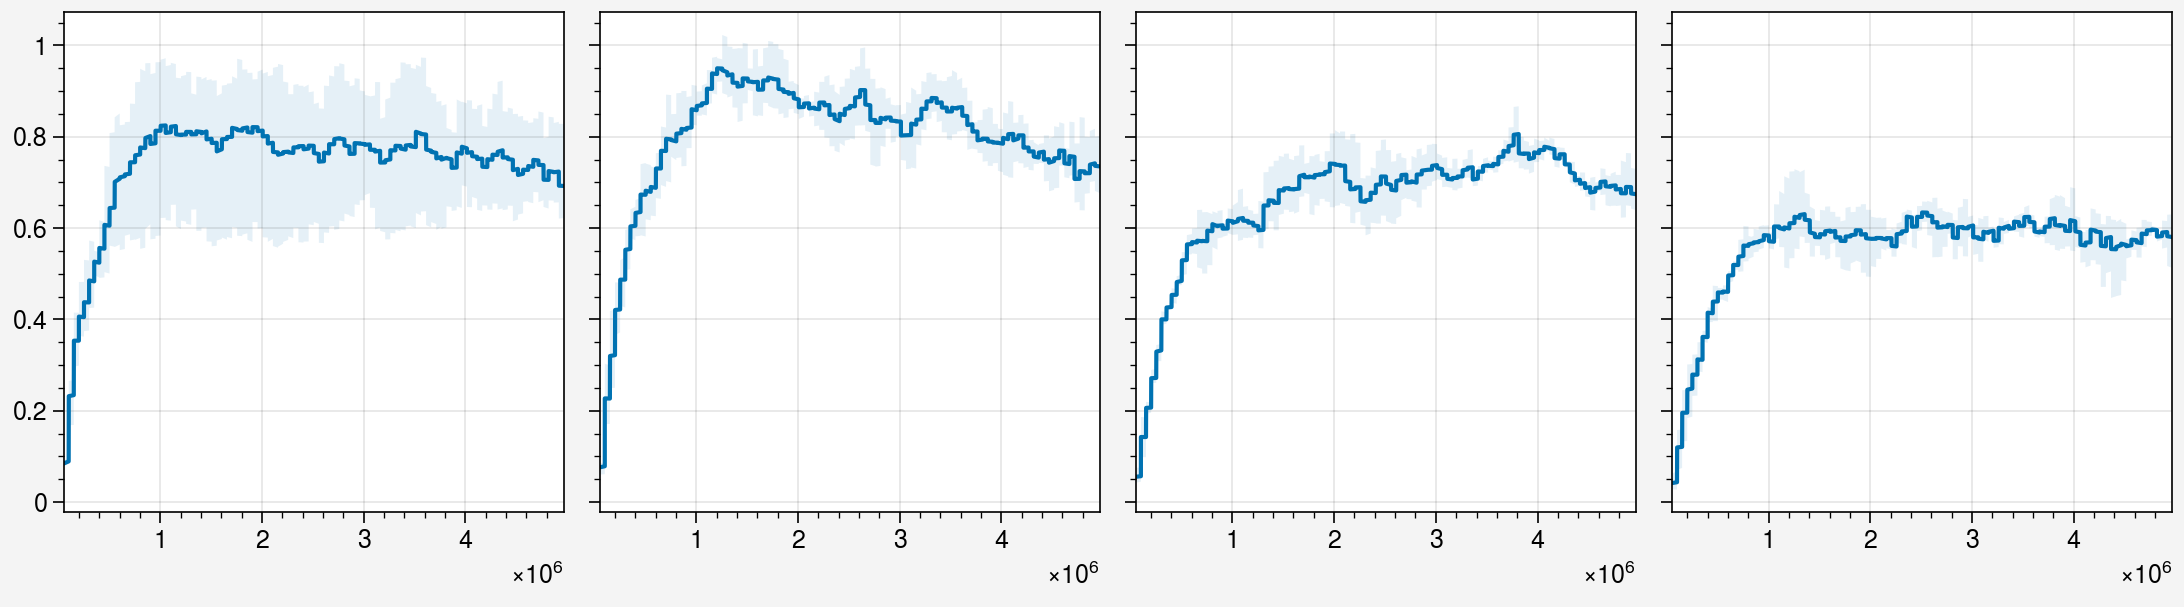

In [26]:
fig, ax = pplt.subplots(ncols=4)

task_structures = [1, 1.5, 2, 2.5]
for i, task in enumerate(task_structures):
    exp_name = f'plum/plum_task{task}'
    average_runs(exp_name, ax=ax[i])

In [4]:
model, obs_rms = torch.load('../saved_models/plum/plum_task2_t0.pt')

In [5]:
res = evaluate(model, obs_rms, env_name='PlumNav-v0', capture_video=True, env_kwargs={'task_structure': 2})

C:\Users\14and\anaconda3\lib\site-packages\gym\wrappers\record_video.py:41: UserWarning: WARN: Overwriting existing videos at C:\Users\14and\Desktop\Work\github\ppo_aux\write_and_test\video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


## Plum2SC

In [7]:
pplt.rc.reset()

In [10]:
exp_name

'plumtosc_actor0_plumtask1p0.1'

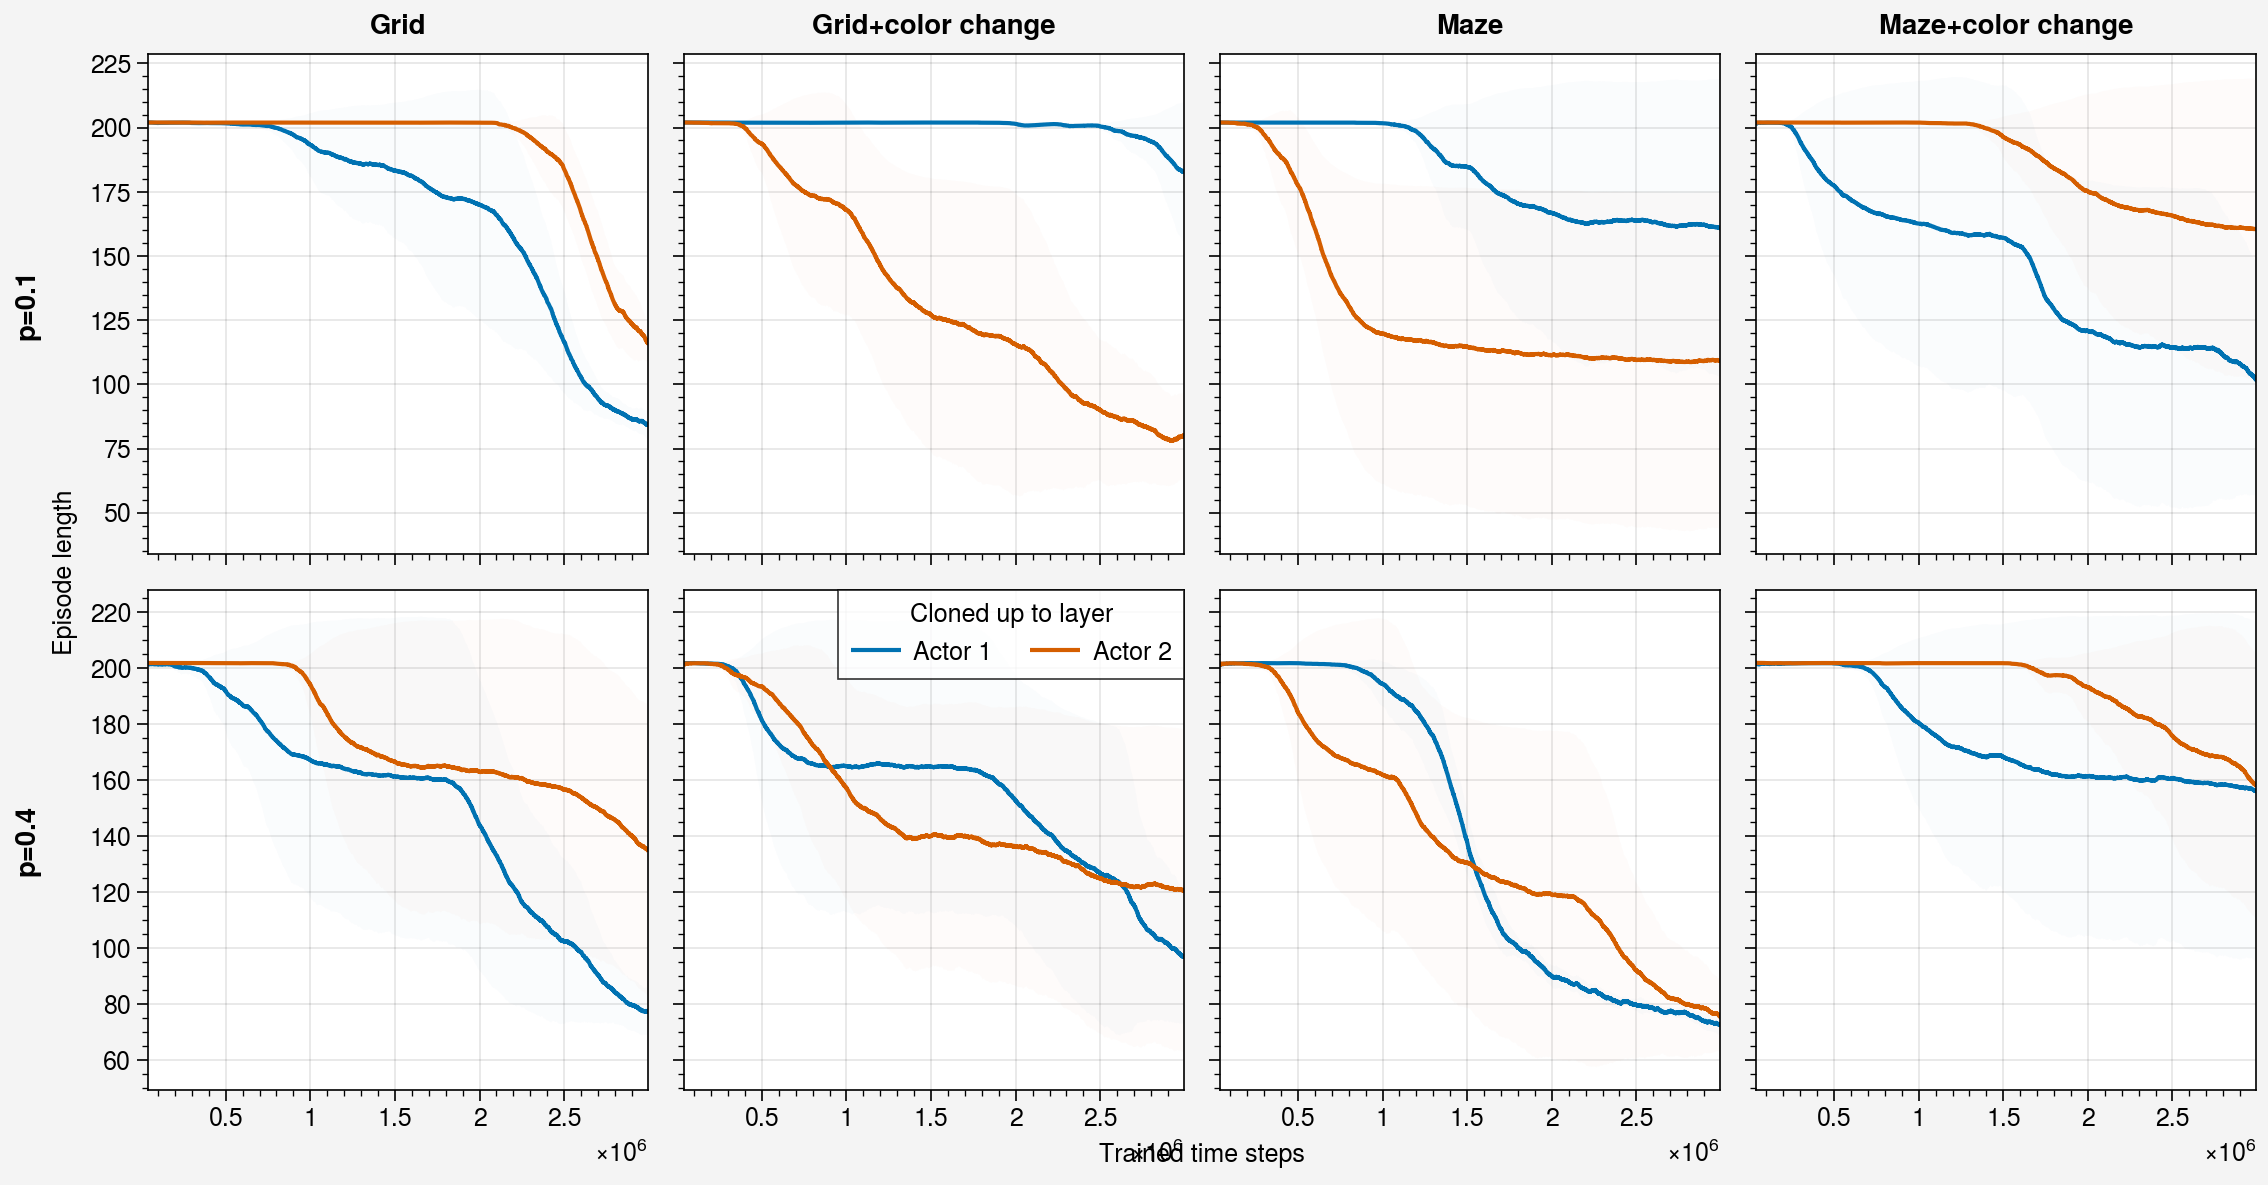

In [11]:
num_trials = 3
probs = [0.1, 0.4] # sc probabilities
tasks = [1, 1.5, 2, 2.5] # original plum envs
task_labels = ['Grid', 'Grid+color change', 'Maze', 'Maze+color change']

# clone_sets = ['shared', 'actor0', 'actor1'] # layers to clone
# clone_labels = ['RNN', 'Actor 1', 'Actor 2']
clone_sets = ['actor0', 'actor1'] # layers to clone
clone_labels = ['Actor 1', 'Actor 2']
fig, ax = pplt.subplots(nrows=2, ncols=4)

for i, p in enumerate(probs):
    for j, task in enumerate(tasks):
        for k, clone in enumerate(clone_sets):
            label = clone_labels[k]
            exp_name = f'plumtosc/plumtosc_{clone}_plumtask{task}p{p}'
            average_runs(exp_name, metric='length', ax=ax[i, j], cloud_alpha=.02, 
                        cloud_by='std', ignore_first=100, ewm=0.001, label=label)

ax.format(xlabel='Trained time steps', ylabel='Episode length',
          toplabels=task_labels, leftlabels=[f'p={p}' for p in probs],)

ax[1, 1].legend(title='Cloned up to layer')